In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"
hspc_prefix = "HSPC"

outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/figure4"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"

use_input = False
min_cell = 10

hue_order_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/results/chip_b1_lineage_markers_ordered.txt"
# hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index



In [2]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join, exists
import colorcet as cc
%matplotlib inline
import numpy as np

sns.set_context("paper", font_scale=2.5)

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))

if hue_order_f != None and  hue_order_f != "":
    hue_order = pd.read_csv(hue_order_f, header=None)[1].values
else:
    hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

se_cells_meta

### Remove None before normalizing
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAGTCTGATTG-1,Flt3l,4239,4239,15047,1940,50,52,636,4173,8196,...,6,5280,4119,AAACGAAGTCTGATTG-1_Flt3l,Flt3l_AAACGAAGTCTGATTG-1,2,0,Flt3l,0_2,HSPC 3
Flt3l_AAACTCGGTAGGTCTT-1,Flt3l,2925,2925,13052,1674,43,26,526,4014,6769,...,3,4538,3532,AAACTCGGTAGGTCTT-1_Flt3l,Flt3l_AAACTCGGTAGGTCTT-1,16,1,Flt3l,1_16,Erythrocyte
Flt3l_AAAGGGCAGACTTCCA-1,Flt3l,3562,3562,14297,2199,46,34,695,3497,7826,...,4,4653,3642,AAAGGGCAGACTTCCA-1_Flt3l,Flt3l_AAAGGGCAGACTTCCA-1,13,0,Flt3l,0_13,Classical Monocyte
Flt3l_AAATGAGGTATCCTTT-1,Flt3l,4915,4915,16671,2497,75,62,760,2906,10371,...,9,6459,4673,AAATGAGGTATCCTTT-1_Flt3l,Flt3l_AAATGAGGTATCCTTT-1,18,0,Flt3l,0_18,Non-classical monocyte
Flt3l_AAATGCCGTGATAAGT-1,Flt3l,3886,3886,15323,2276,44,49,723,3740,8491,...,4,5109,3980,AAATGCCGTGATAAGT-1_Flt3l,Flt3l_AAATGCCGTGATAAGT-1,6,0,Flt3l,0_6,Classical Monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HSPC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HSPC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythrocyte


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def strpplots(df, name, y_col, title):
    n = len(df["donor"].unique())
    fig, axes = plt.subplots(nrows=n, sharex=True, sharey=False, figsize=(16,16))
    curr_labels = df["nuclear_clusters"].unique()
    curr_order = [x for x in hue_order if x in curr_labels]
    for ax, (donor, grp1) in zip(axes.flat, df.groupby("donor")):
        ax.set_title(f"donor {donor}")
        sns.stripplot(x="nuclear_clusters", y=y_col, data=grp1, size=4, color=".7", 
                      order=curr_order, ax=ax) 
        plt.draw()
        if y_col=="log2":
            ax.yaxis.set_ticklabels([str(2**float(l.get_text())) for l in ax.get_yticklabels()])
        

    for ax, (donor, grp1) in zip(axes.flat, df.groupby("donor")):
        # plot the mean line
        sns.boxplot(medianprops={'visible': True},
                    showmeans=False,
                    meanline=False,
                    #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
                    whiskerprops={'visible': False},
                    zorder=10,
                    x="nuclear_clusters",
                    y=y_col,
                    data=grp1,
                    showfliers=False,
                    showbox=False,
                    showcaps=False,
                    order=curr_order,
                    ax=ax)
        plt.xticks(rotation=90)
        ax.set_ylabel(y_col)
    fig.suptitle(title)
    plt.savefig(join(outdir, name + ".svg"))
    plt.savefig(join(outdir, name + ".pdf"))
    return 


def boxen(df, name, y_col, title):
    g = sns.catplot(x="nuclear_clusters", y=y_col, data=df, sharey=False,
                row="donor", kind="boxen", height=16, hue="nuclear_clusters",
                palette=palette, order=hue_order)
    plt.xticks(rotation=90)
    g.fig.suptitle(title)
    plt.savefig(join(outdir, name+".pdf" ))


def donor_clone_barplots(df, name, col_drop="ncells", title=None):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(16,16), nrows=len(donors), squeeze=True)
    count = 0
    for d, val in df.groupby("donor"):
        curr_donor_clones = val.drop([col_drop, "donor"],axis=1)
        curr_donor_clones = curr_donor_clones.loc[: ,curr_donor_clones.columns.isin(hue_order)]
        curr_donor_clones.plot.bar(stacked=True, ax=ax[count], color=color_d)
        ax[count].set_title(f"Donor {d}")
        count += 1
        curr_donor_clones.to_csv(name + f".donor{d}.csv")
        
    if len(df["donor"].unique()) >1:
        ax[0].get_legend().remove()
    plt.legend(bbox_to_anchor=(1.05,1))
    if title is not None:
        f.suptitle(title)
    plt.tight_layout()
    plt.savefig(join(outdir, name+".barplot.png"))
    plt.savefig(join(outdir, name+".barplot.pdf"), dpi=300)
    return


def get_clone_count(x, df):
    curr = df[df["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]


def get_clone_count_norm(x, clone_norm):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

def to_norm(cl_counts):
    clone_sums = cl_counts.groupby("name").sum()["ncells"]
    clone_norm = cl_counts.copy()
    clone_norm["freq"] = clone_norm.apply(lambda x: 100*x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)
   # print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["freq"])
    #clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
    clone_norm = clone_norm[~(clone_norm["name"]=="None")]
    clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["freq"].reset_index().sort_values("freq", ascending=False).set_index("name")
    clone_norm_w = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count_norm, args=(clone_norm,),
                                                                             axis=1)),axis=1).fillna(0)
    return clone_norm, clone_norm_w

    
def run_plots(cl_counts_l, y_col, name, title):
    strpplots(cl_counts_l,name=name+".strp", y_col=y_col, title=title)
    boxen(cl_counts_l, name=name+".boxen", y_col=y_col, title=title)    
    return


# def get_cl_counts_w(cl_counts_l):
#     cl_counts_l_combined = cl_counts_l.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
#     cl_counts_w = pd.concat((cl_counts_l_combined, cl_counts_l_combined.apply(get_clone_count, args=(cl_counts_l,),axis=1)),axis=1).fillna(0)  
    
def init_cl_counts_l(se_cells_meta):
    cl_counts_l = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
    cl_counts_l = cl_counts_l[~(cl_counts_l["name"]=="None")]
    cl_counts_l_combined = cl_counts_l.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
    cl_counts_w = pd.concat((cl_counts_l_combined, cl_counts_l_combined.apply(get_clone_count, args=(cl_counts_l,),axis=1)),axis=1).fillna(0)
    cl_counts_l["log2"] = np.log2(1+cl_counts_l["ncells"]).fillna(0)
    cl_counts_w_log2 = pd.merge(cl_counts_w[["ncells", "donor"]], np.log2(1+cl_counts_w.drop(["ncells", "donor"], axis=1)),
                               left_index=True, right_index=True)
    return cl_counts_l, cl_counts_w , cl_counts_w_log2


def plot_all_and_norm(val, prefix, clones_to_keep=None, min_cell=None, use_log=True):
    cl_counts_l, cl_counts_w, cl_counts_w_log2 = init_cl_counts_l(val)
    if clones_to_keep is None and min_cell is not None:
        if min_cell is None:
            clones_to_keep = cl_counts_w.index
        else:
            # remove clones < min_cell
            cl_counts_w = cl_counts_w.loc[cl_counts_w["ncells"]>=min_cell]
            clones_to_keep = cl_counts_w.index
    else:
        cl_counts_w = cl_counts_w.loc[cl_counts_w.index.isin(clones_to_keep)]
        
    cl_counts_l = cl_counts_l.loc[cl_counts_l["name"].isin(clones_to_keep)]
    
    # 1. create plots on initial data: 
    # 1a. create strpplot;boxen with log2. barplot-raw&log2
    if use_log:
        y_col="log2"
    else:
        y_col = "ncells"
    run_plots(cl_counts_l, y_col="log2", name= f"{prefix}_log2_clone_cluster_diffY", title=f"{prefix} all data")
    donor_clone_barplots(cl_counts_w,
          name=f"{prefix}_clone_cluster", title=f"{prefix} all data")
    donor_clone_barplots(cl_counts_w_log2,
          name=f"{prefix}_log2_clone_cluster", title=f"{prefix} all data log2")

    # 1b. create plots with noHSPC
    noHSPC_l = cl_counts_l.loc[~(cl_counts_l["nuclear_clusters"].str.contains(hspc_prefix))]
    noHSPC_w = cl_counts_w.loc[:, ~(cl_counts_w.columns.str.contains(hspc_prefix))]

    run_plots(noHSPC_l, y_col="ncells", name= f"{prefix}_noHSPC_clone_cluster_diffY", title=f"{prefix} noHSPC")
    donor_clone_barplots(noHSPC_w, name=f"{prefix}_noHSPC_clone_cluster_bar", title=f"{prefix} noHSPC")    
    
    # 2. normalize values within each clone
    # 2a. all clusters
    cl_norm_l, cl_norm_w = to_norm(cl_counts_l)
    run_plots(cl_norm_l, y_col="freq", name=f"{prefix}_norm_clone_cluster_diffY", title=f"{prefix} clone frequency")
    donor_clone_barplots(cl_norm_w, name=f"{prefix}_norm_clone_cluster_bar", col_drop="freq", 
                         title=f"{prefix} clone frequency")
    
    # 2b. noHSPC for norm
    ## Need to renormalize with current groups
    noHSPC_norm_l = cl_norm_l.loc[~(cl_norm_l["nuclear_clusters"].str.contains(hspc_prefix))]
    noHSPC_norm_w = cl_norm_w.loc[:, ~(cl_norm_w.columns.str.contains(hspc_prefix))]
    run_plots(noHSPC_norm_l, y_col="freq", name=f"{prefix}_noHSPC_norm_clone_cluster_scatter_diffY",
             title=f"{prefix} noHSPC frequency")
    donor_clone_barplots(noHSPC_norm_w, col_drop="freq", title=f"{prefix} noHSPC frequency", 
                         name=f"{prefix}_noHSPC_norm_clone_cluster_bar")
    return clones_to_keep


def main(se_cells_meta, min_cell):
    clones_to_keep = plot_all_and_norm(se_cells_meta, prefix="allCond", clones_to_keep=None, min_cell=min_cell)
    # Check if more than one condition, if yes, split and run 
    if len(se_cells_meta["condition"].unique())>1:
        for cond, val in se_cells_meta.groupby("condition"):
            plot_all_and_norm(val, prefix=f"condition.{cond}", clones_to_keep=clones_to_keep, 
                              min_cell=None)
    return




curr_order ['HSPC 1', 'HSPC 2', 'HSPC 3', 'HSPC 4', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']
curr_order ['HSPC 1', 'HSPC 2', 'HSPC 3', 'HSPC 4', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']
curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']
curr_order ['HSPC 2', 'HSPC 3', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'Erythrocyte']


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'Erythrocyte']


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


curr_order ['HSPC 2', 'HSPC 3', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'Erythrocyte']
curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'Erythrocyte']
curr_order ['HSPC 1', 'HSPC 2', 'HSPC 3', 'HSPC 4', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']
curr_order ['HSPC 1', 'HSPC 2', 'HSPC 3', 'HSPC 4', 'Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']
curr_order ['Classical Monocyte', 'Non-classical monocyte', 'Neutrophil', 'Granulocyte', 'pDC', 'pre-B cells', 'Erythrocyte', 'MkP']


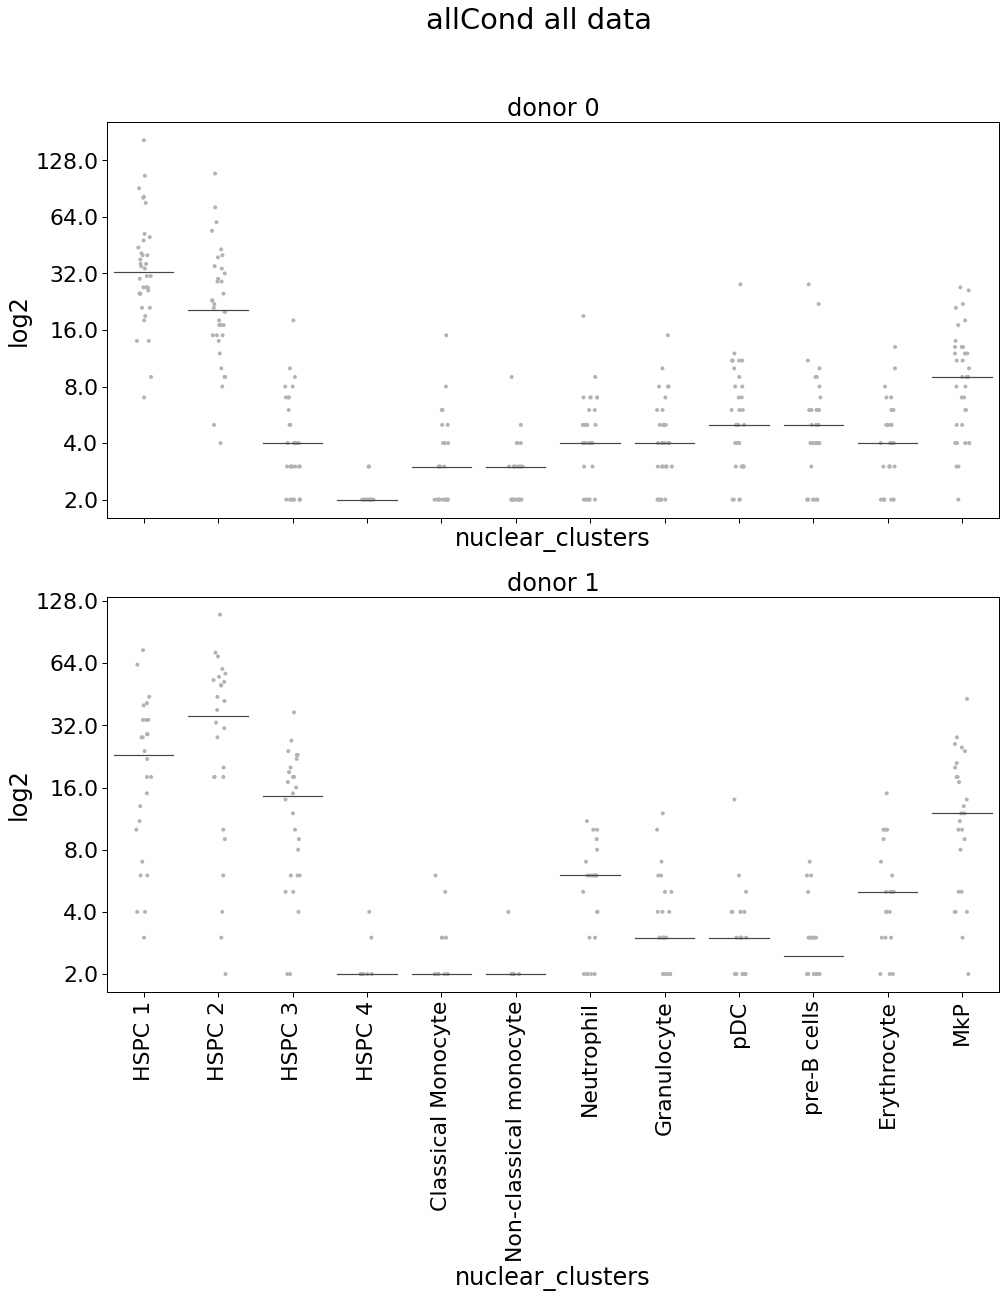

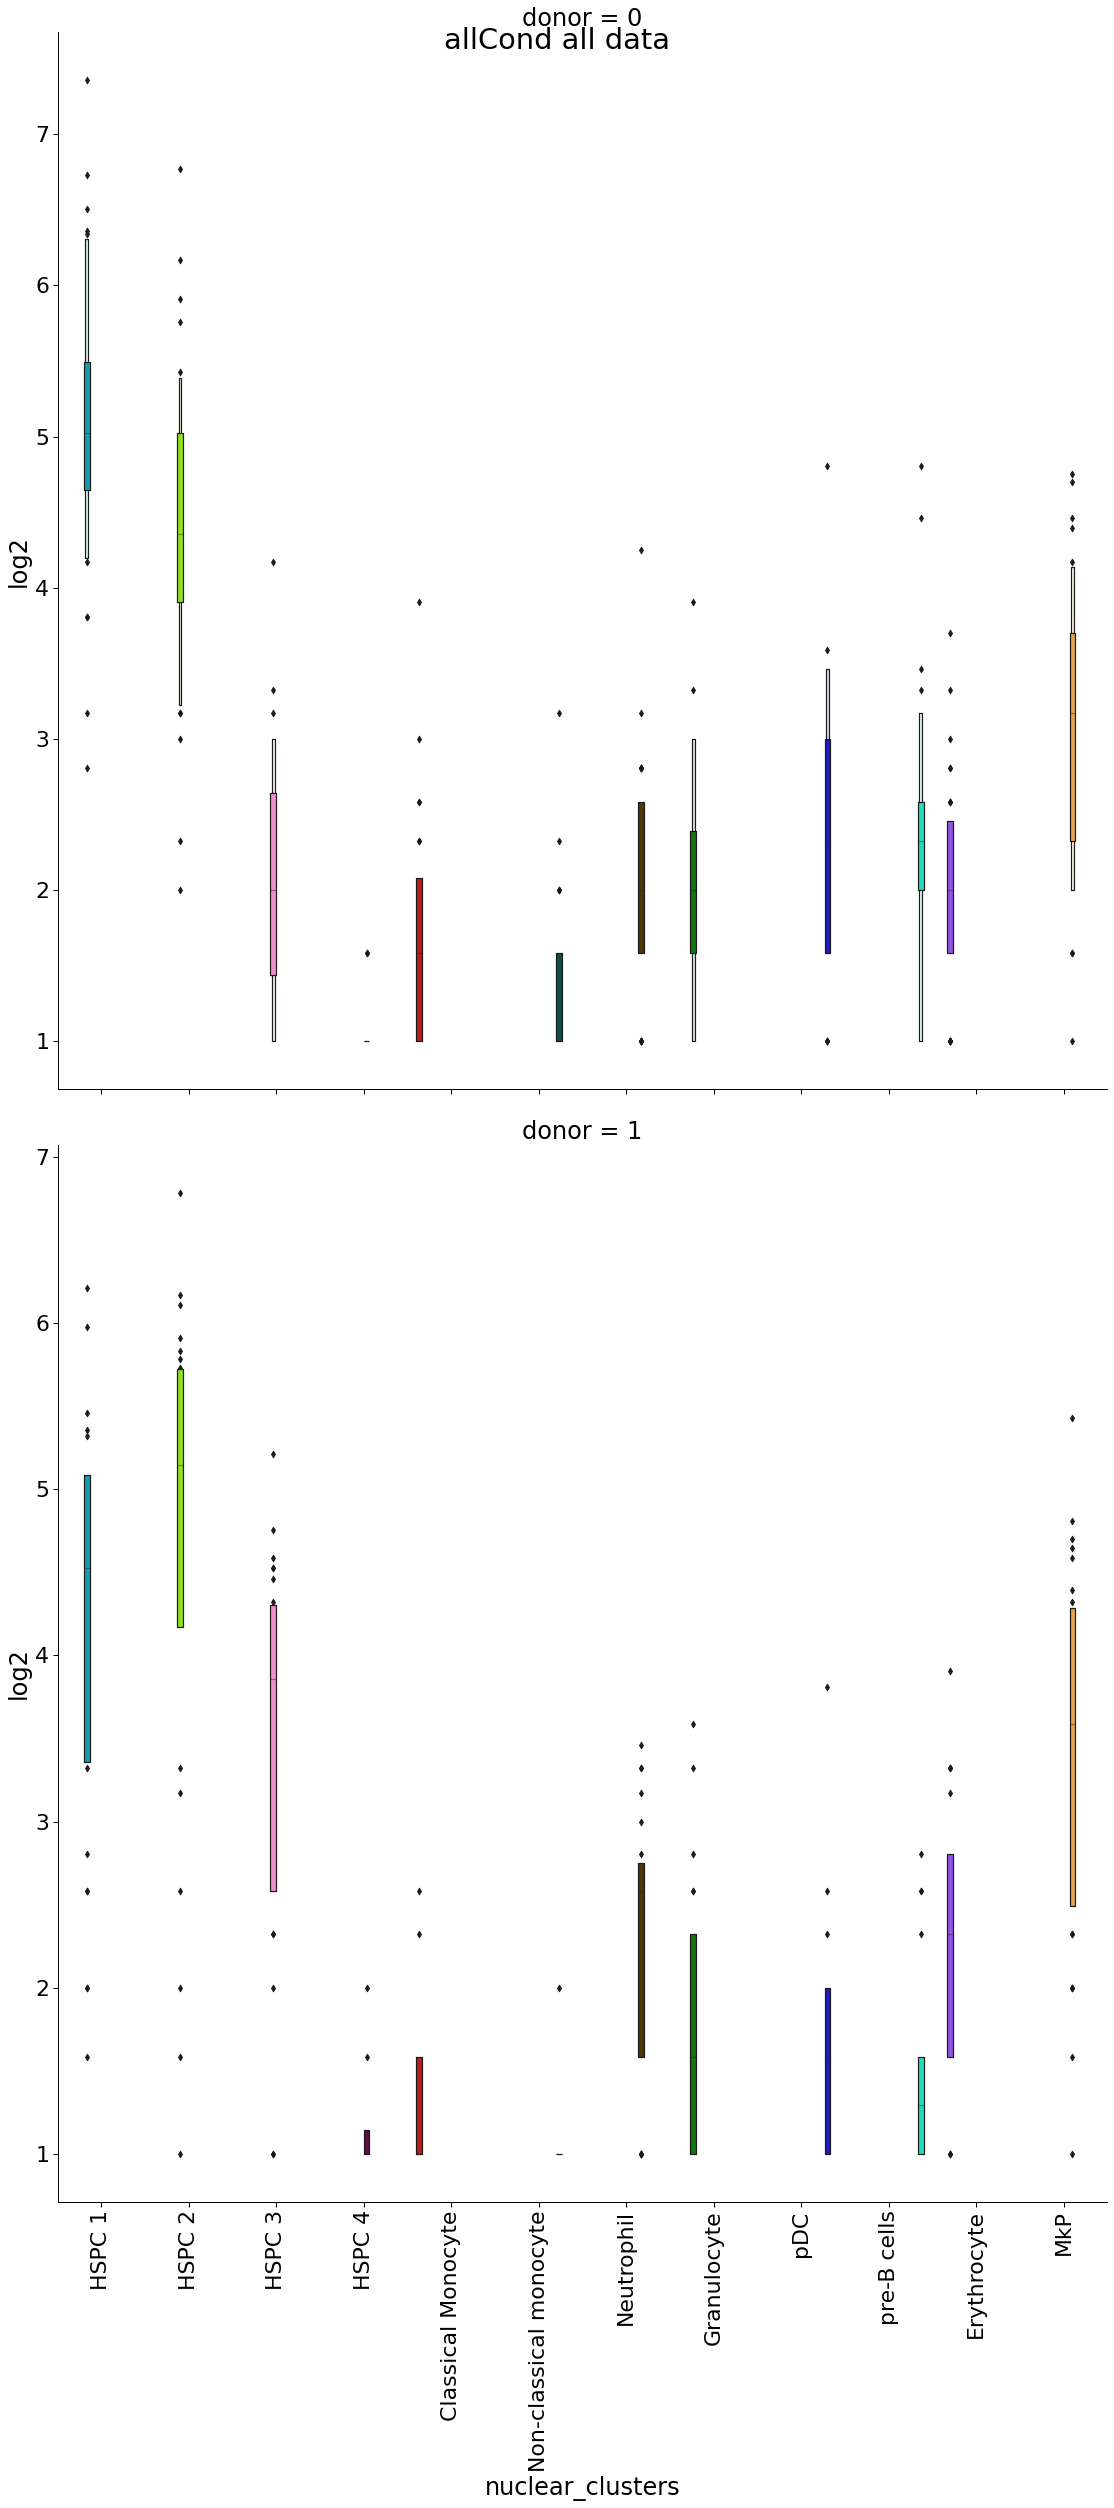

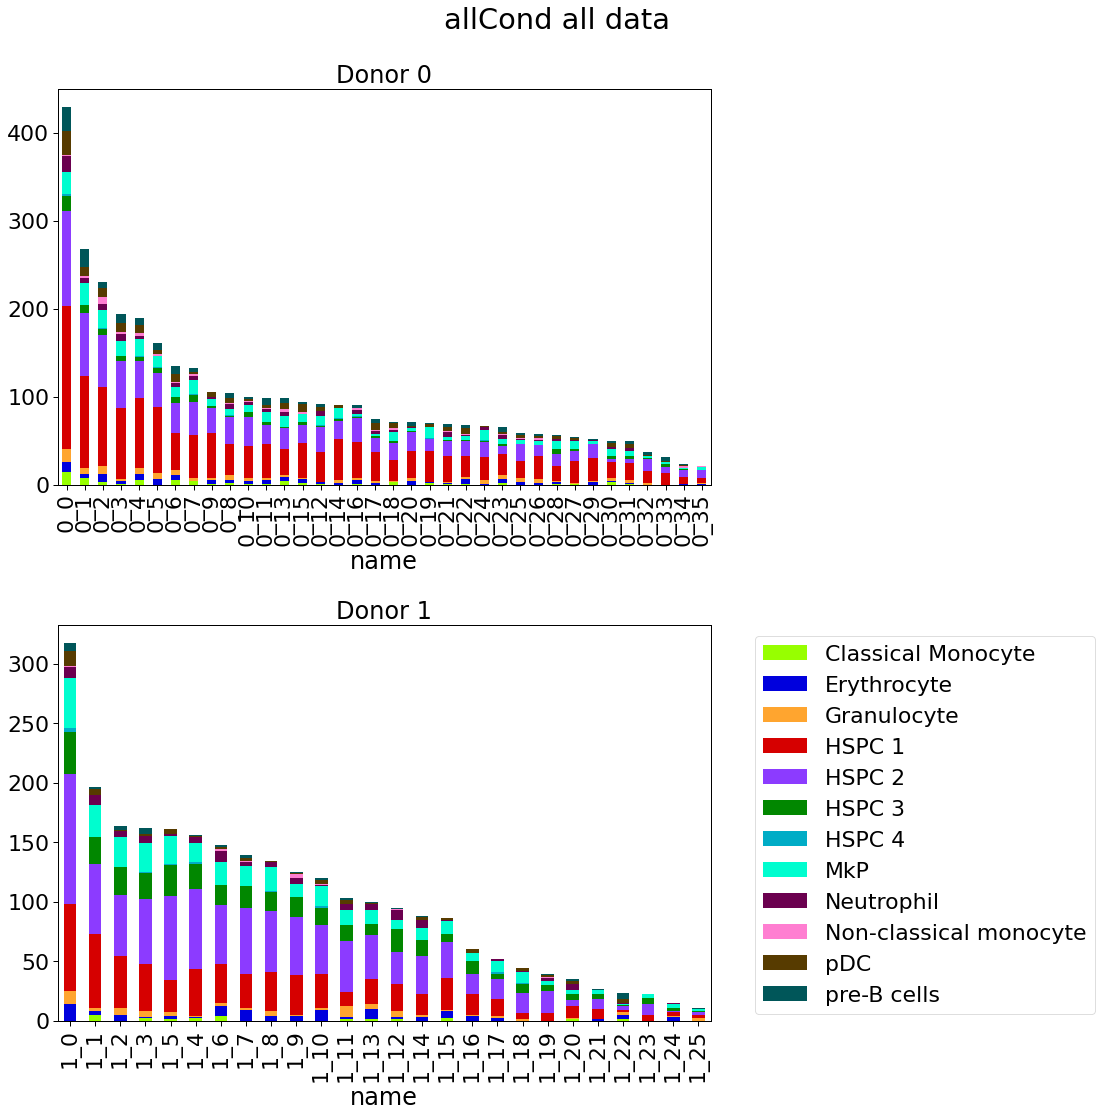

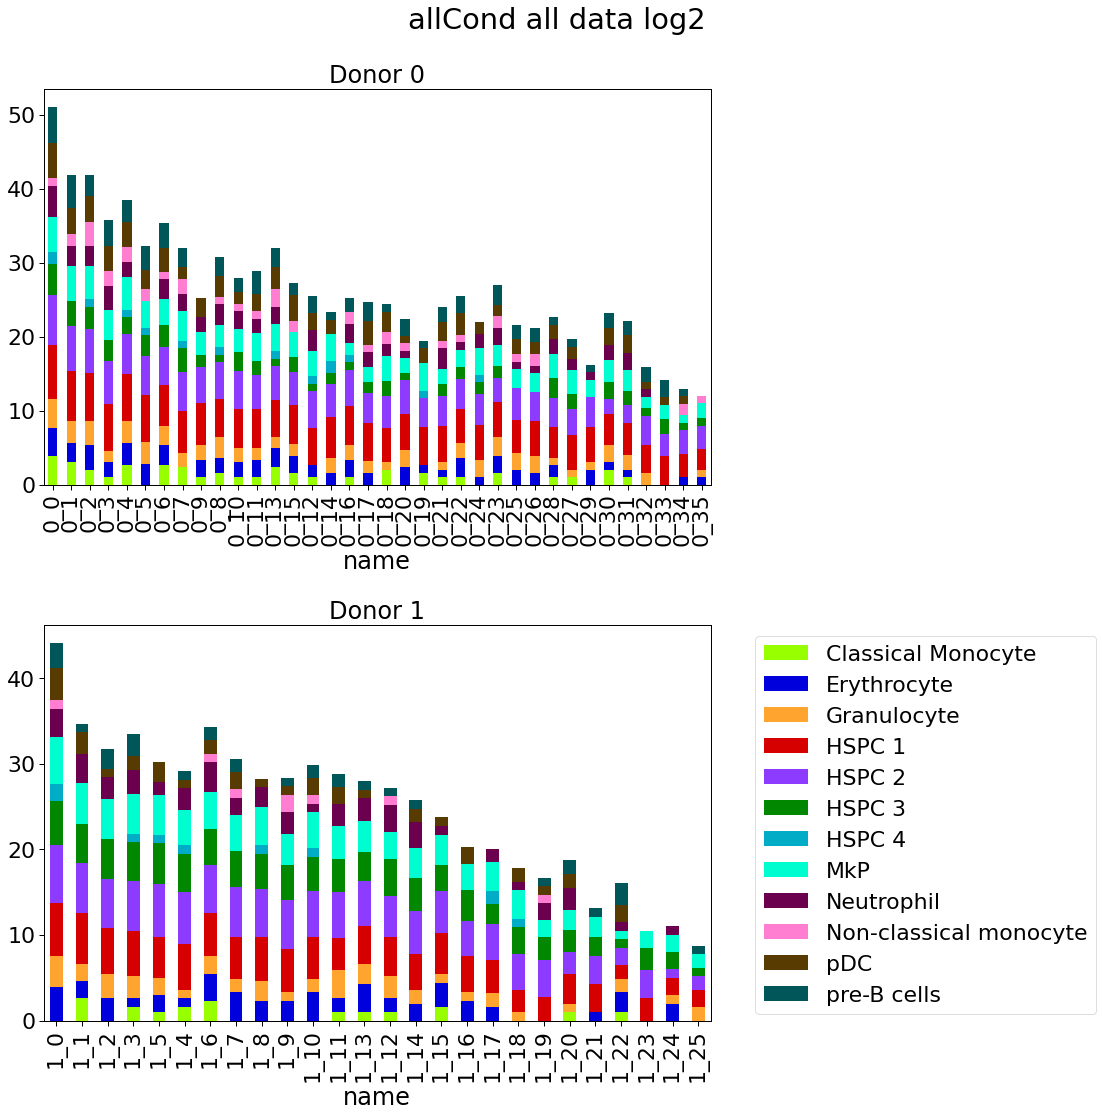

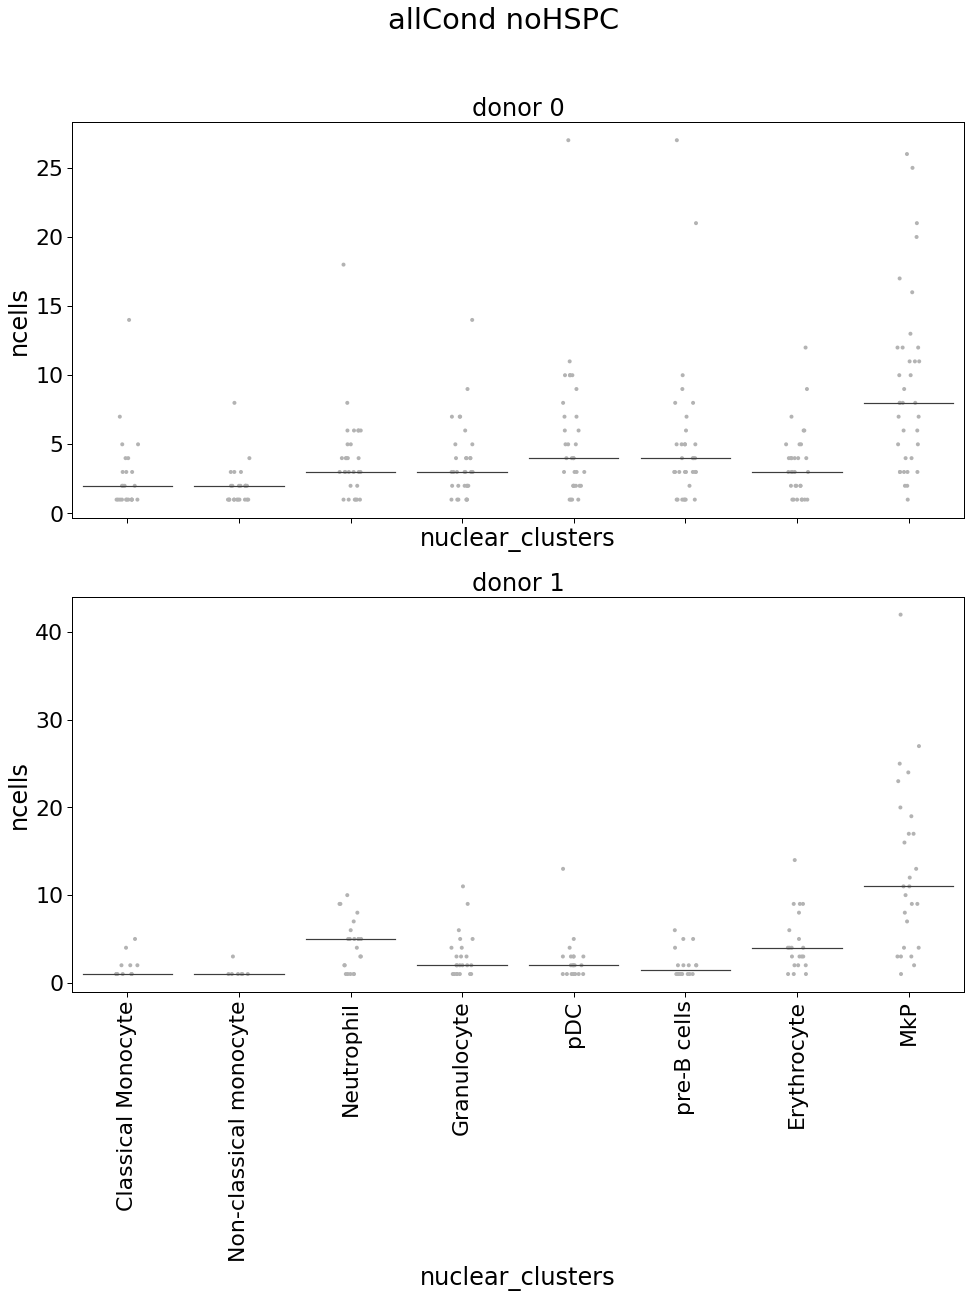

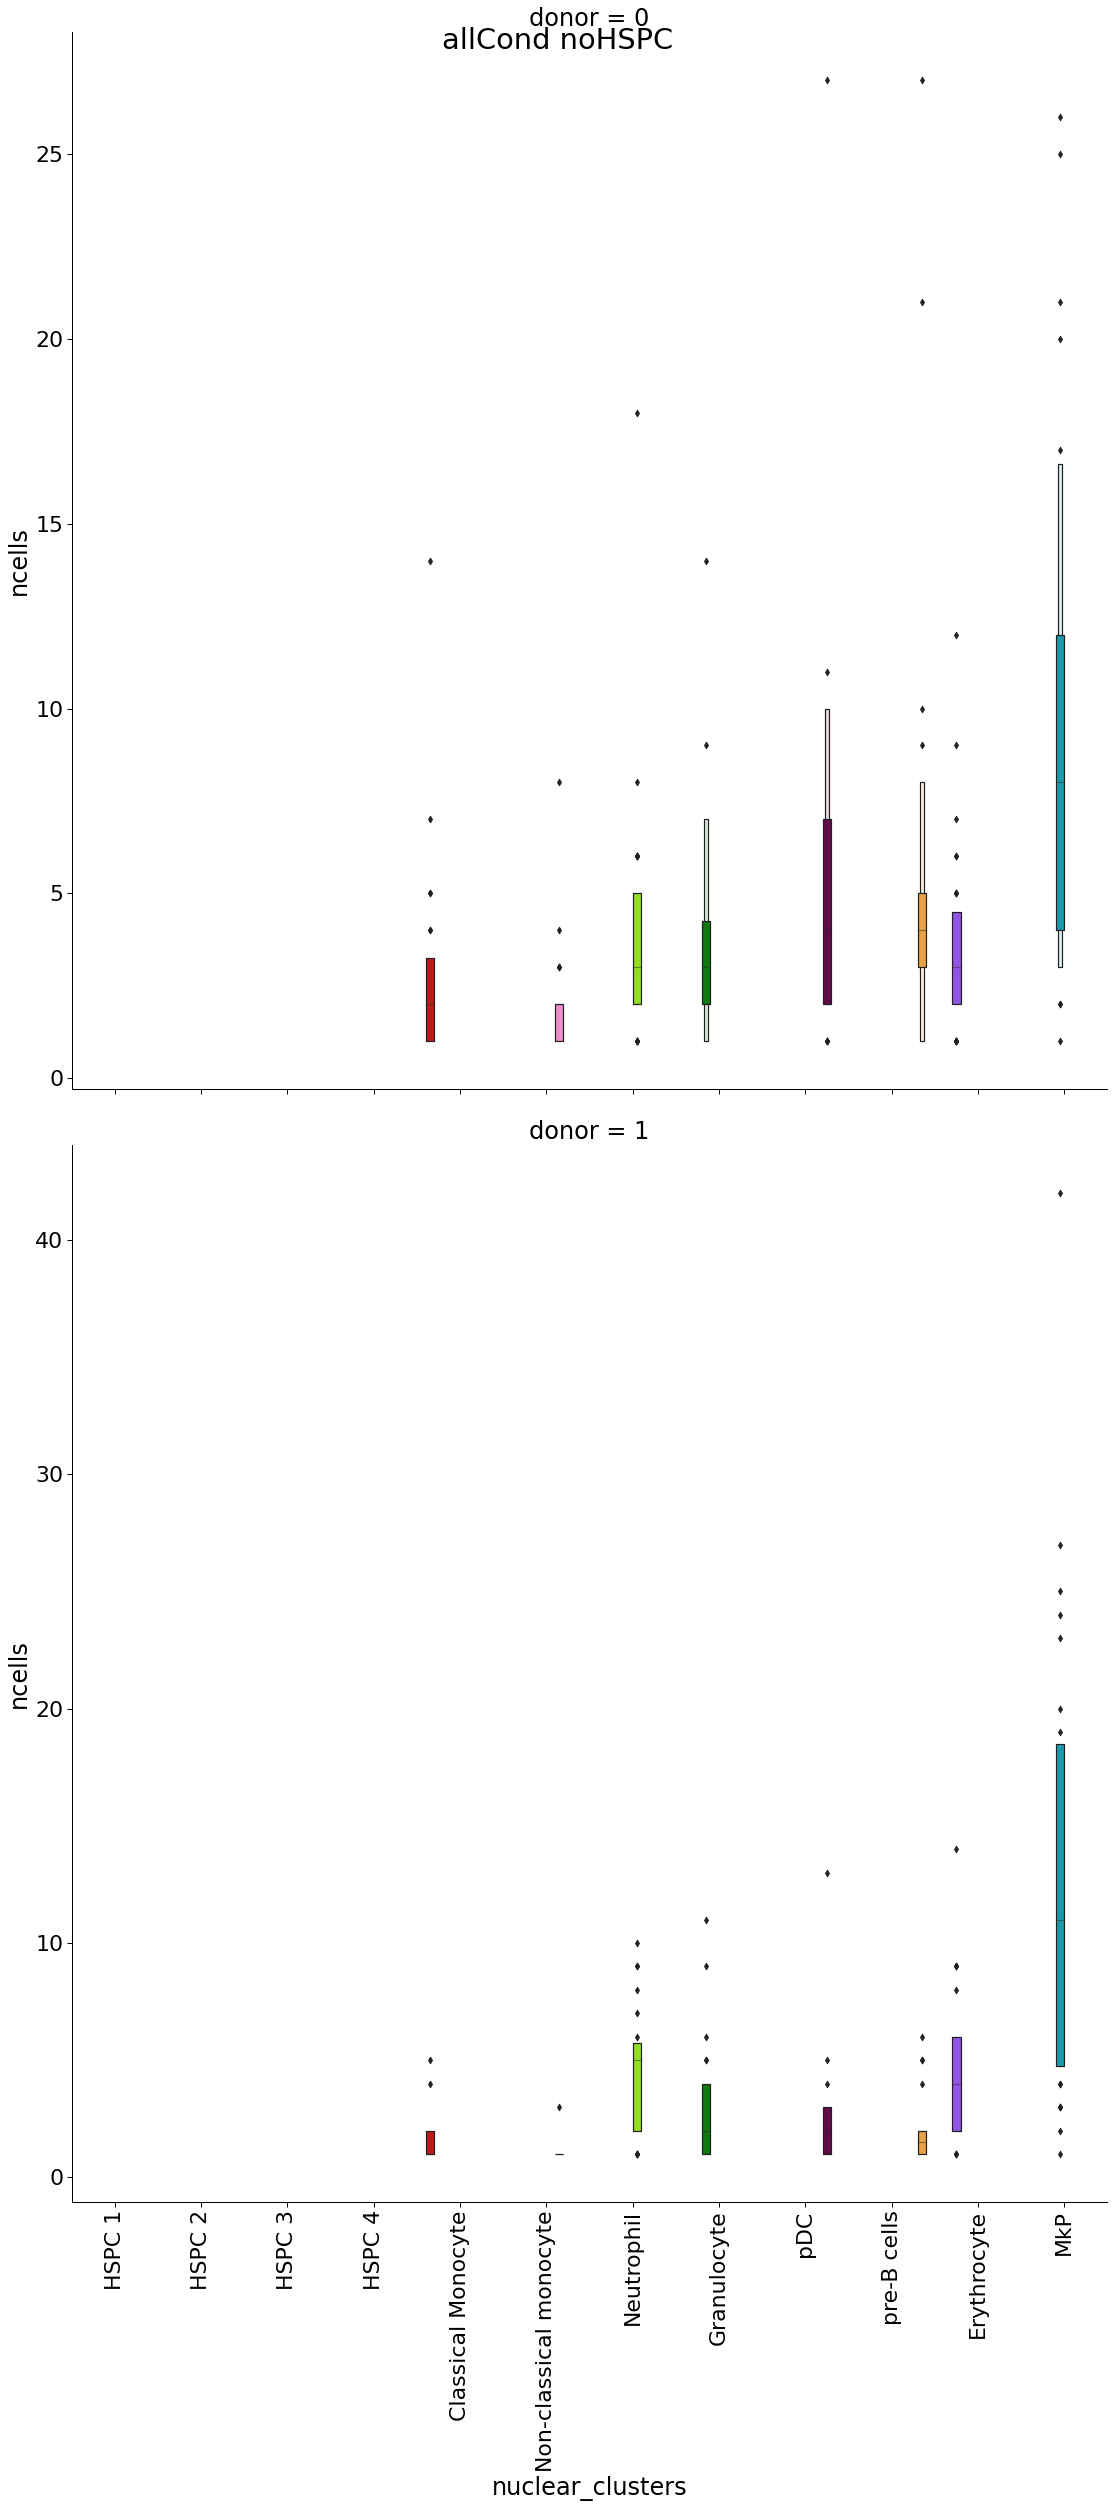

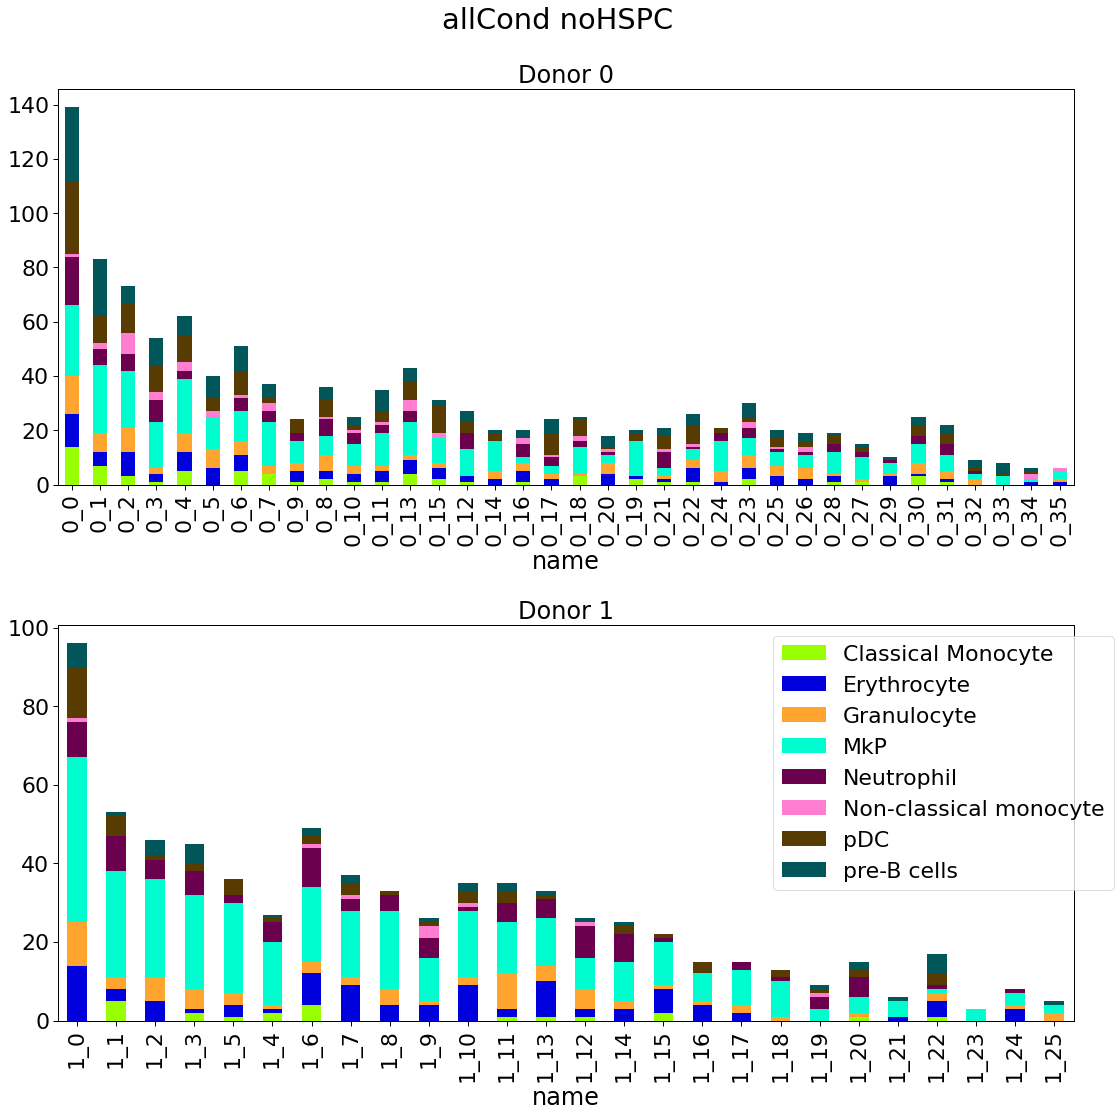

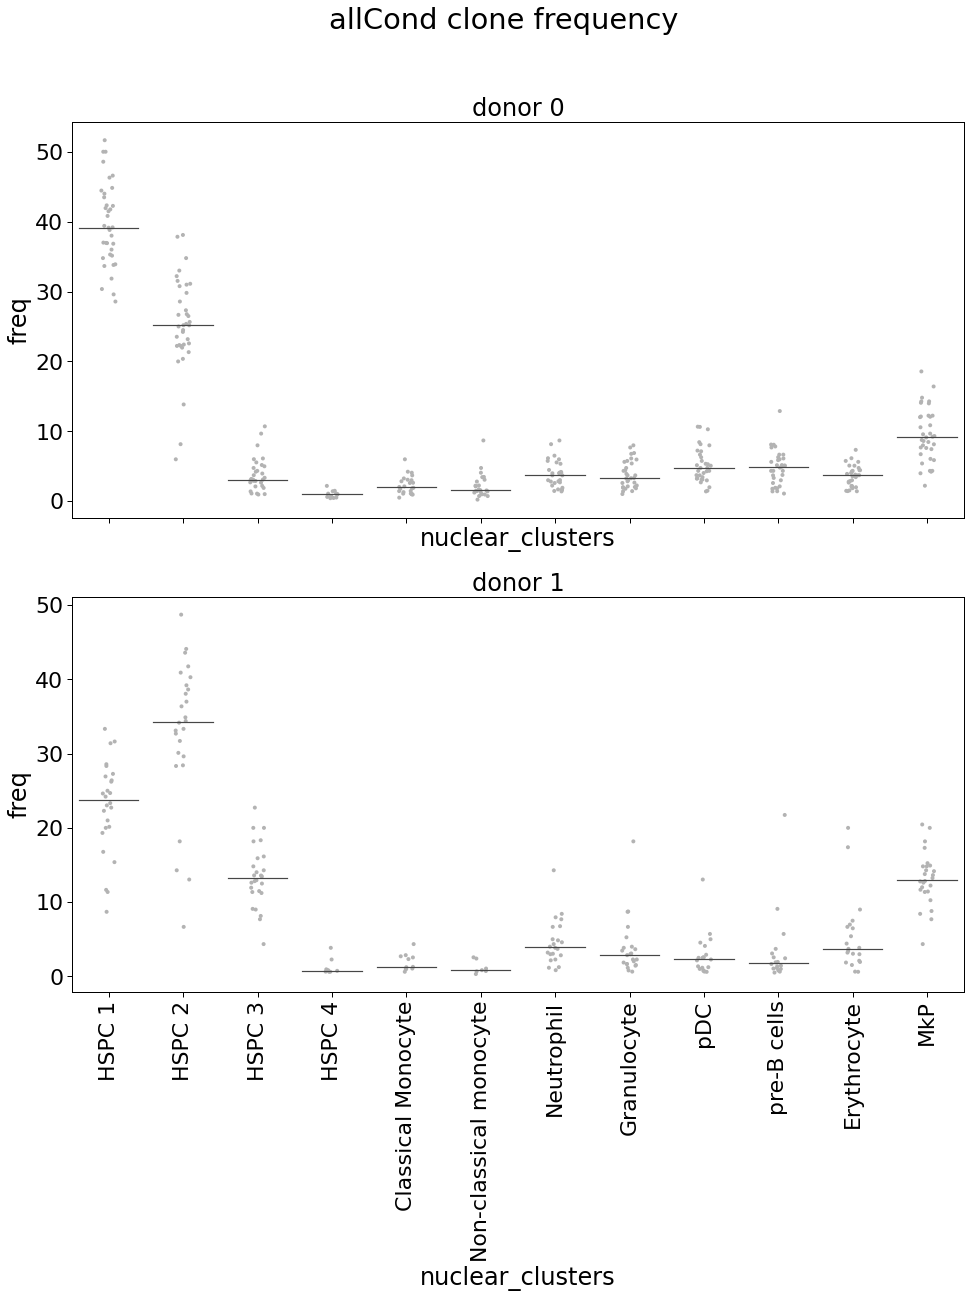

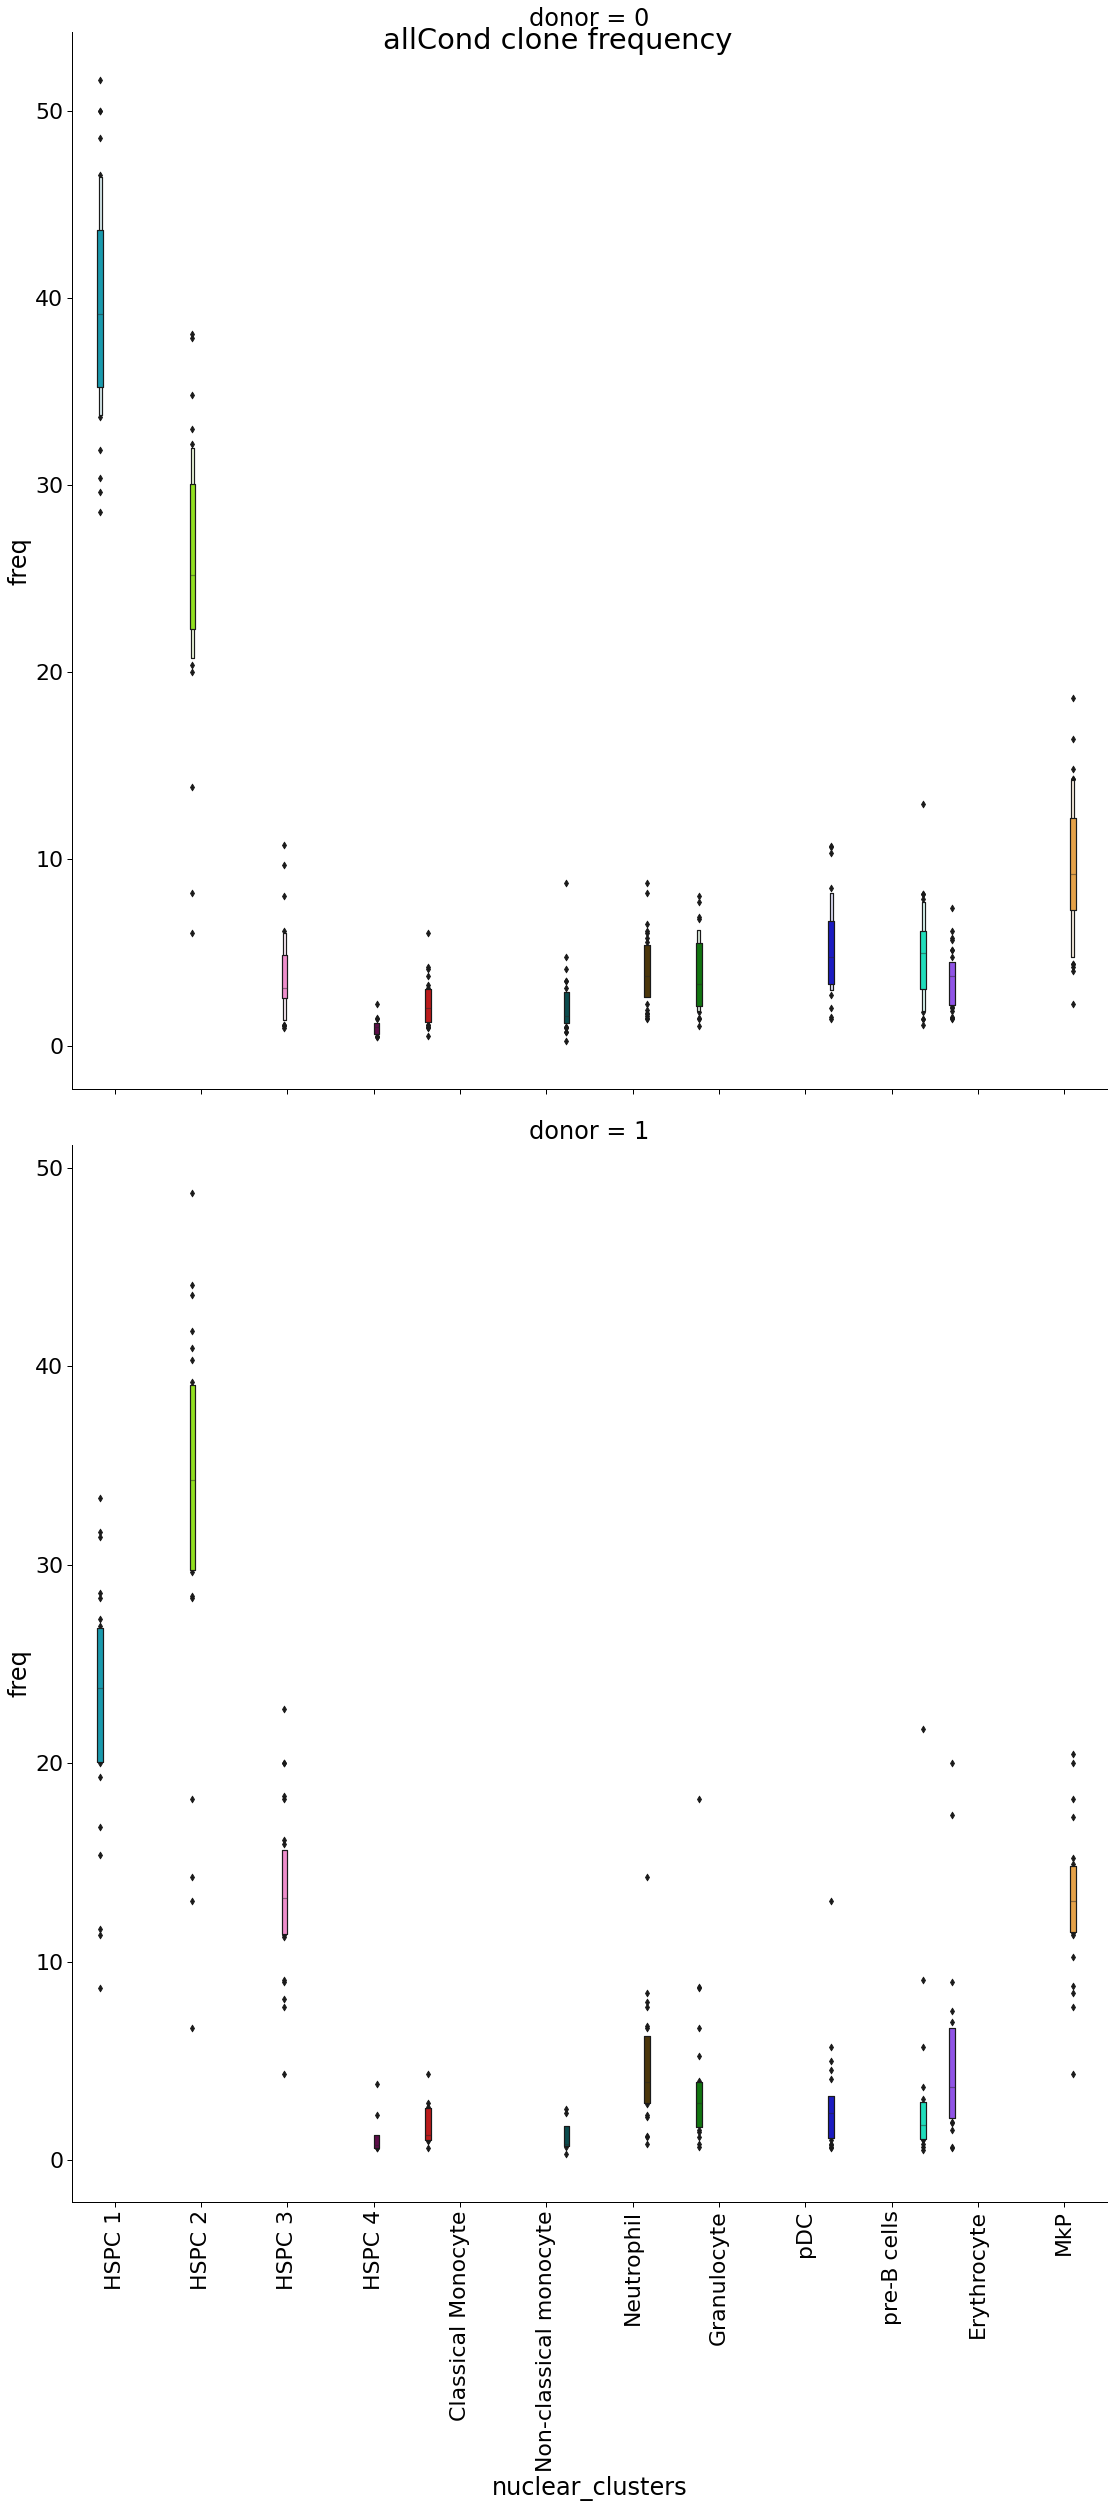

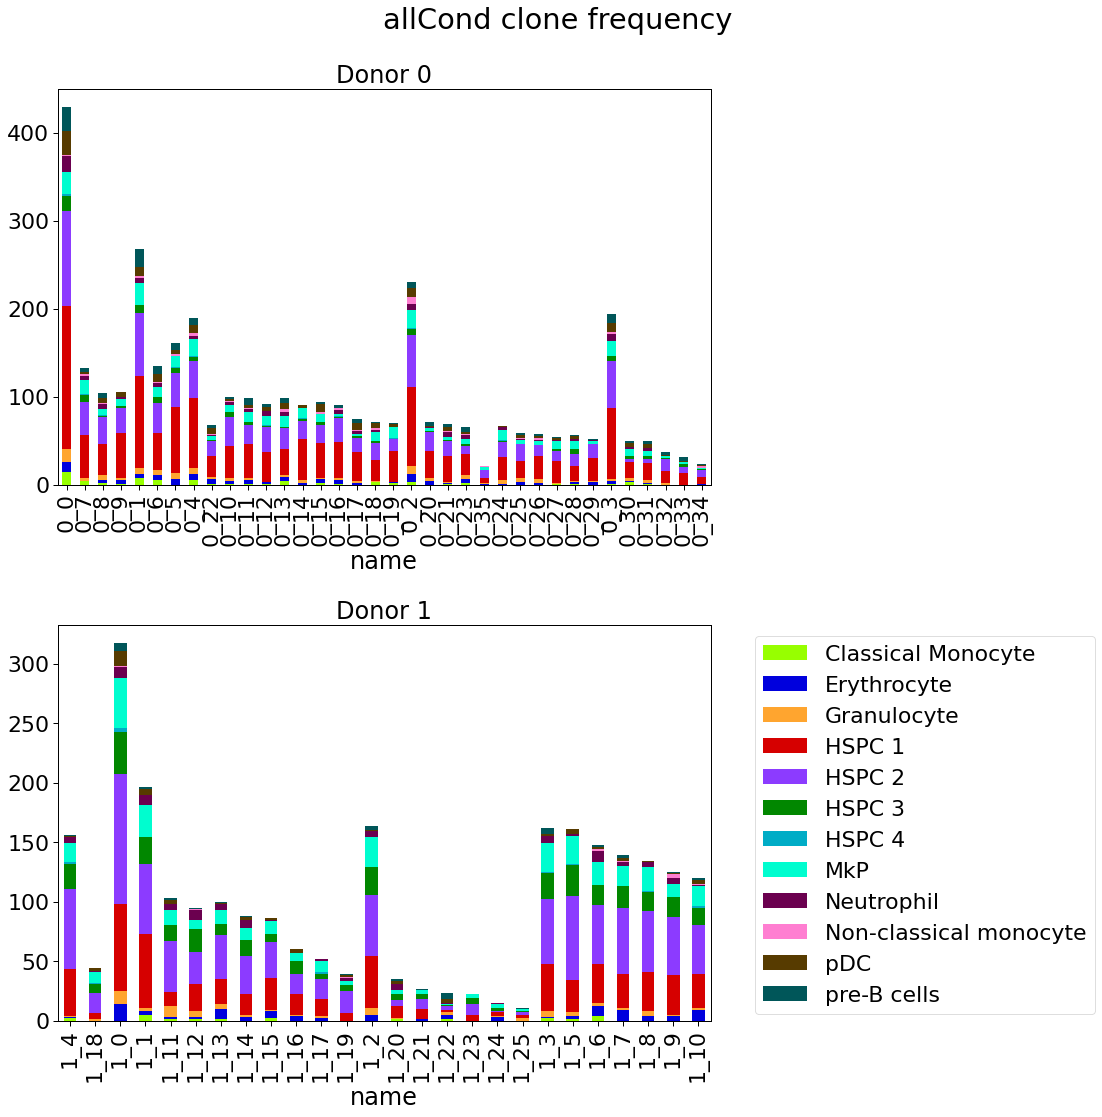

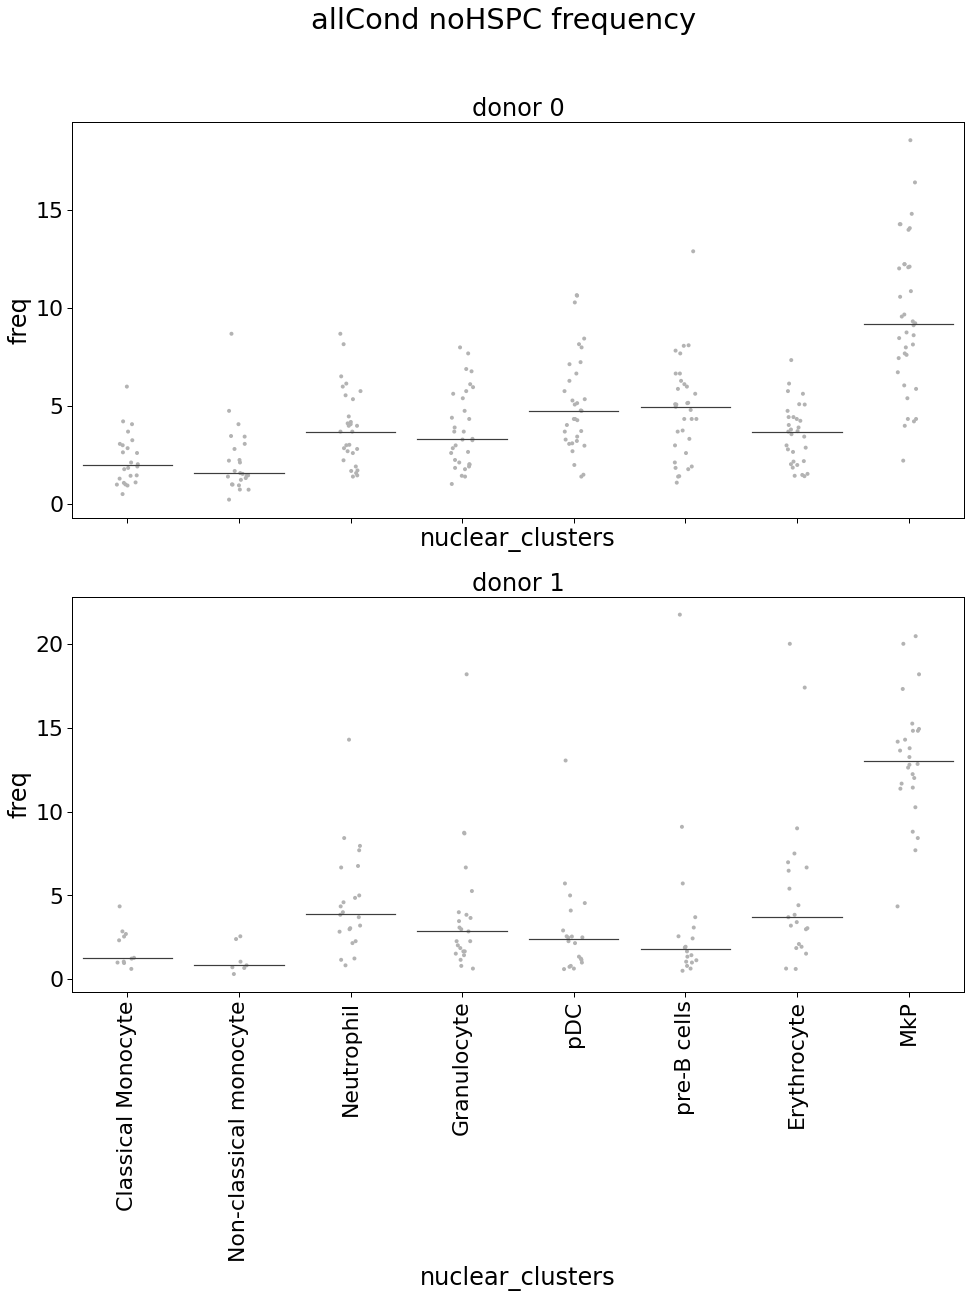

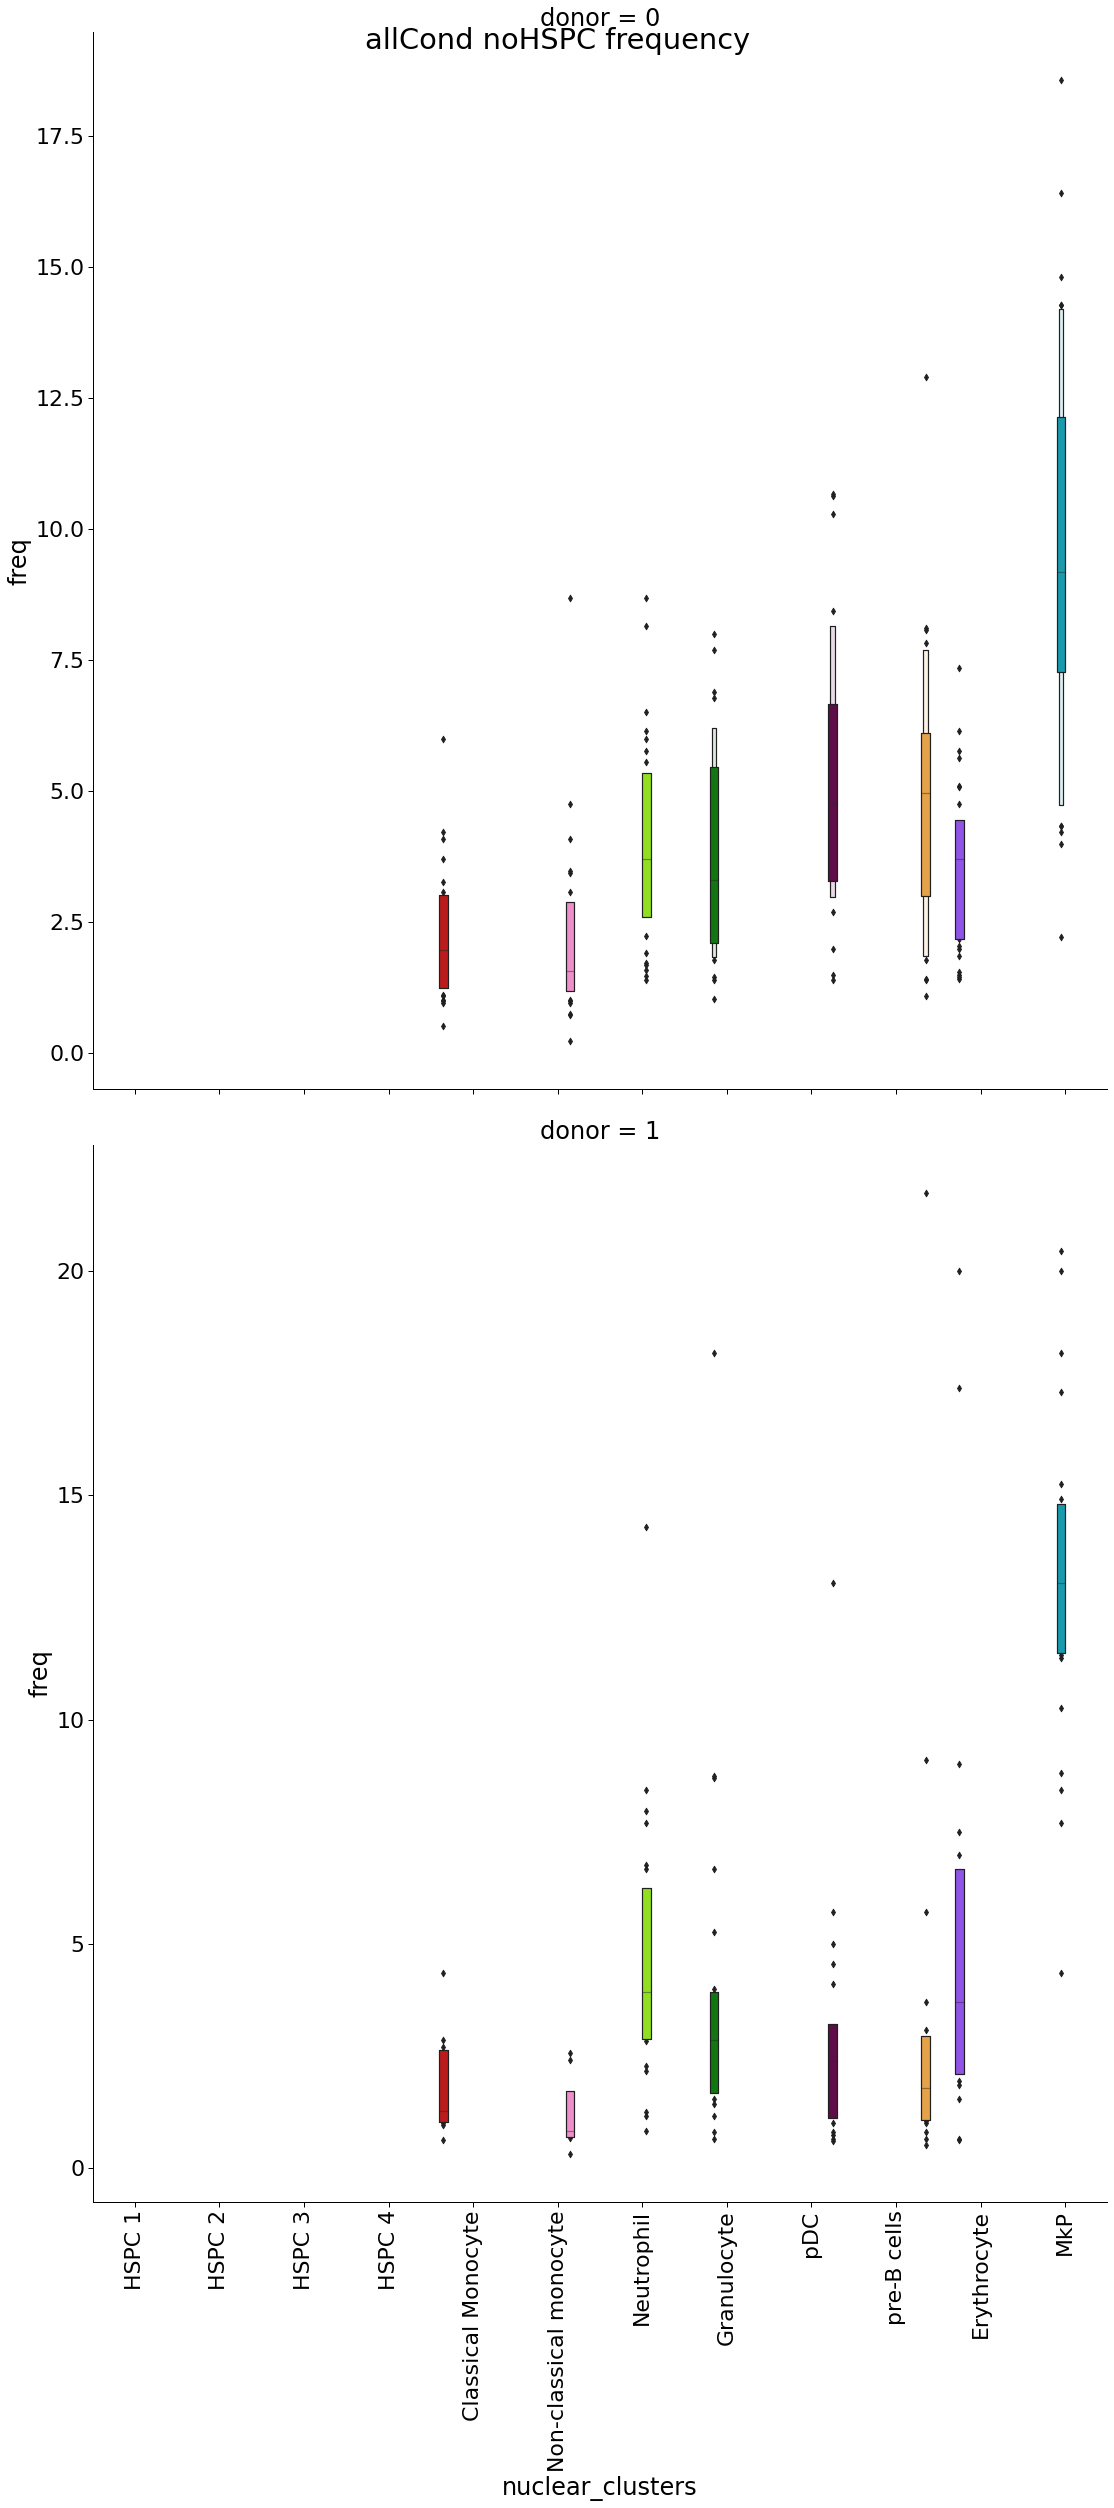

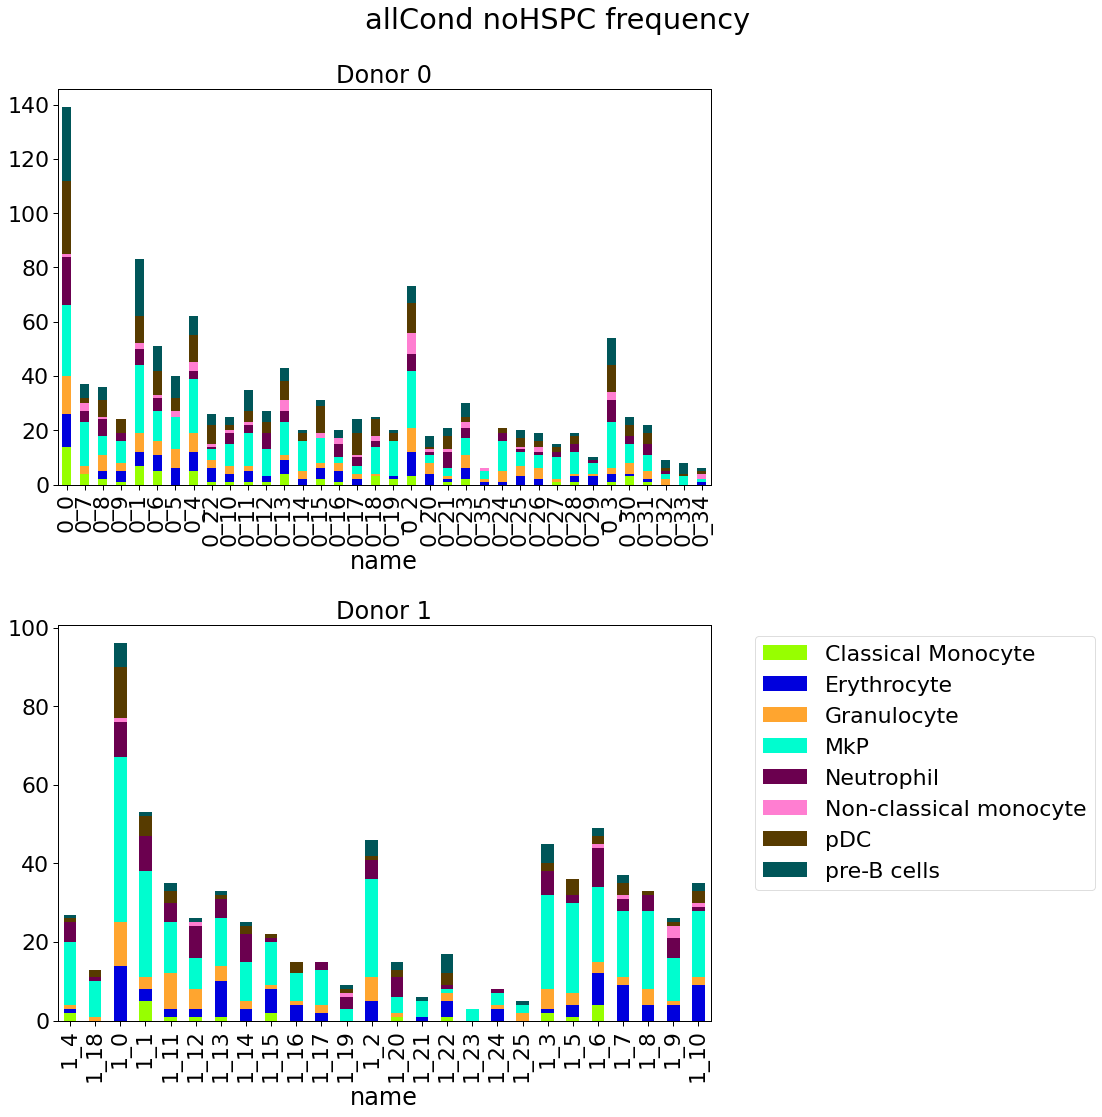

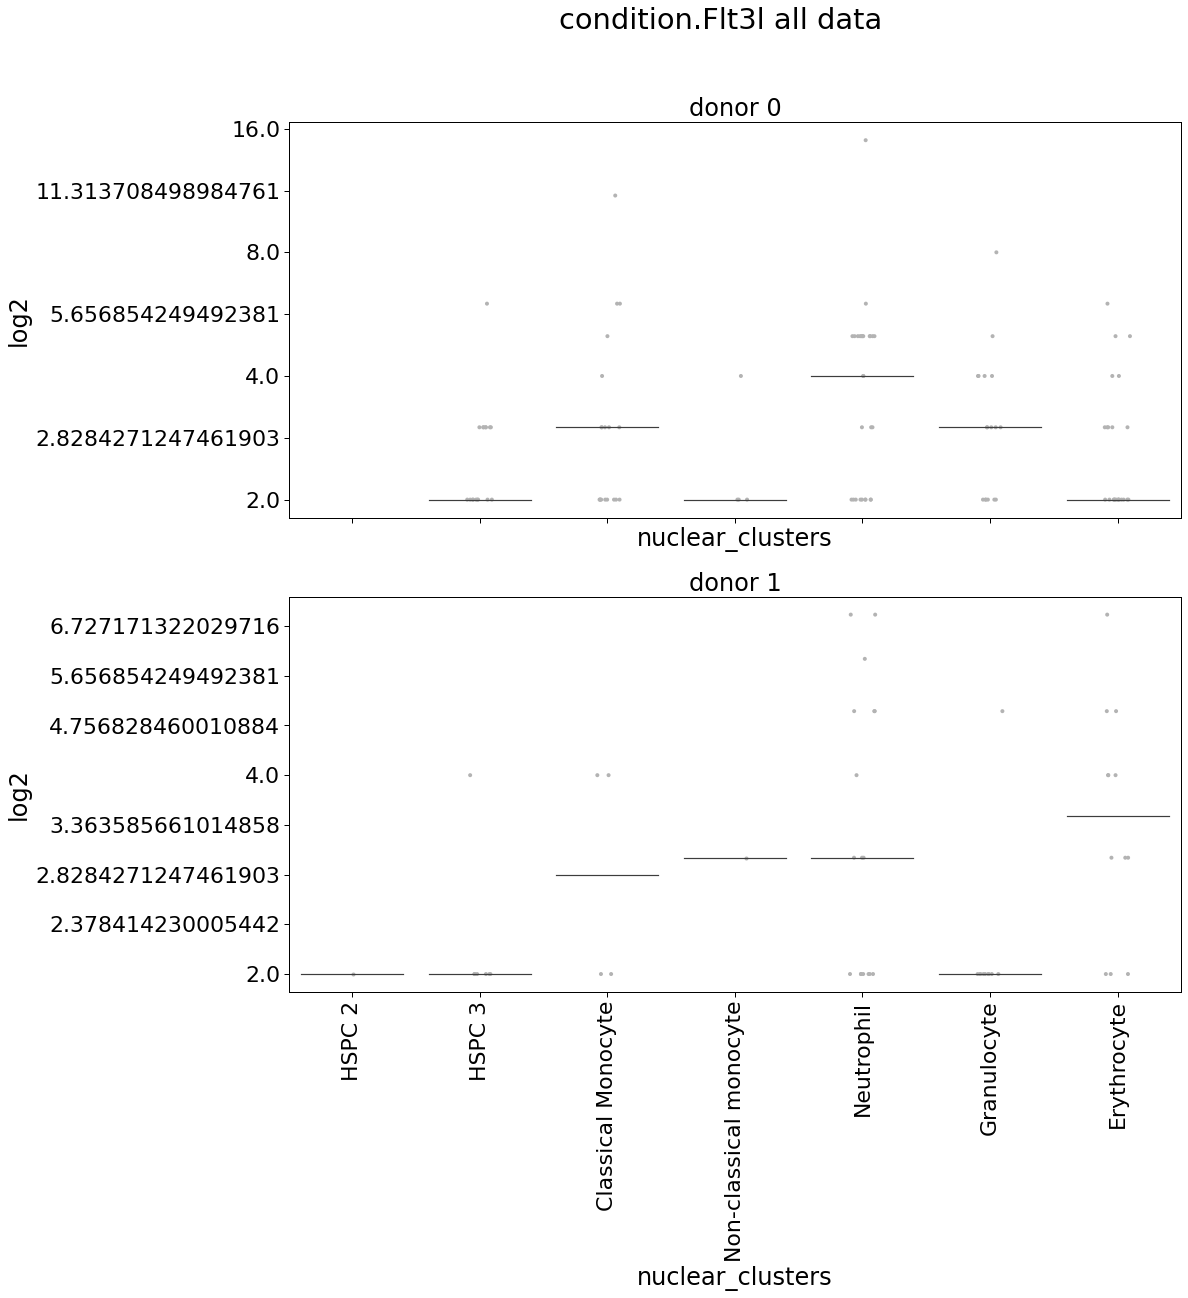

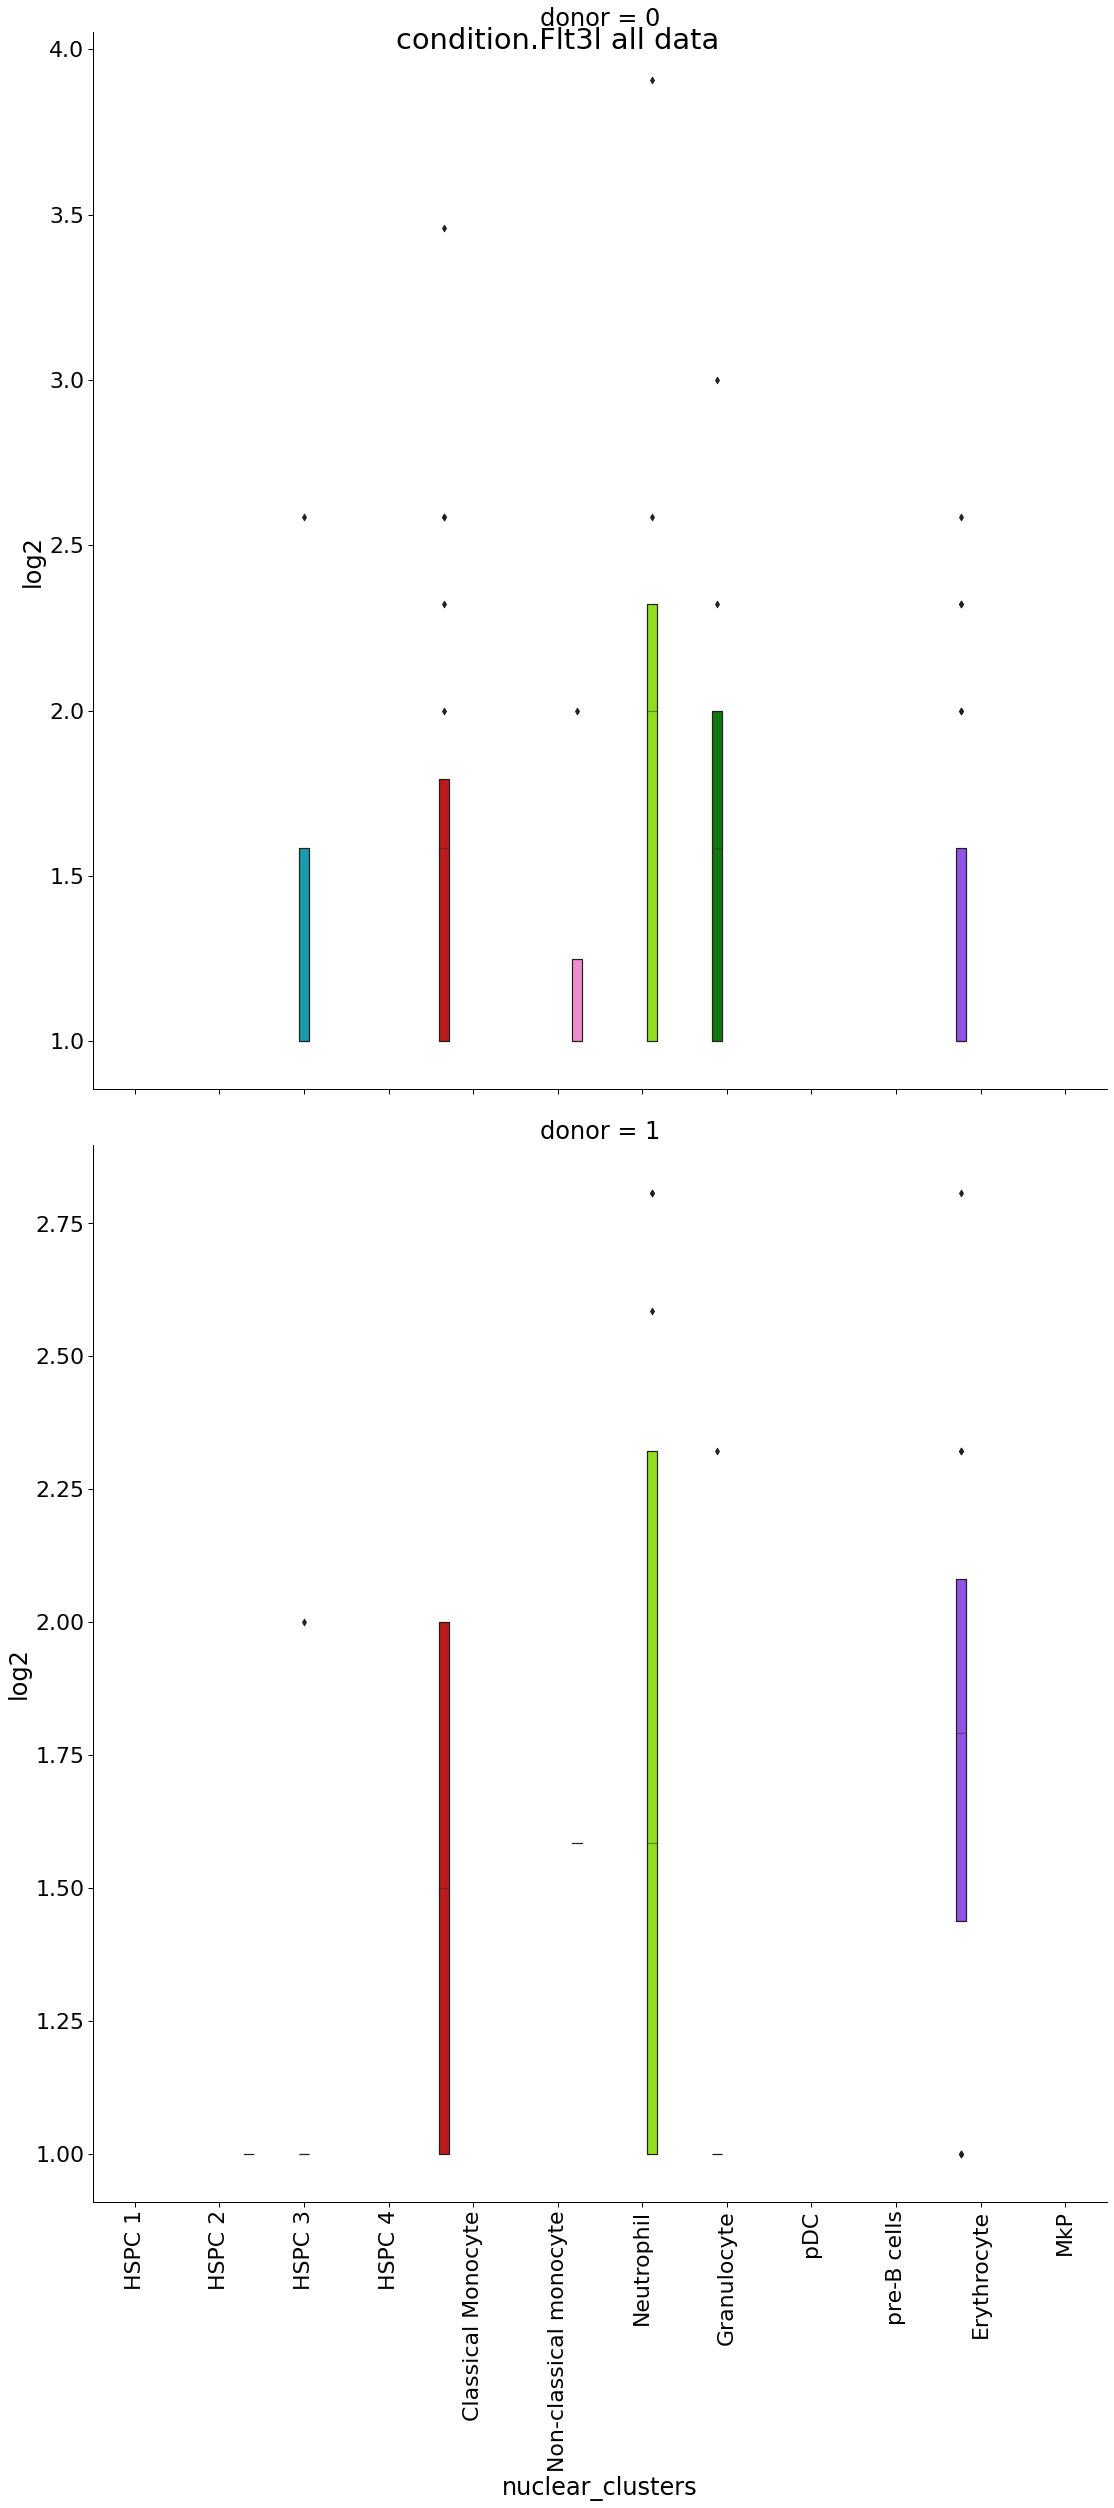

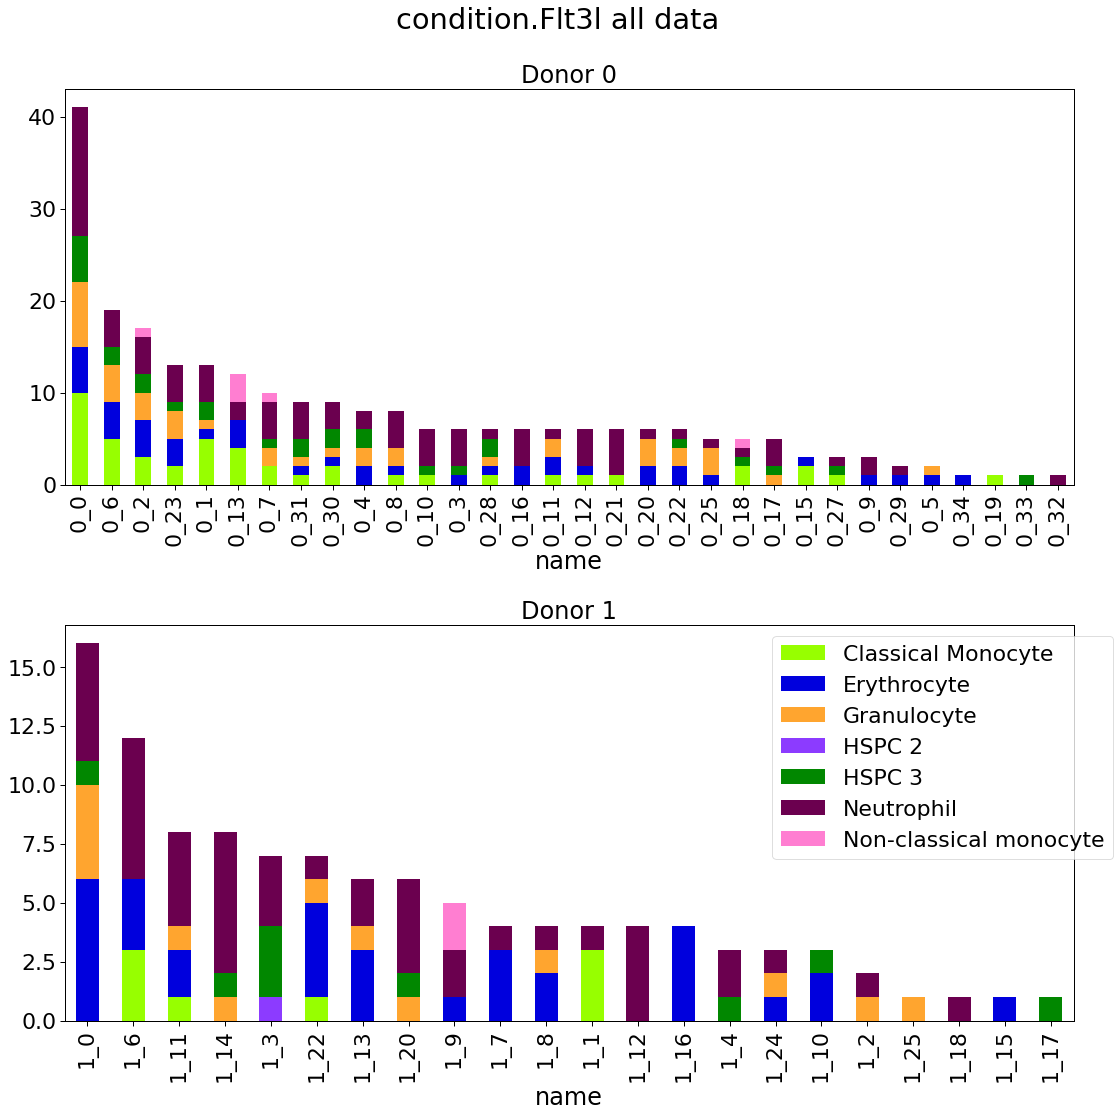

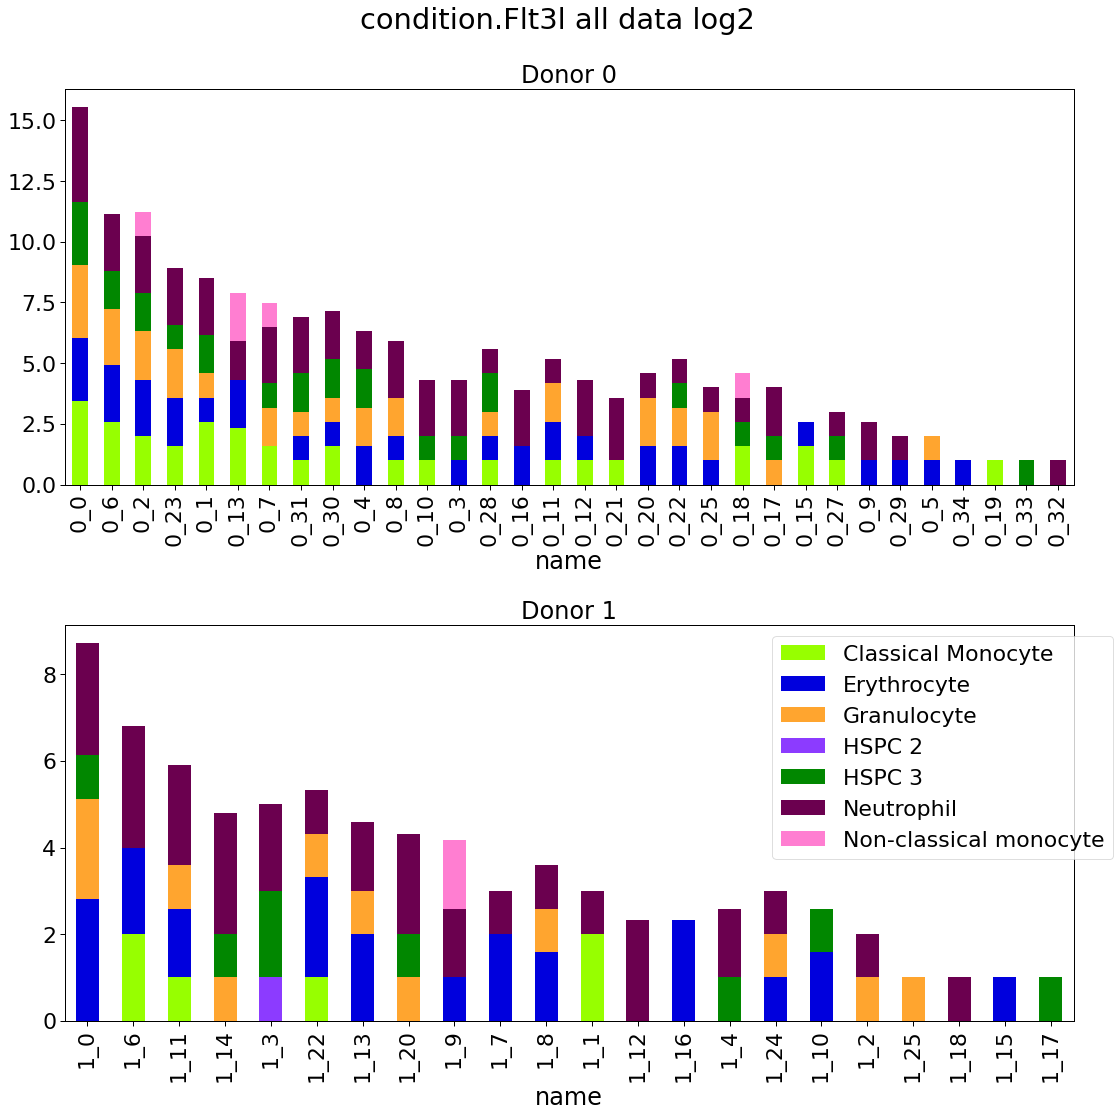

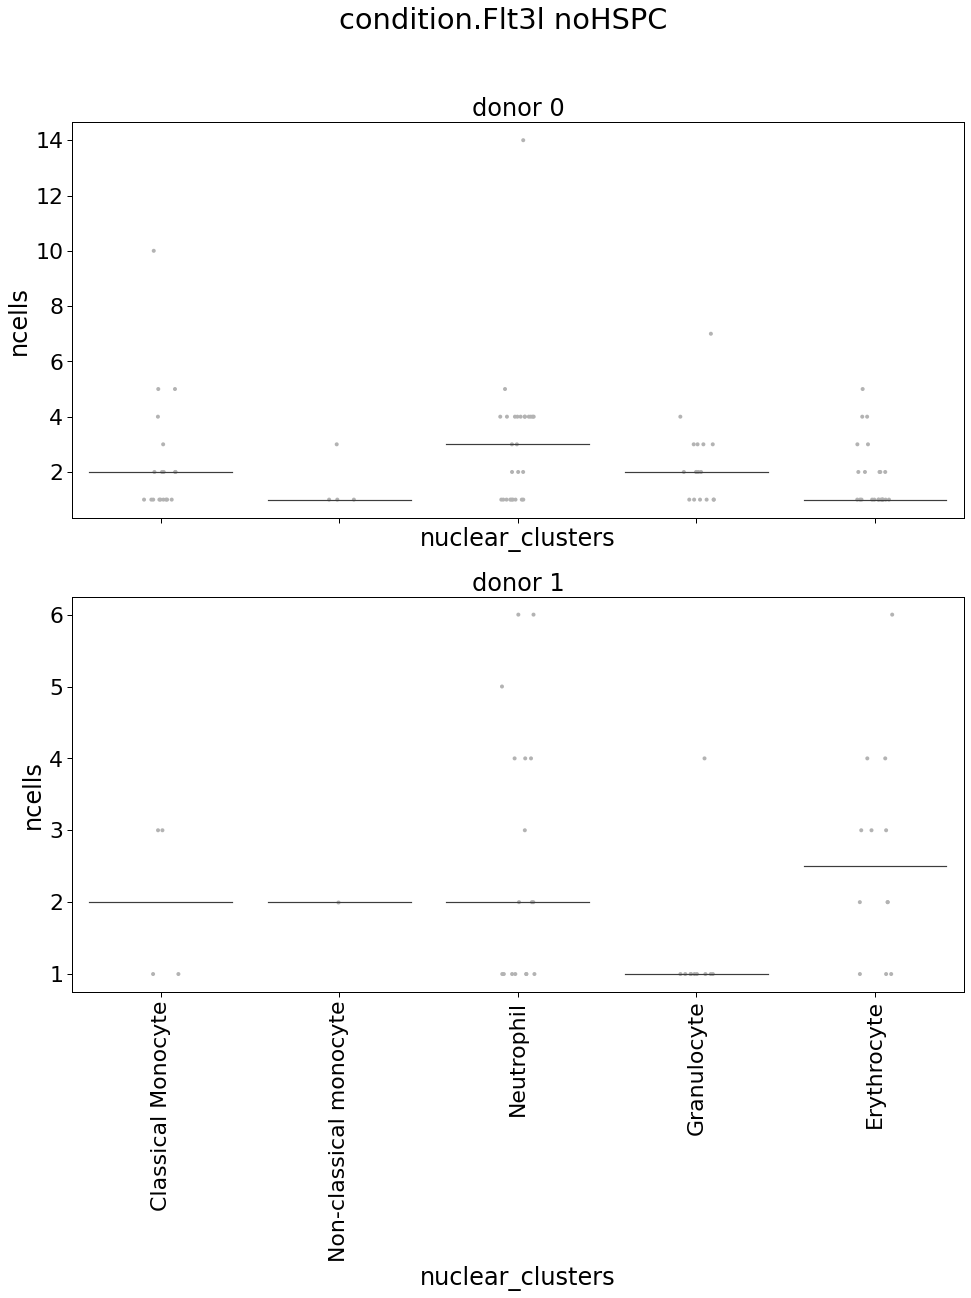

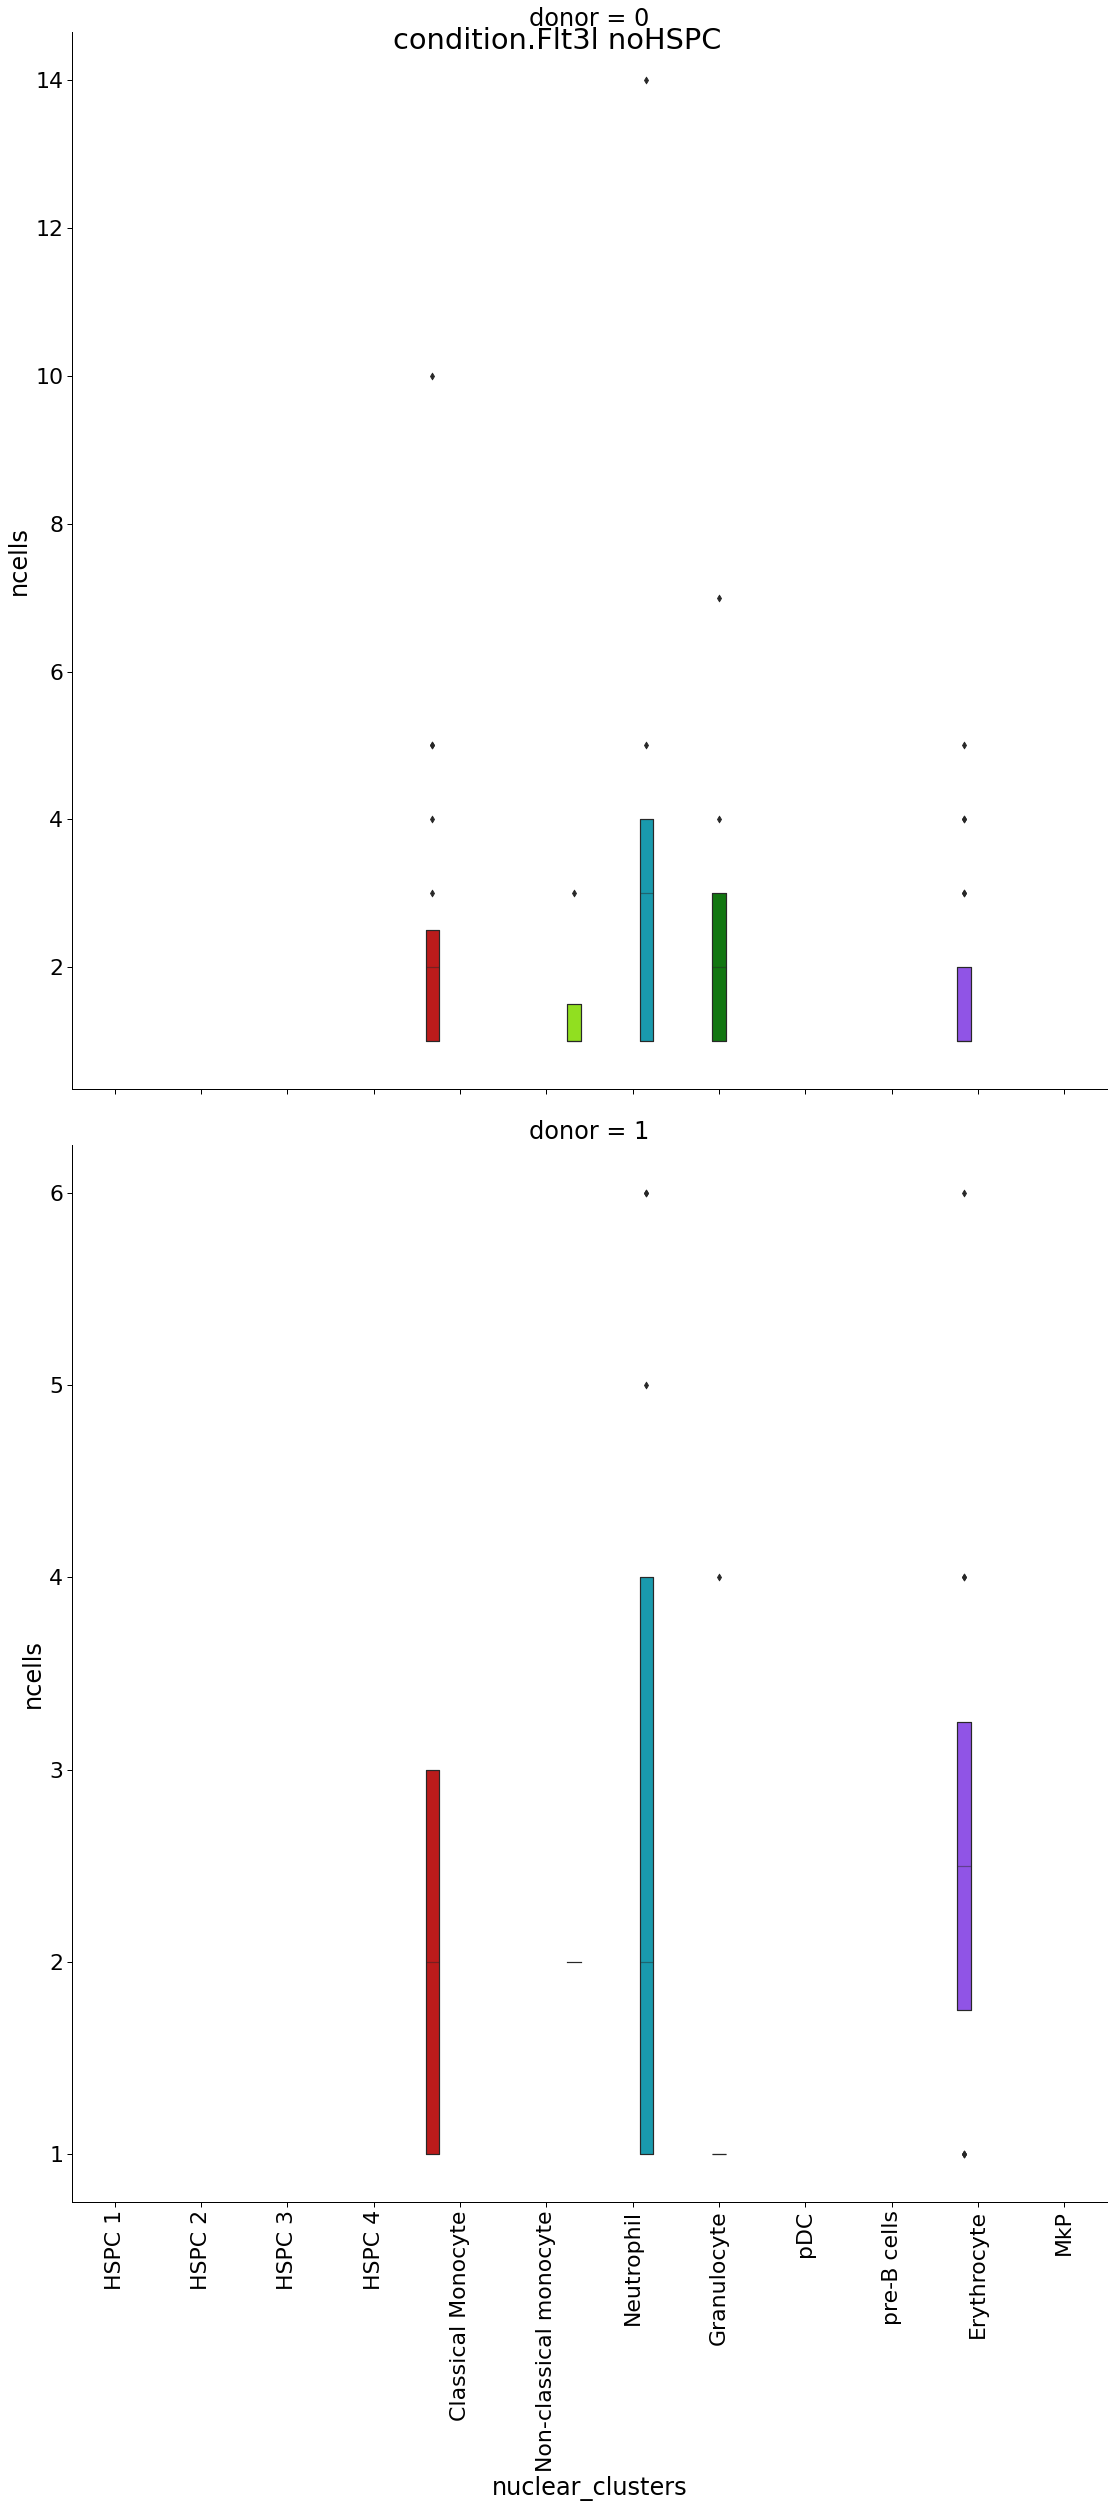

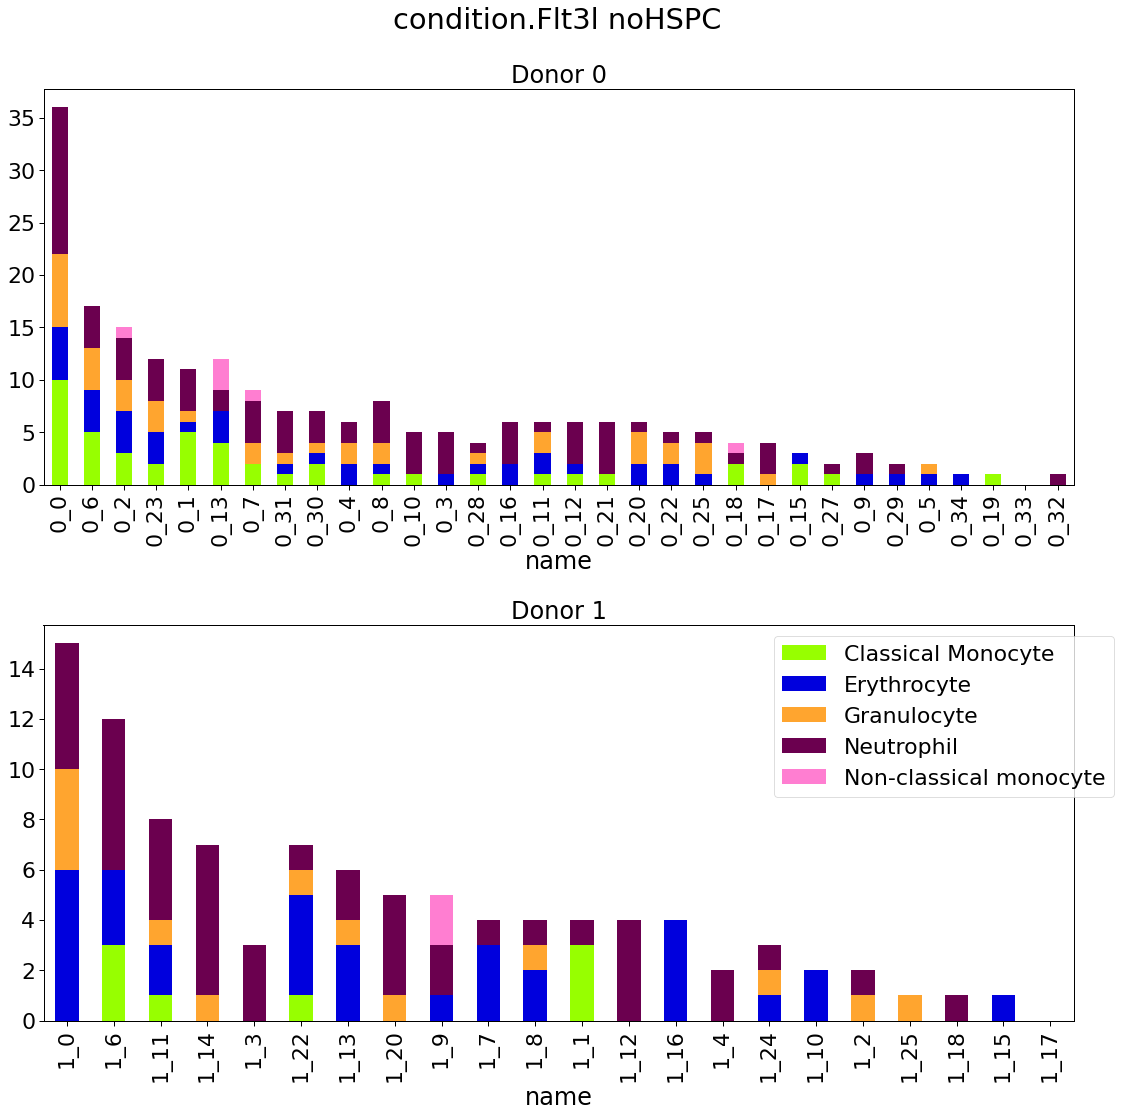

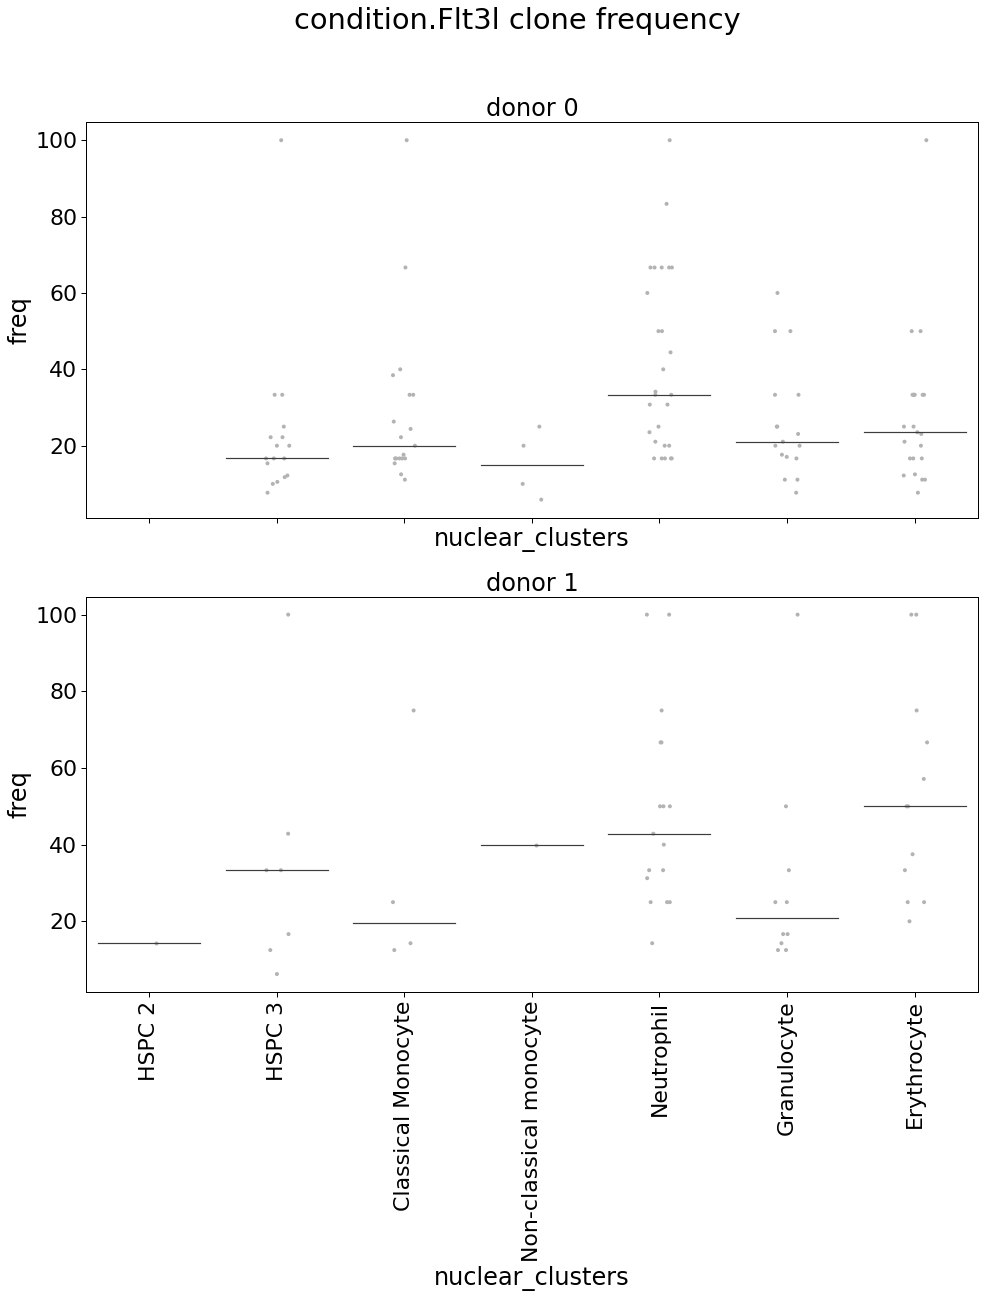

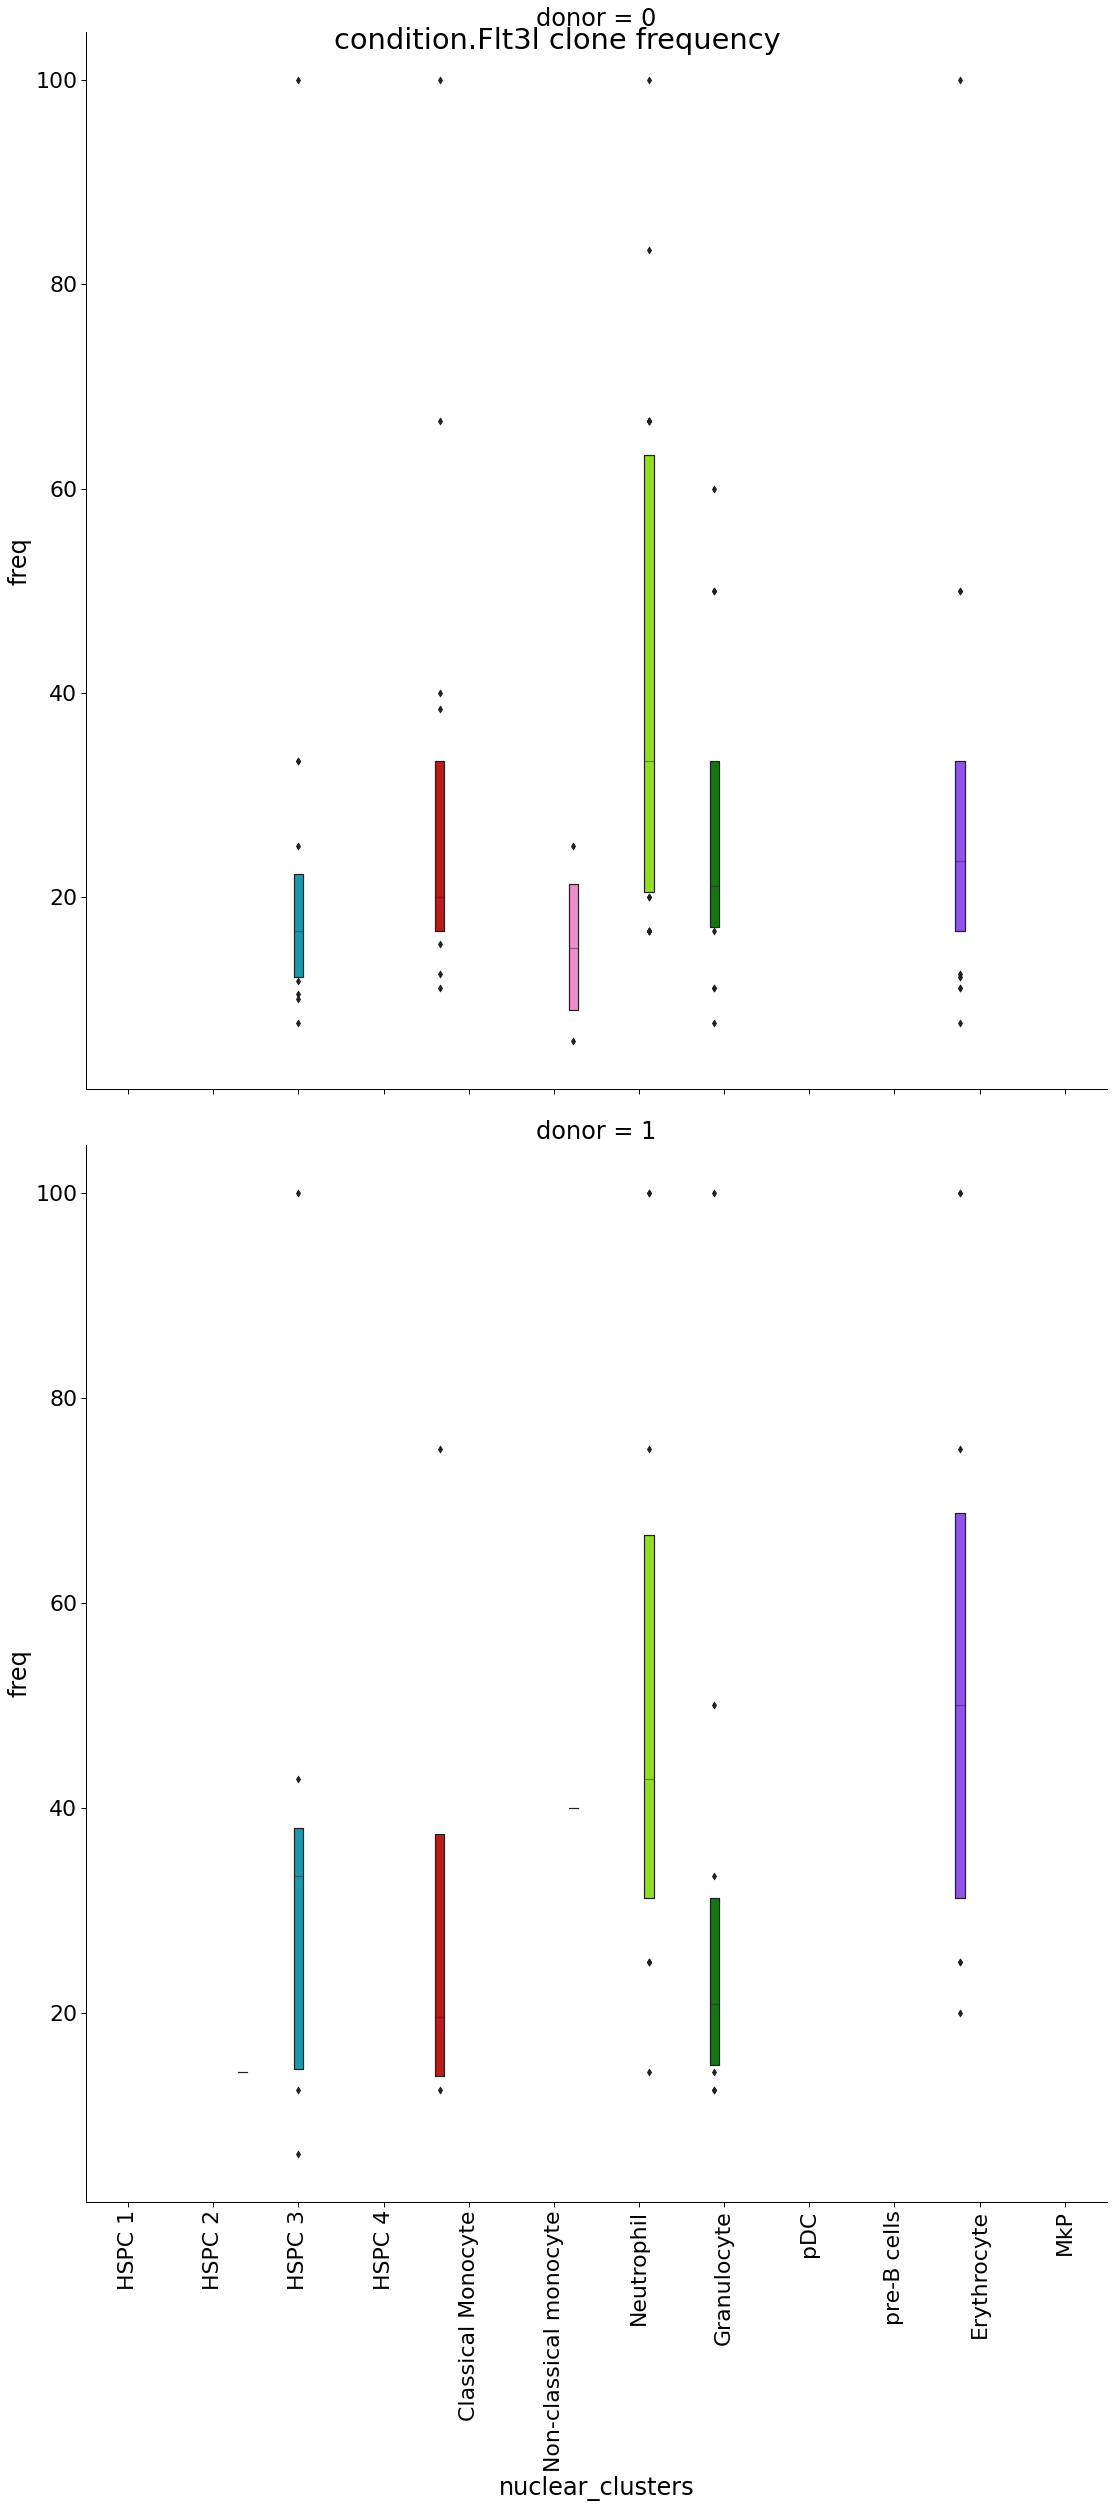

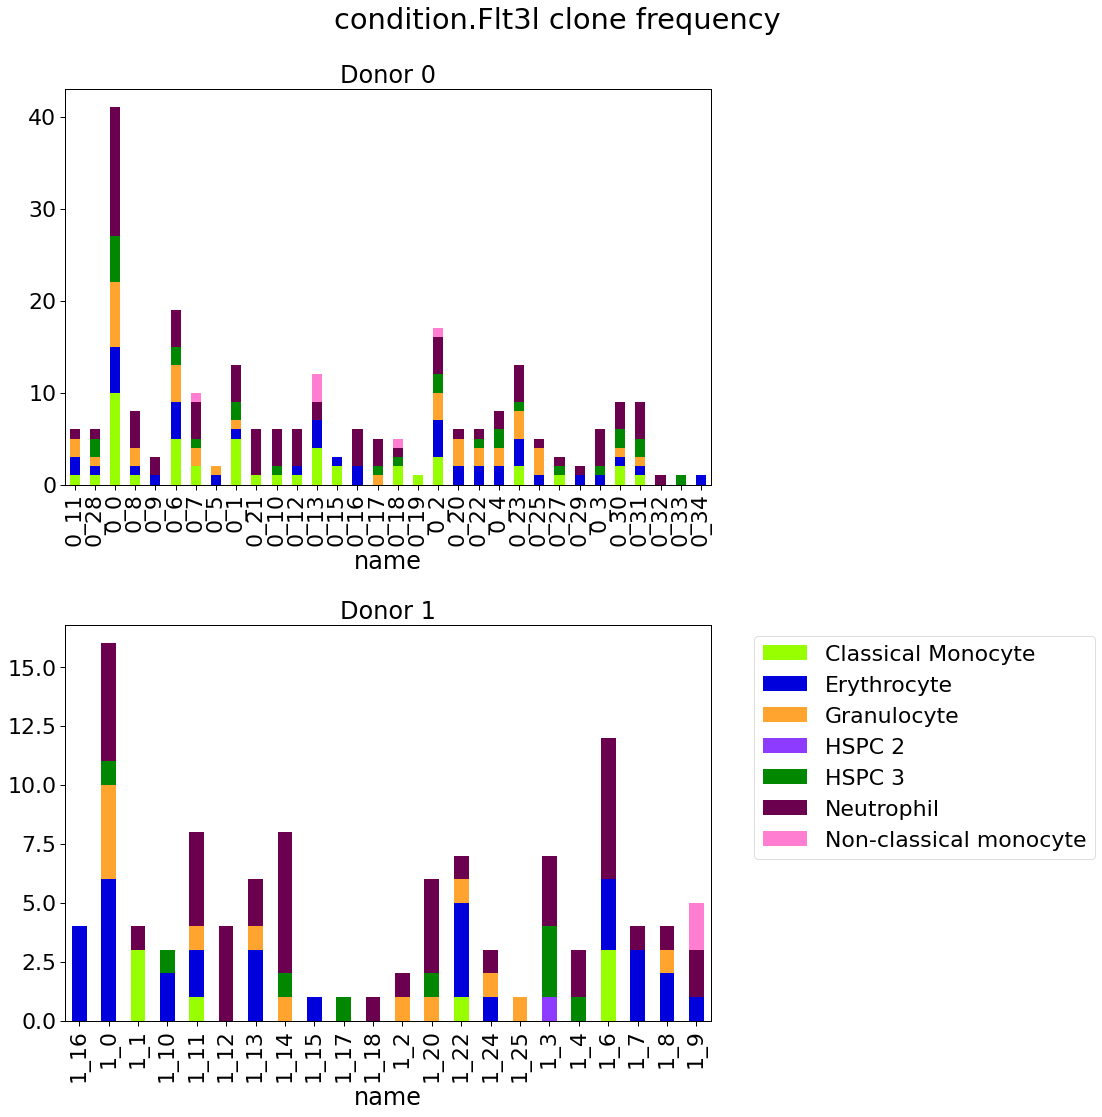

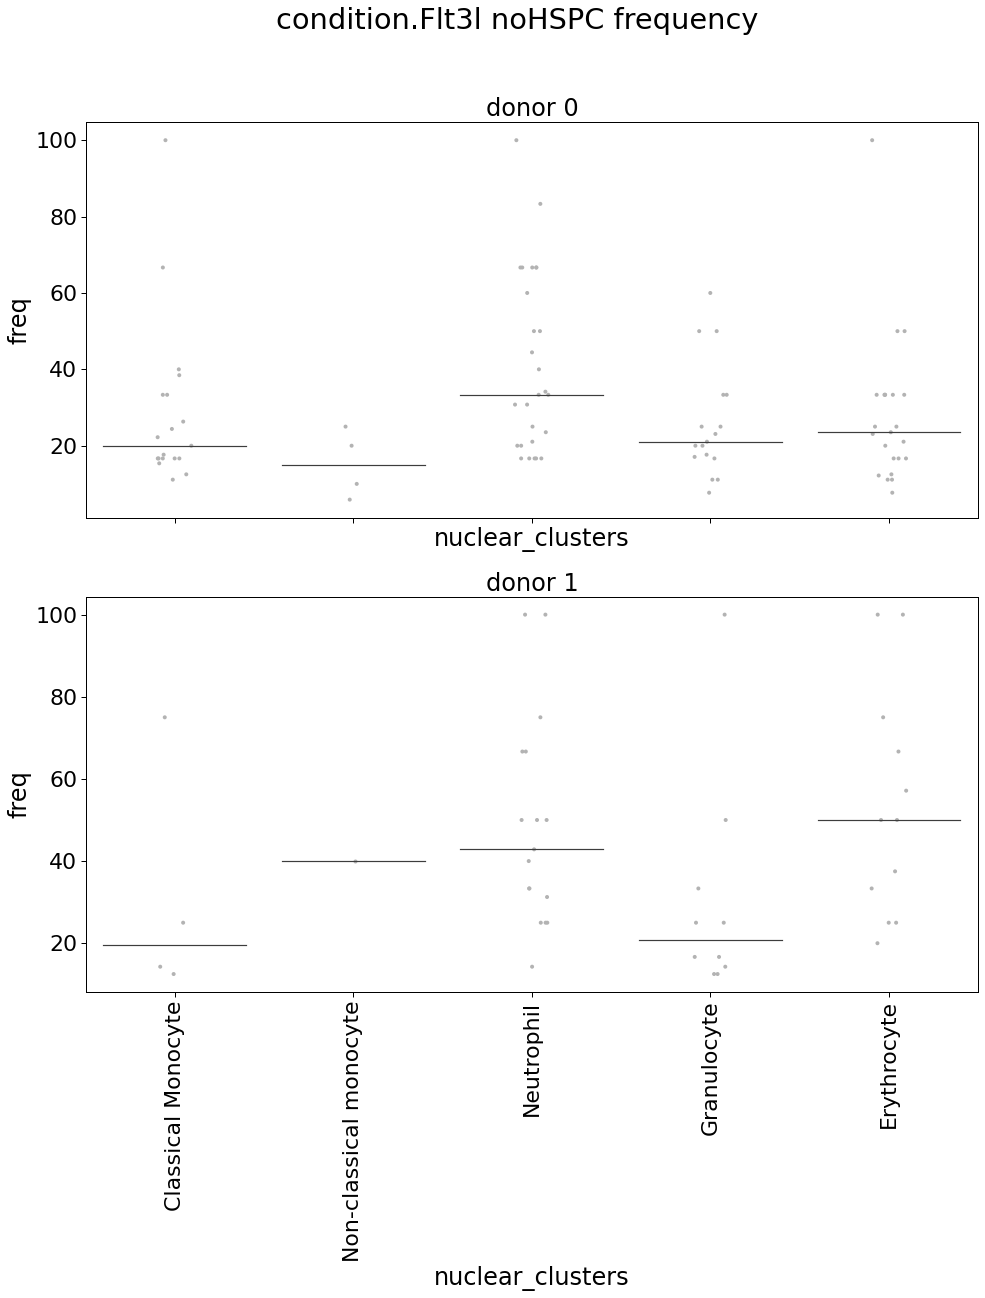

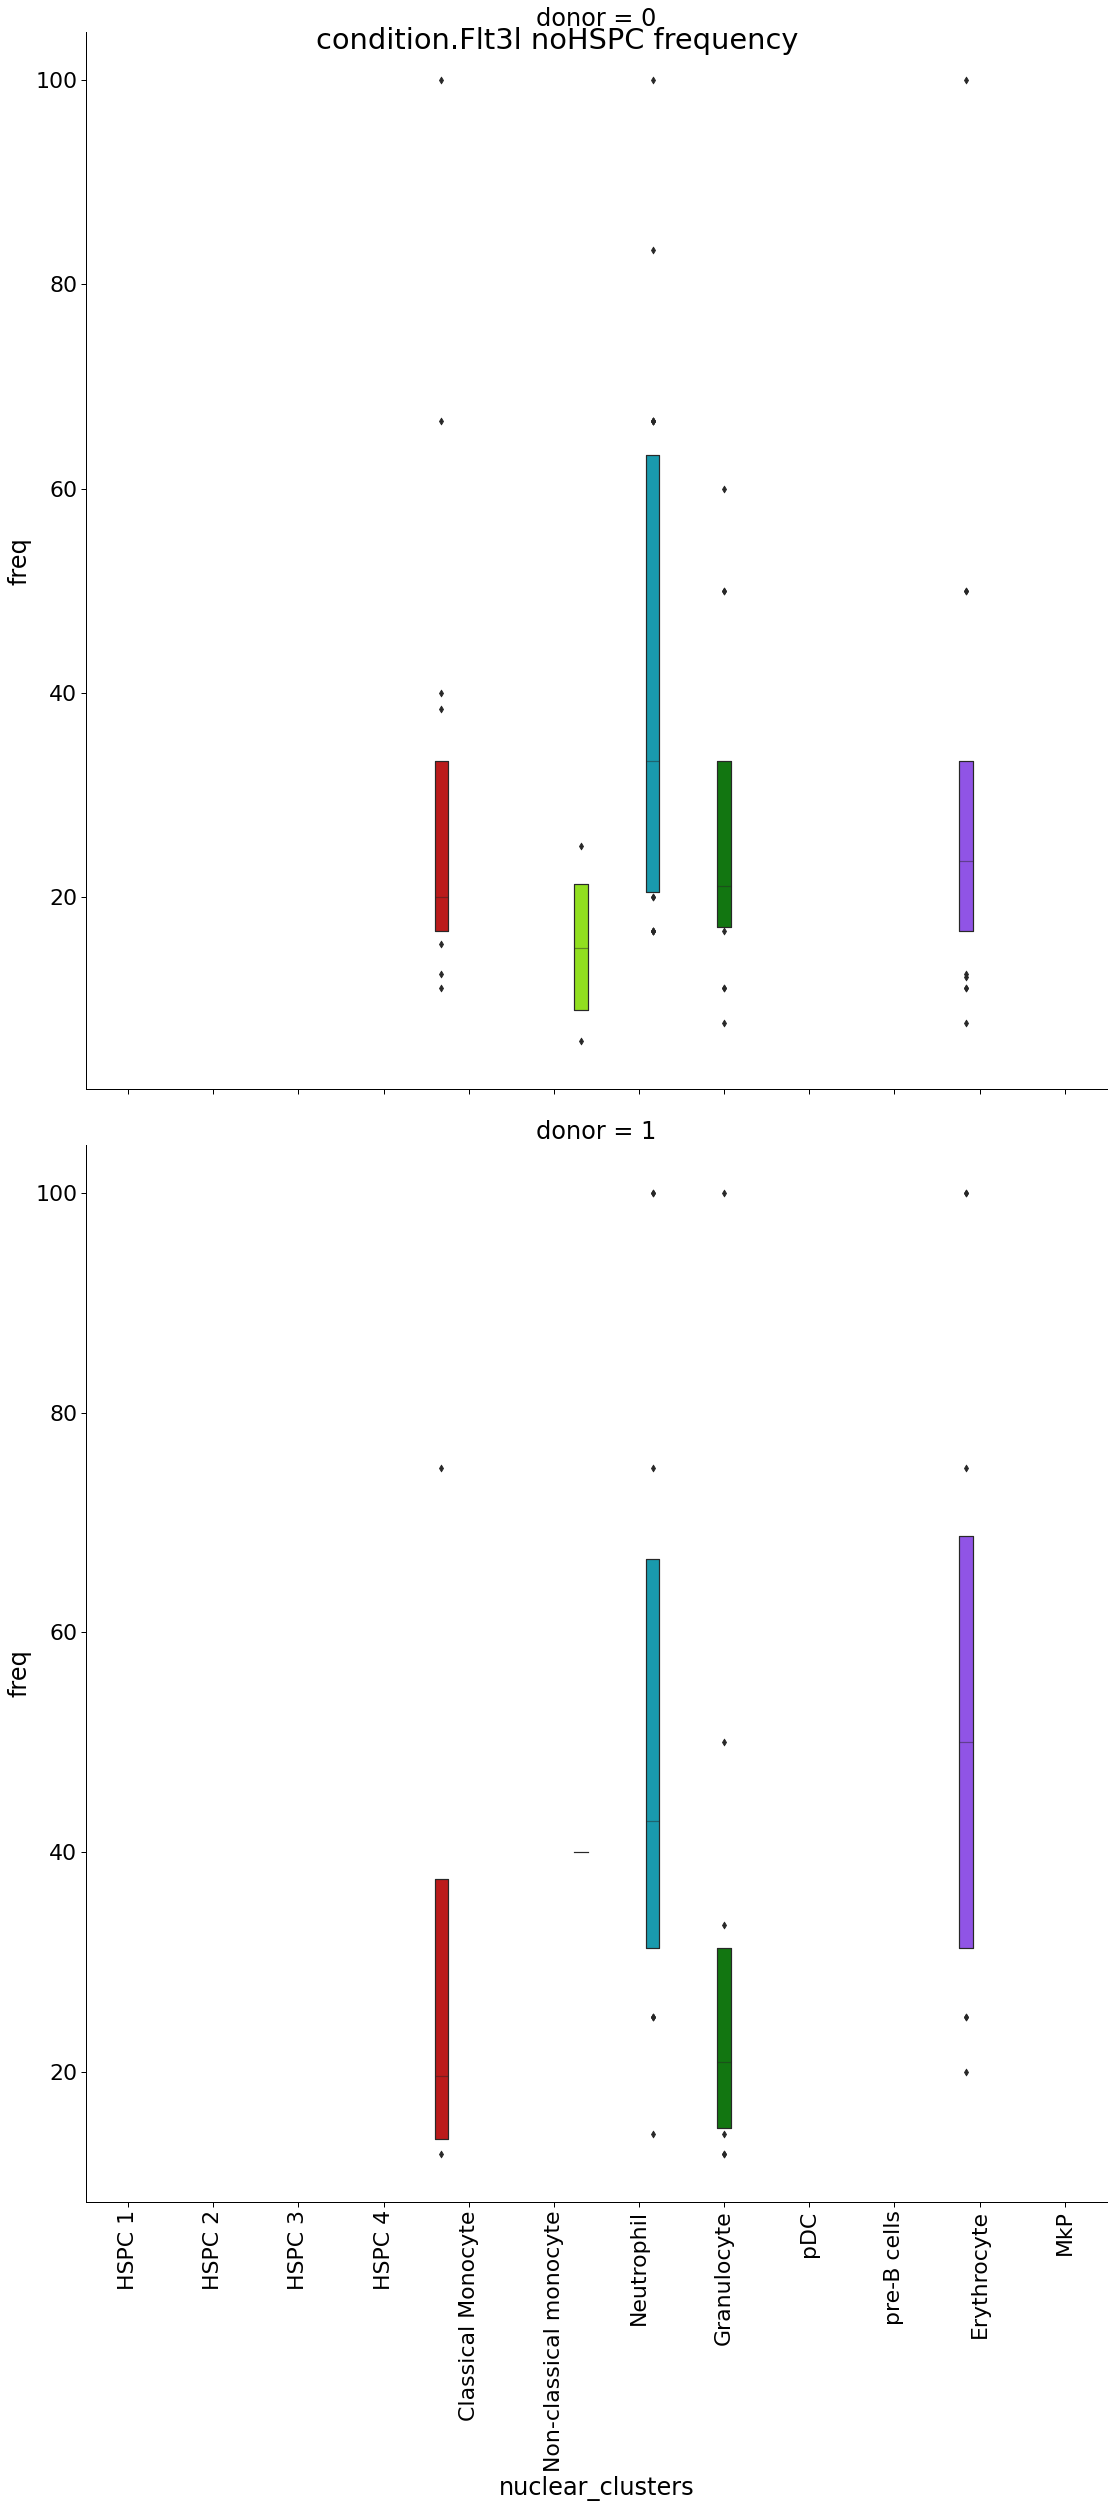

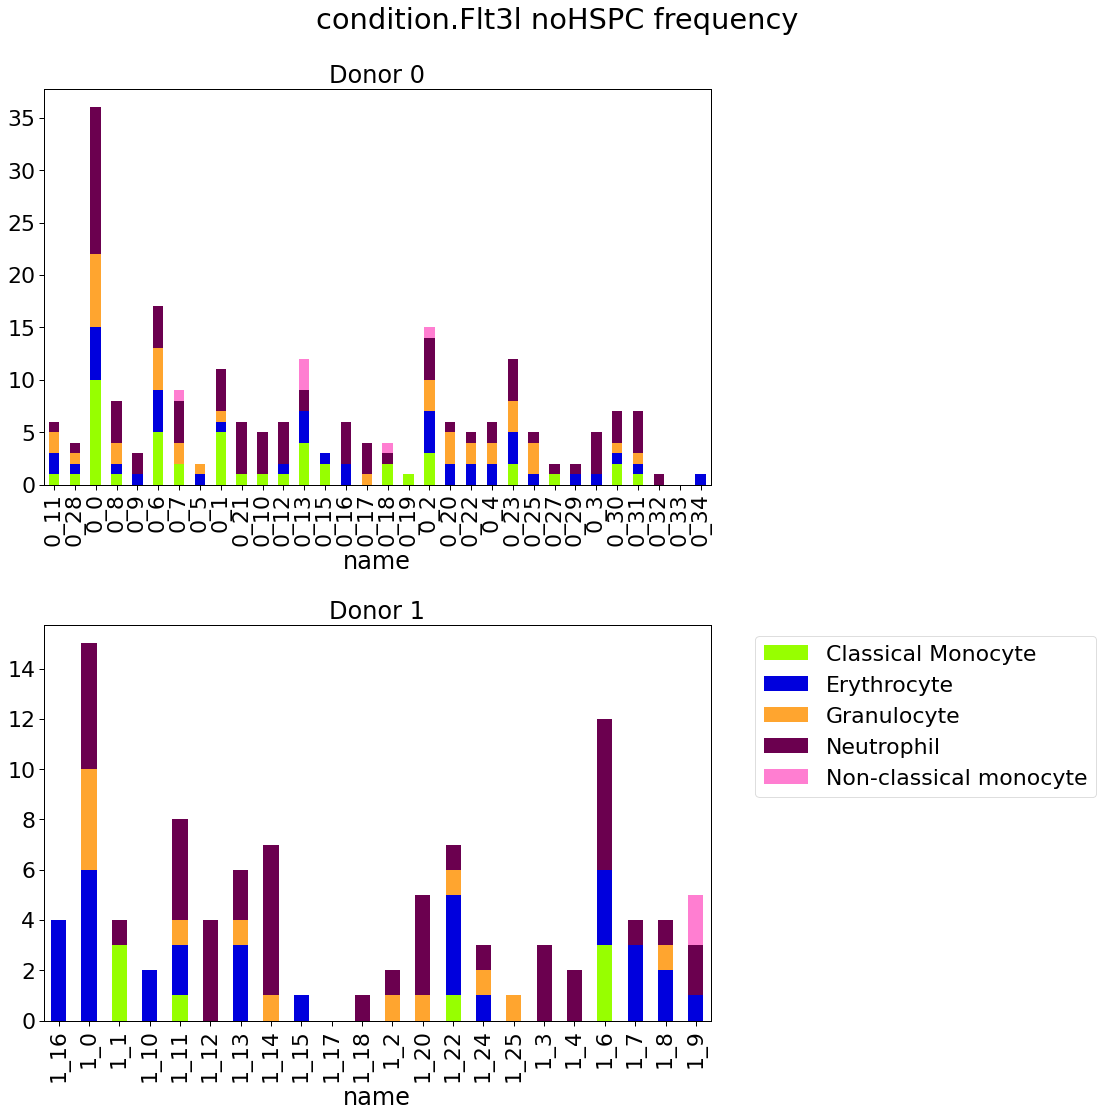

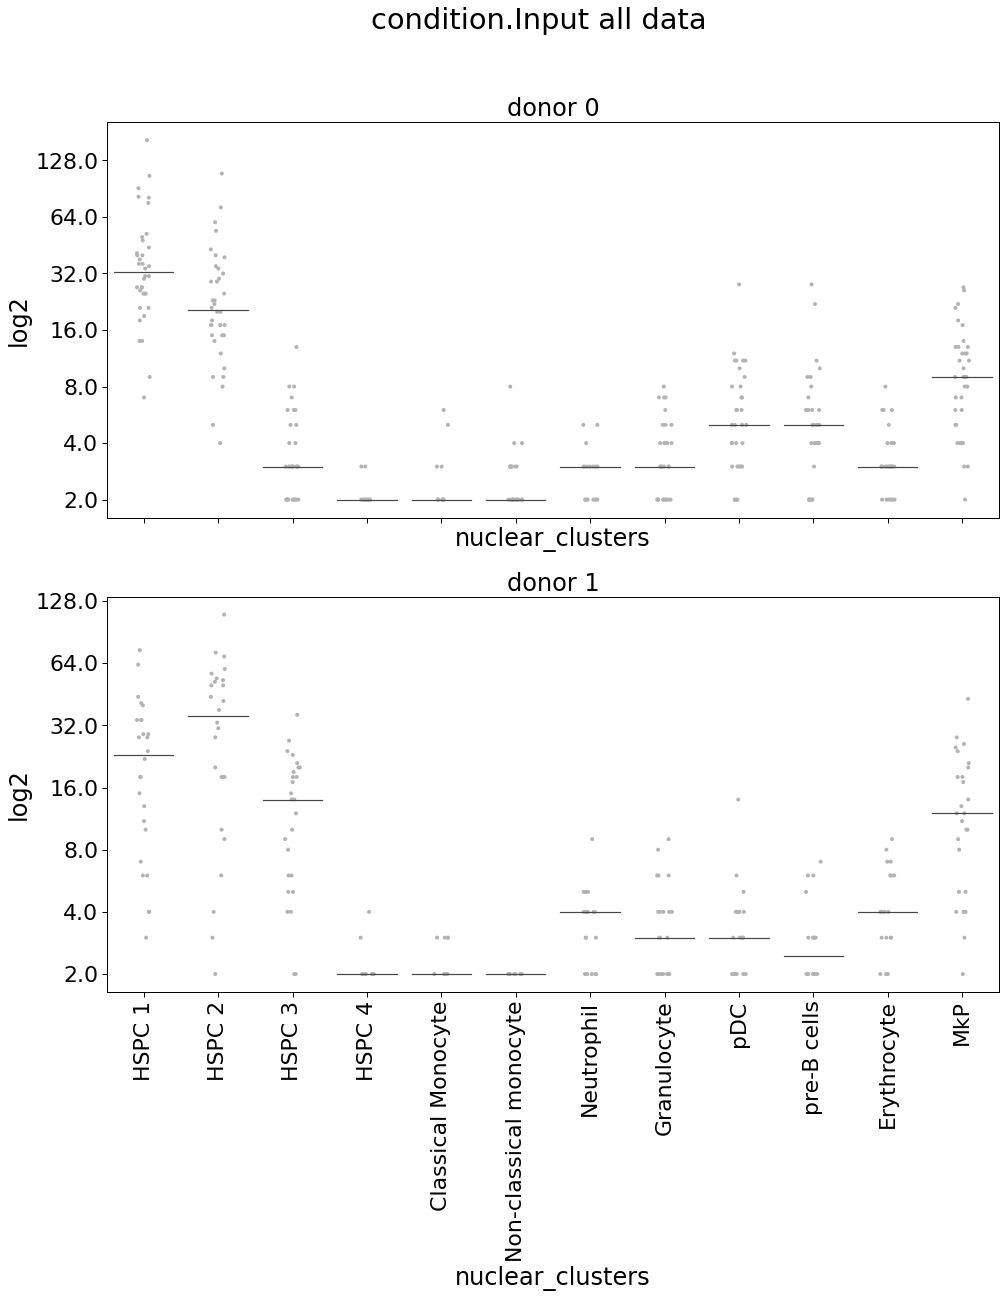

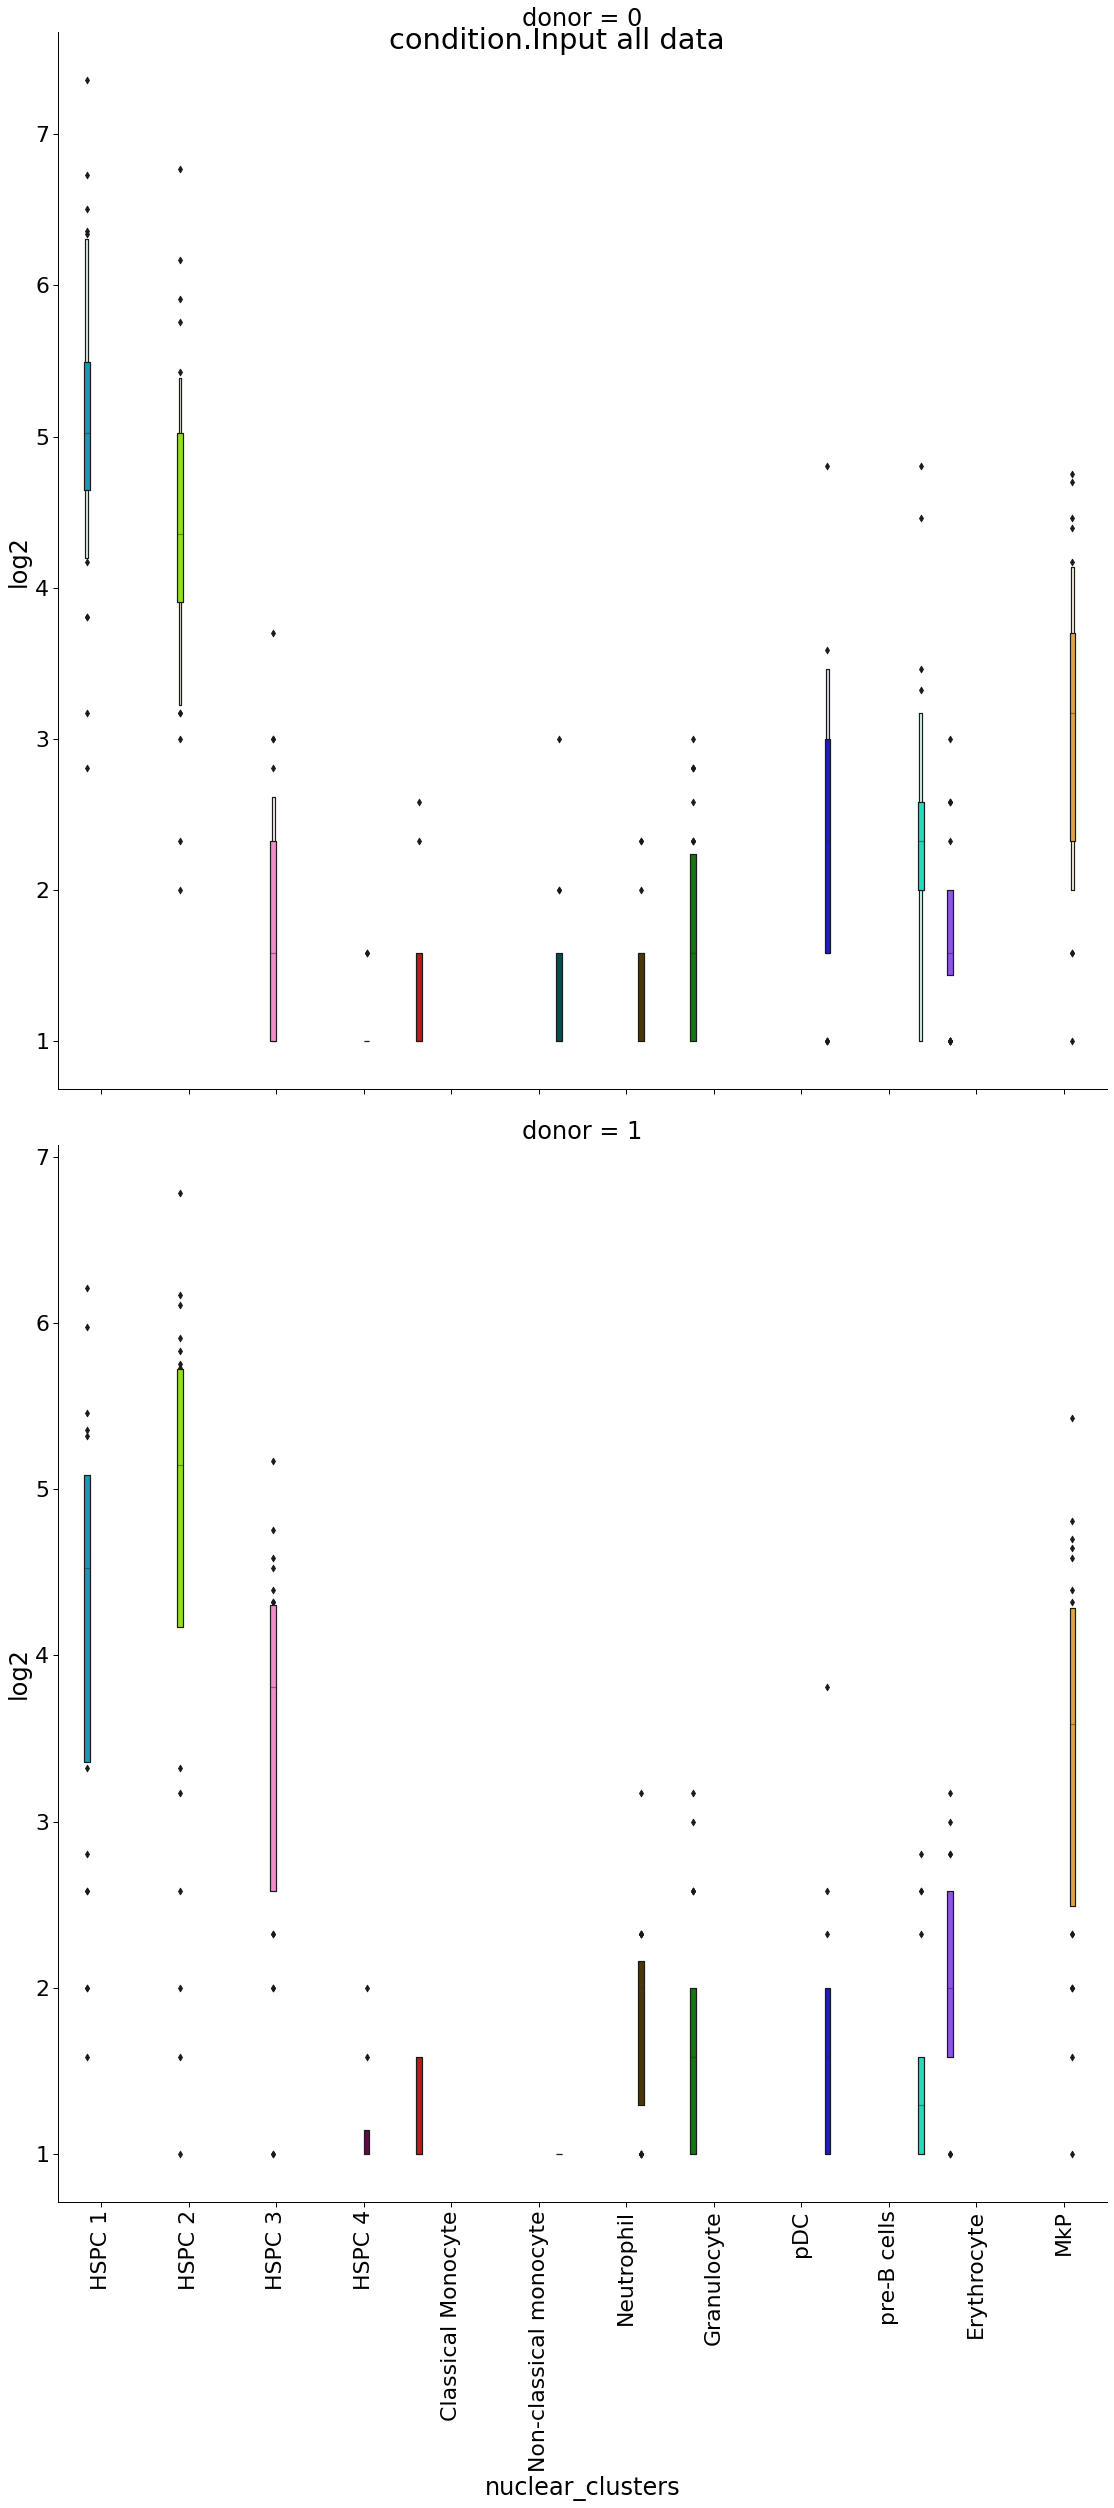

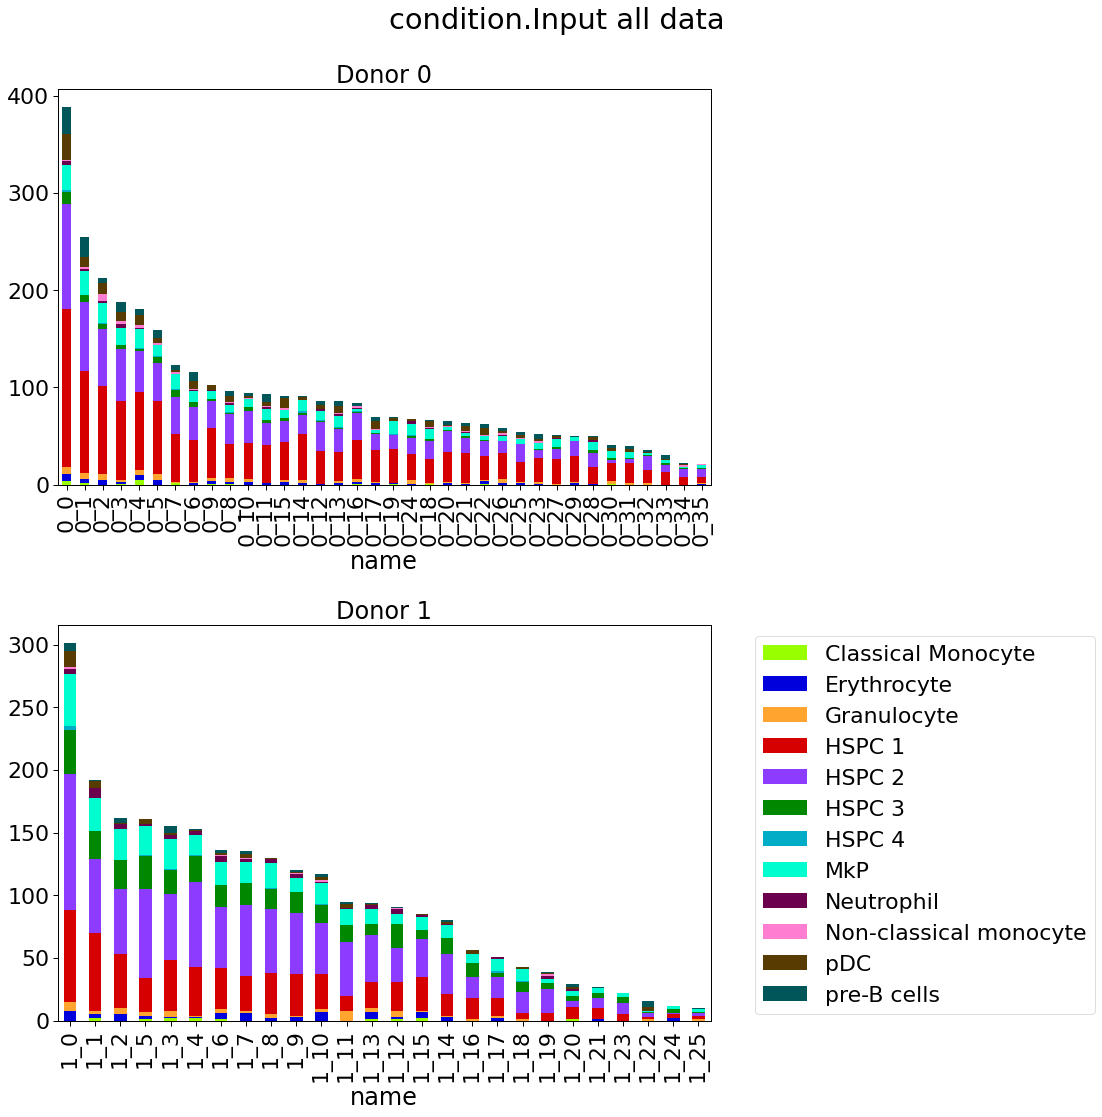

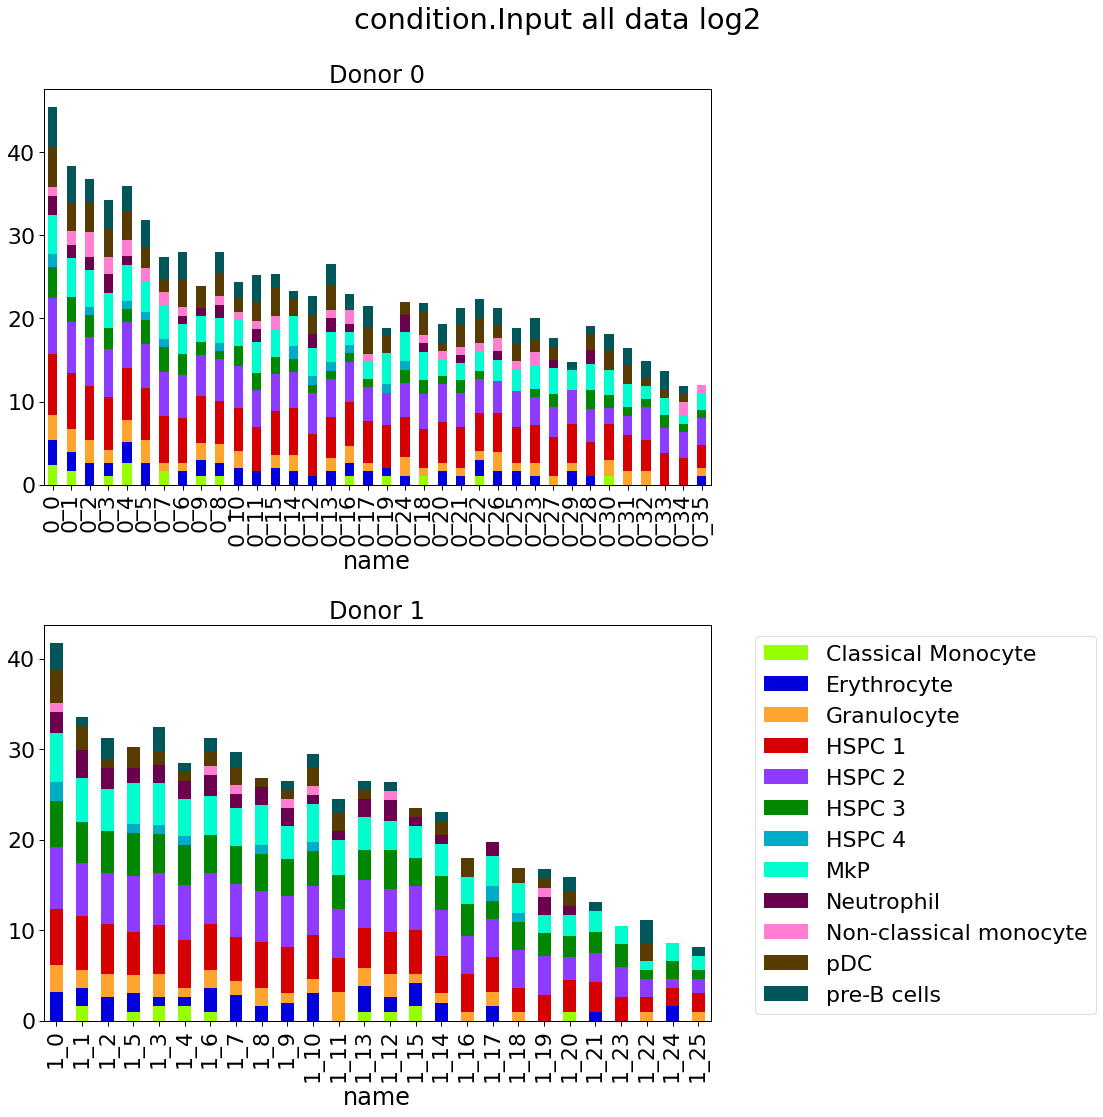

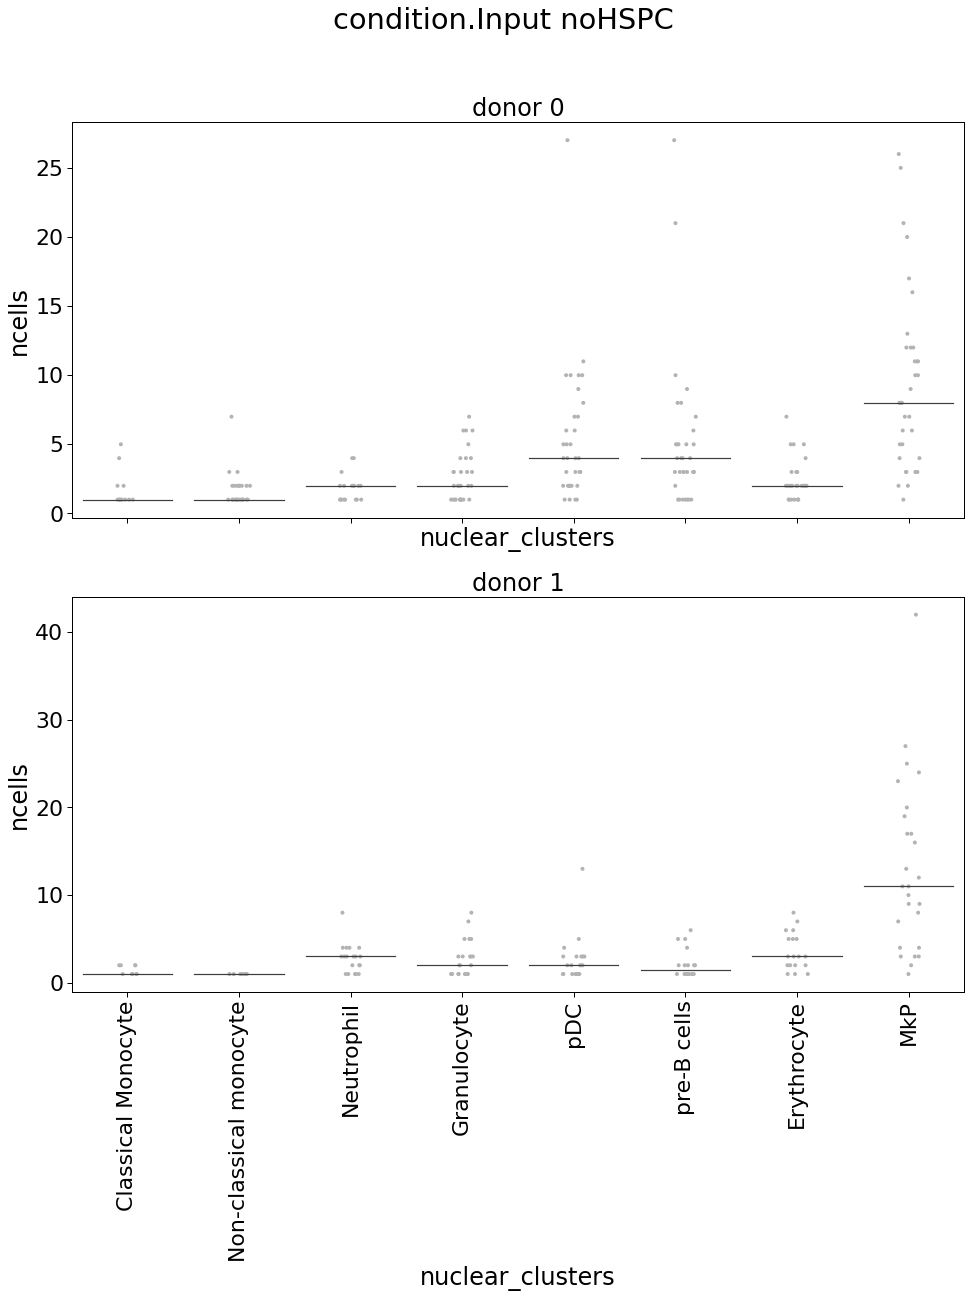

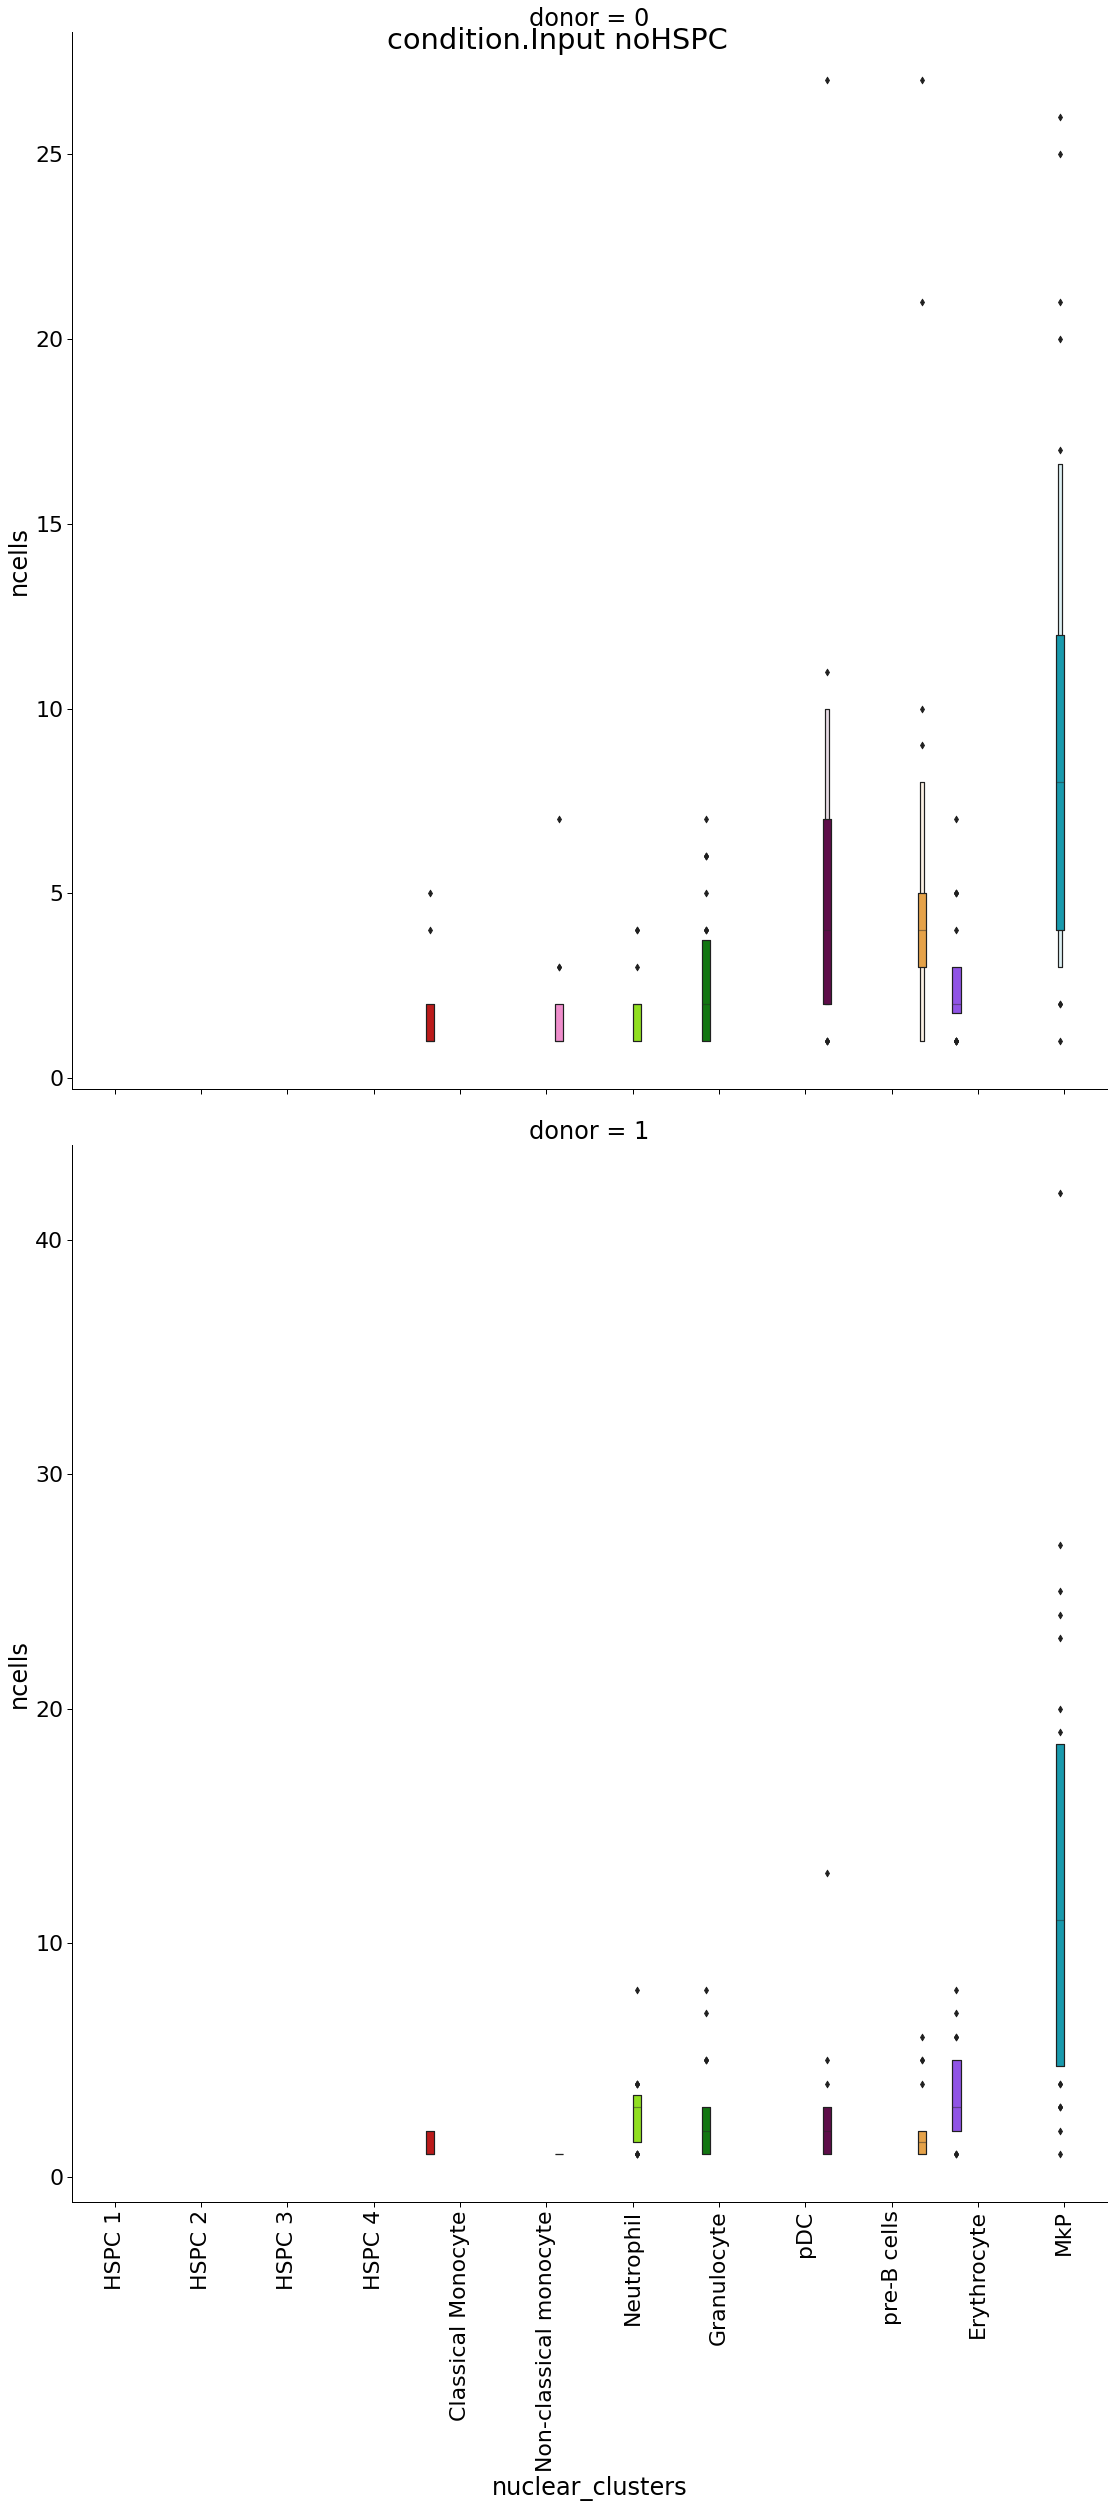

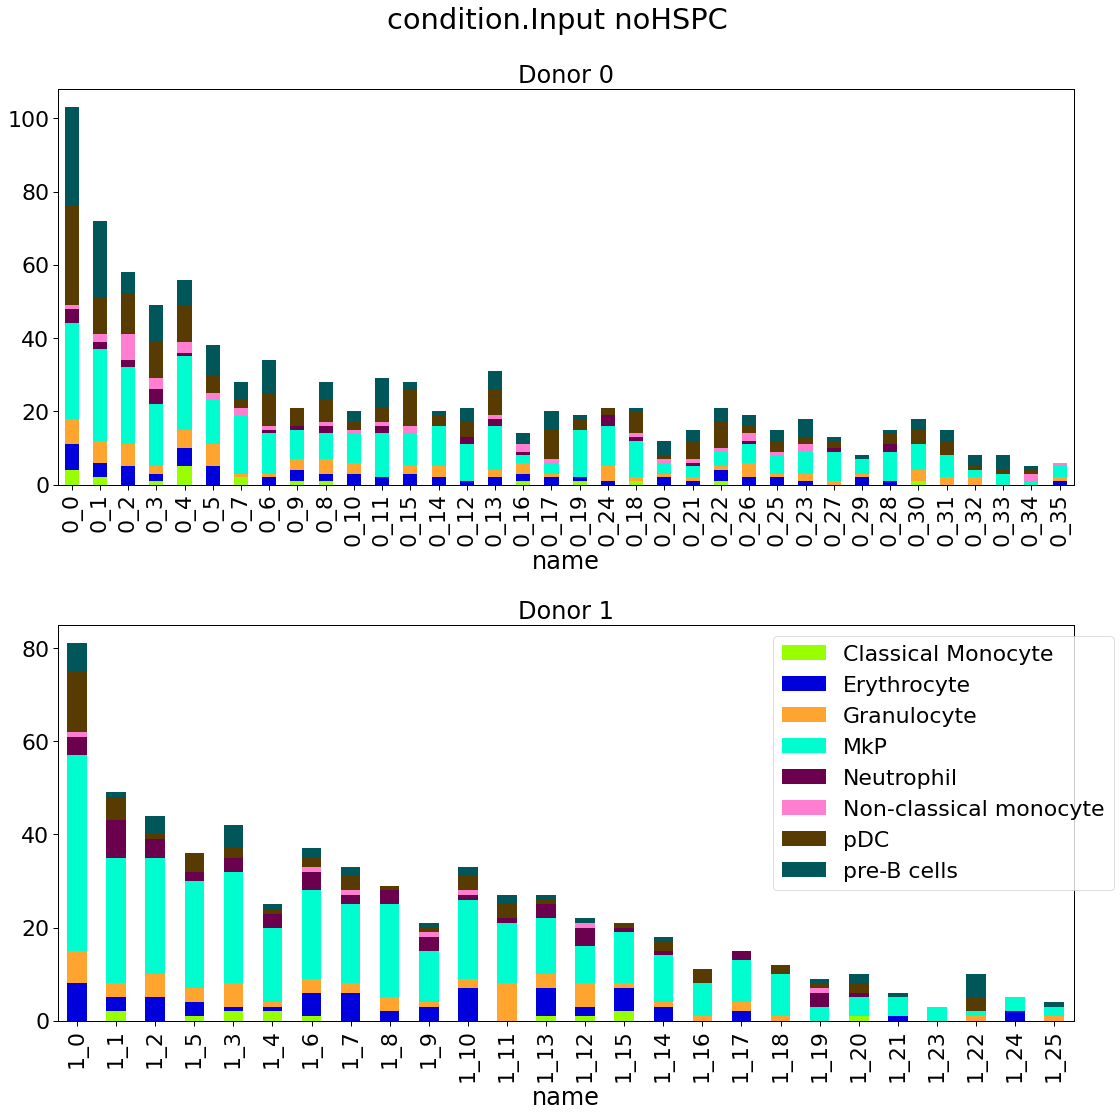

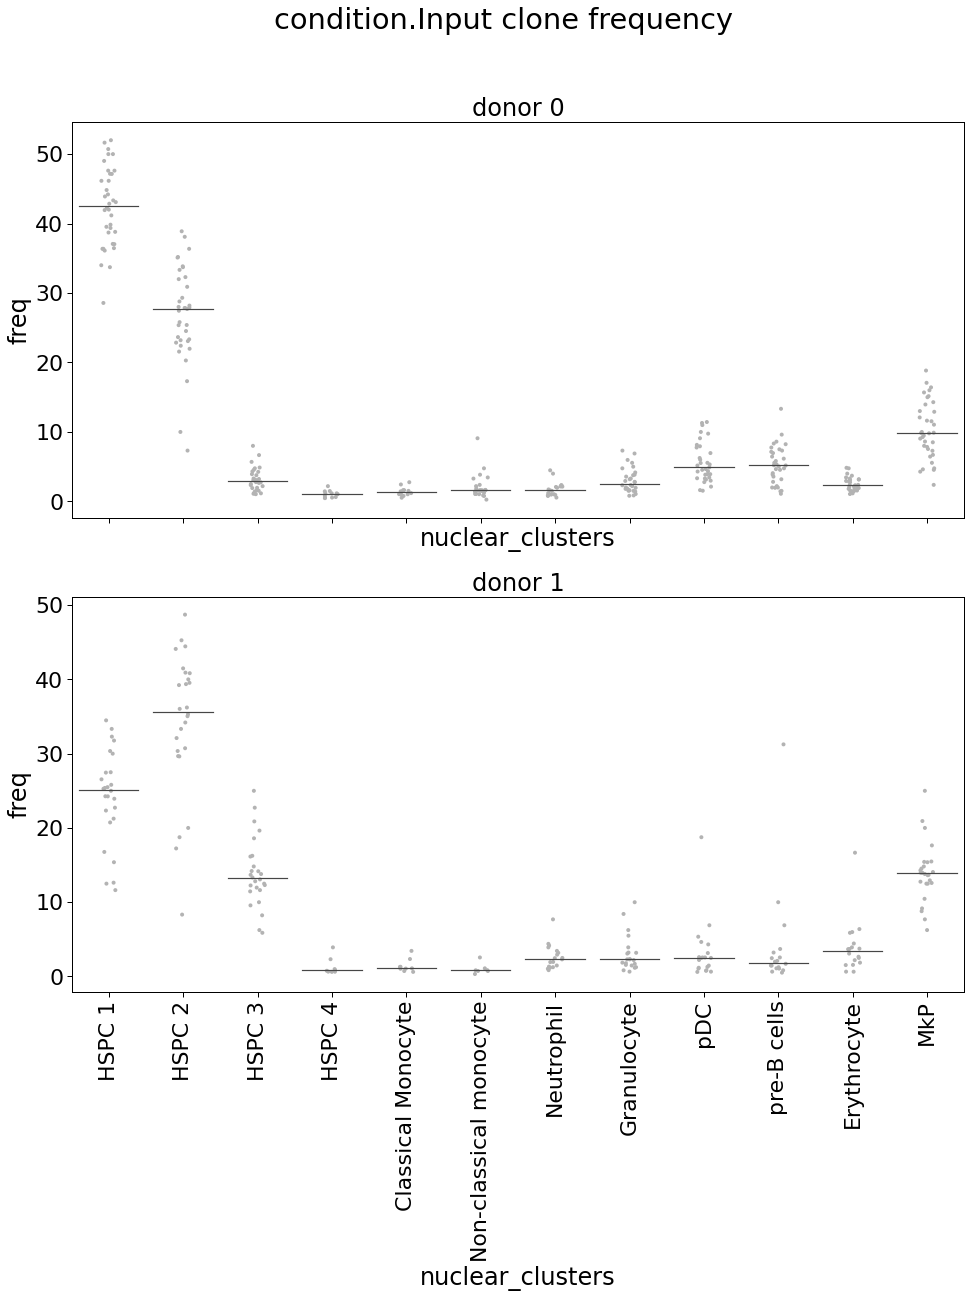

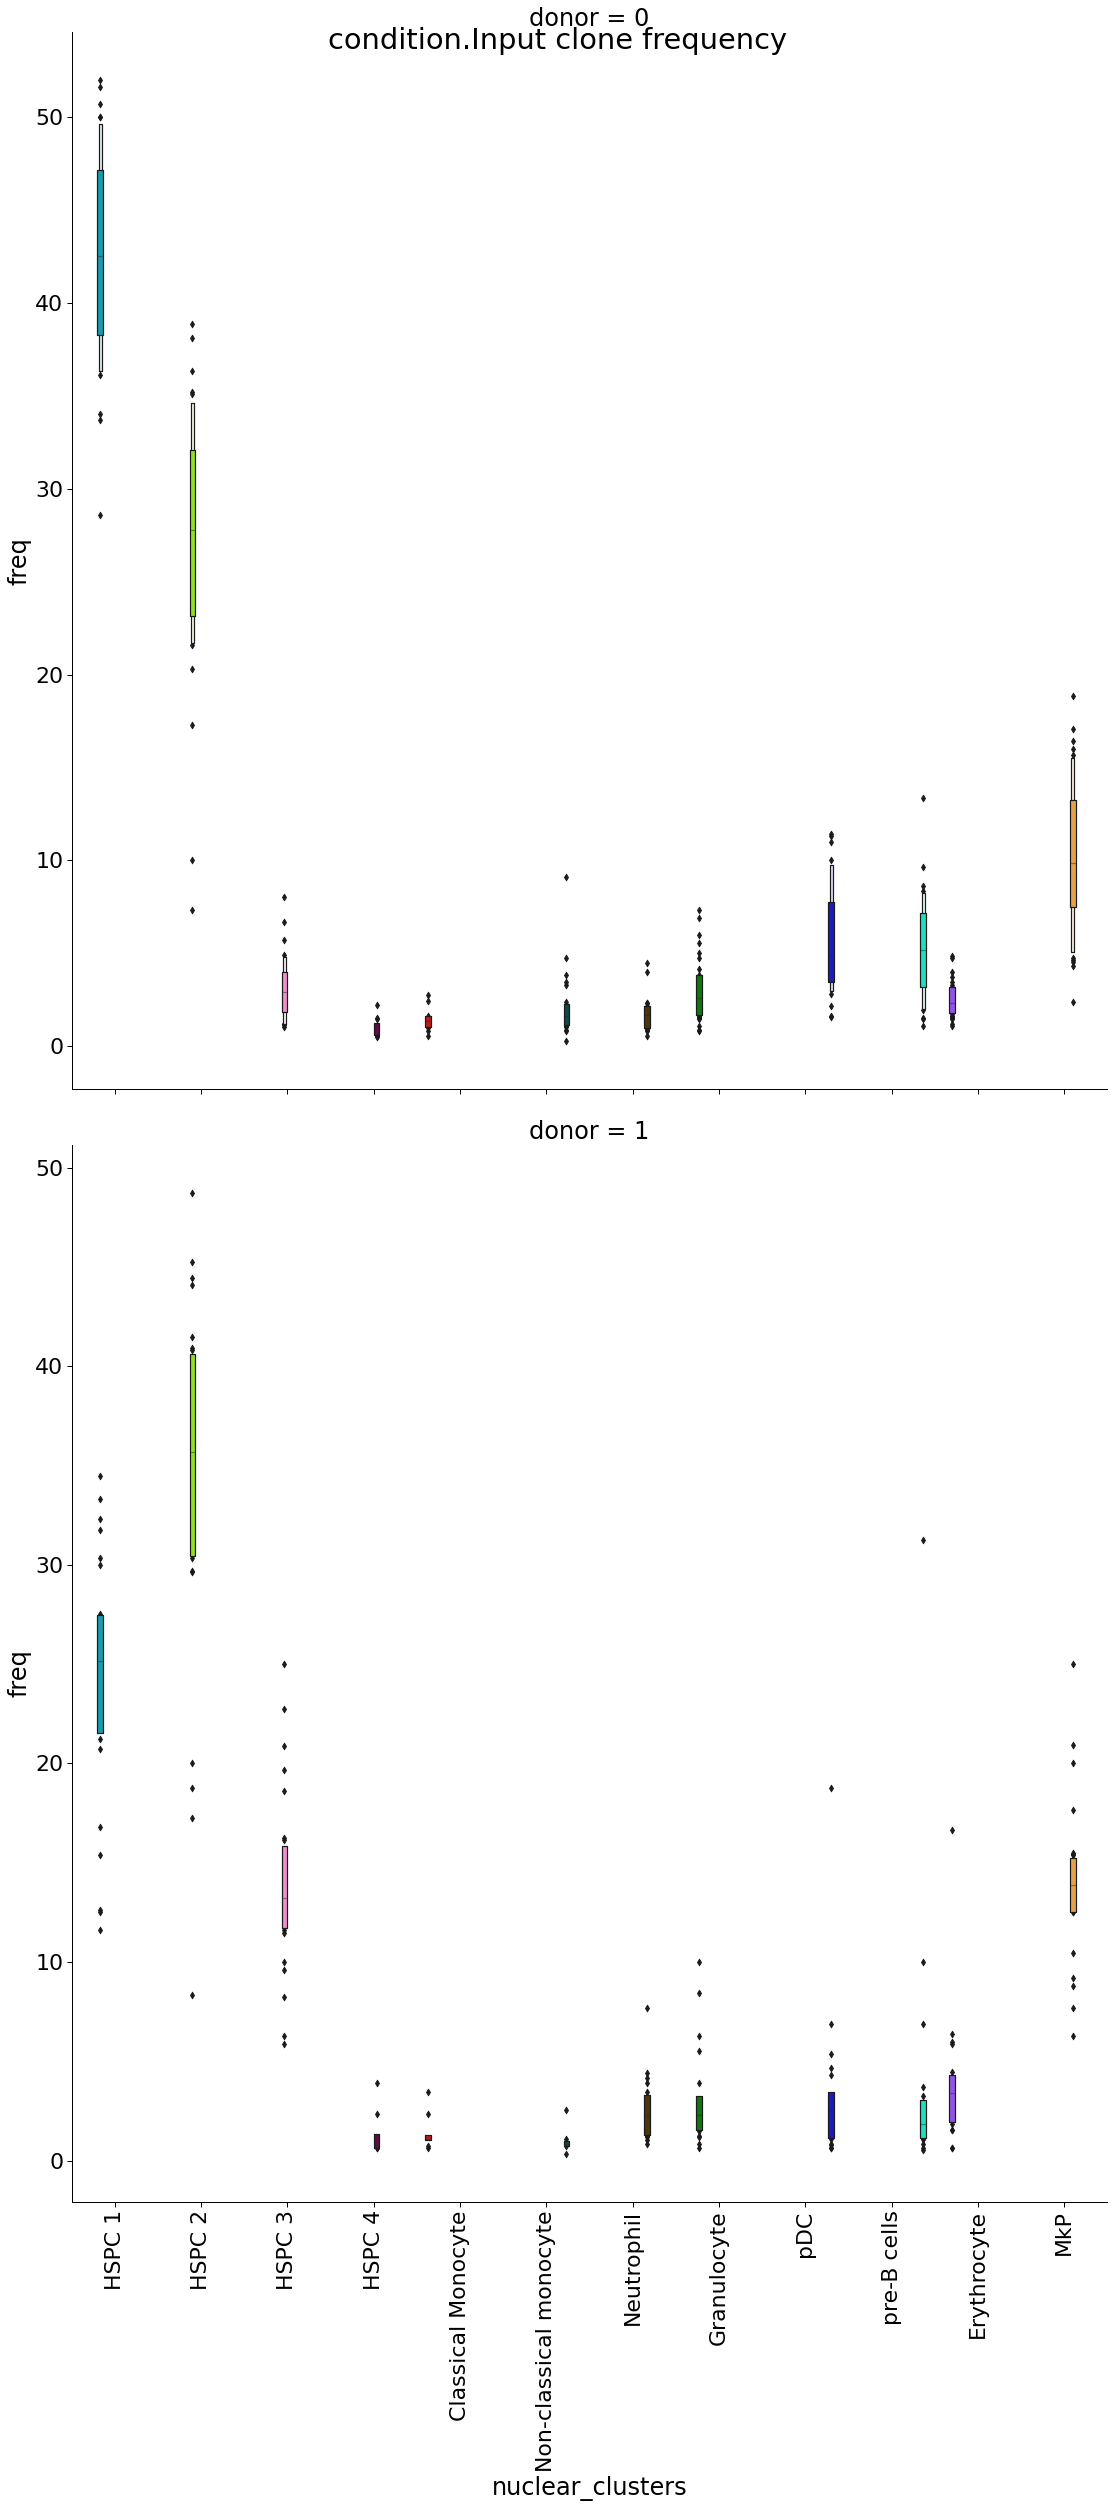

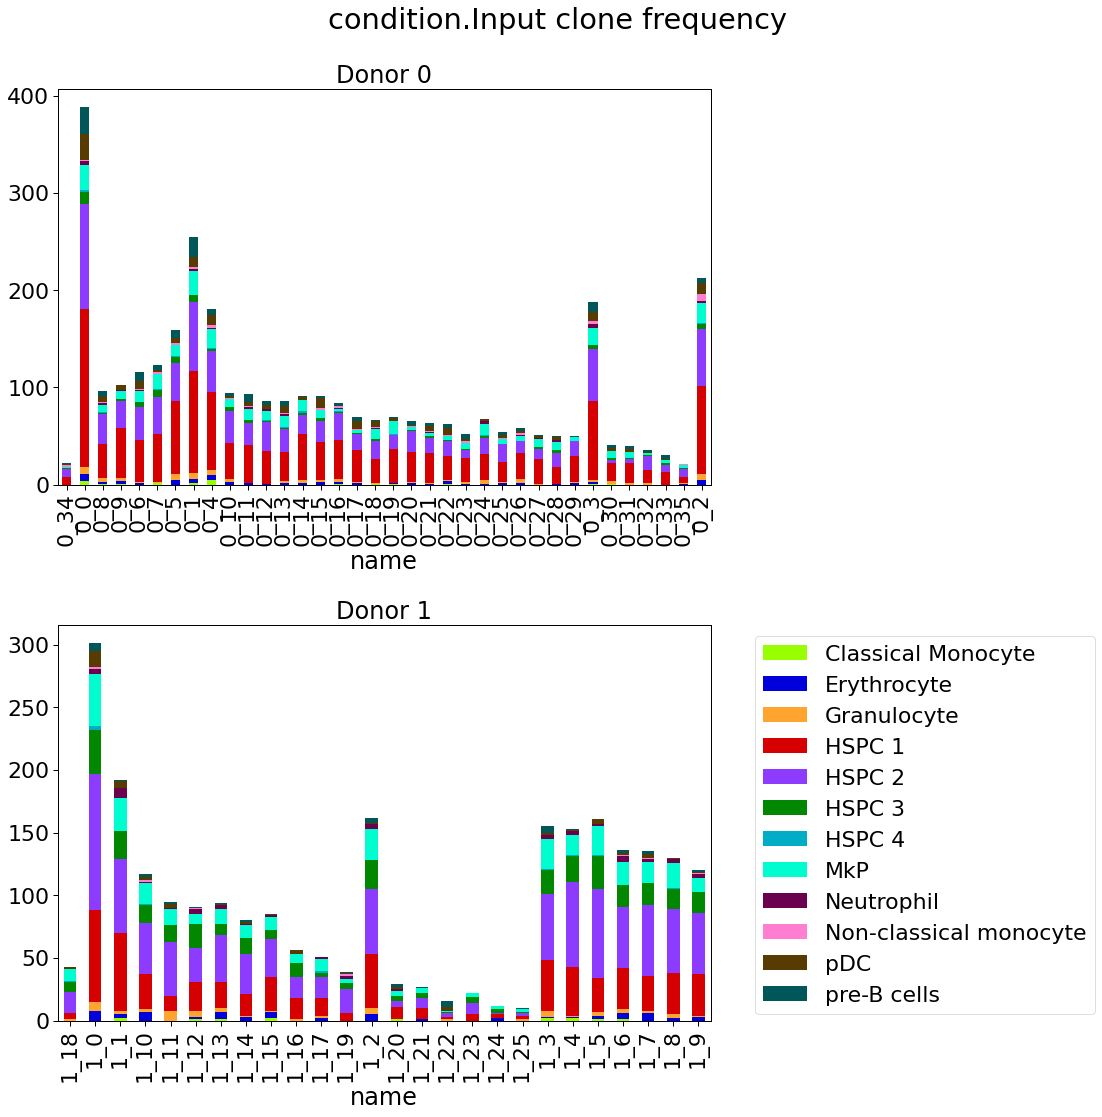

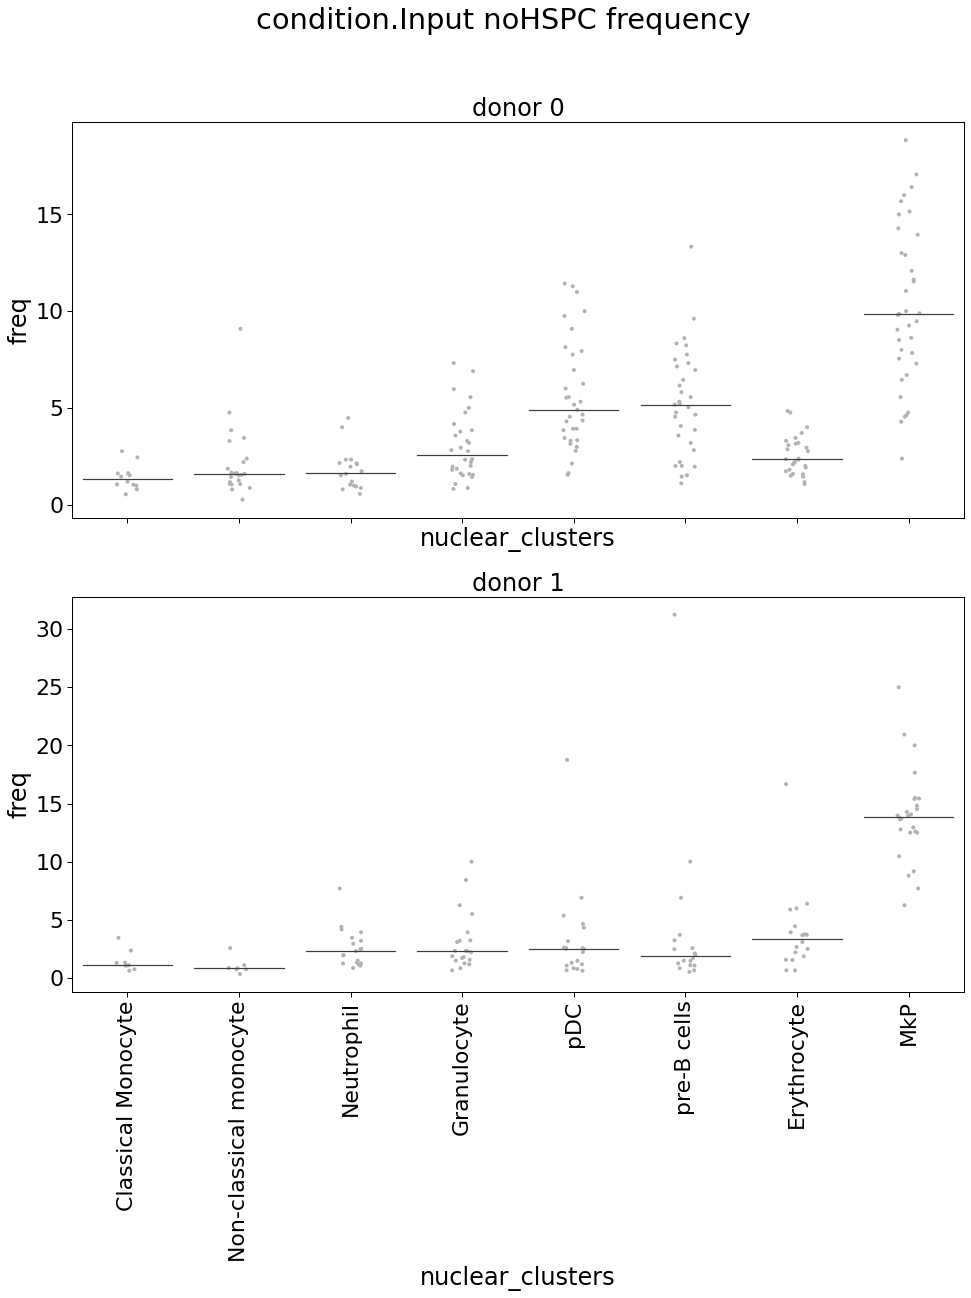

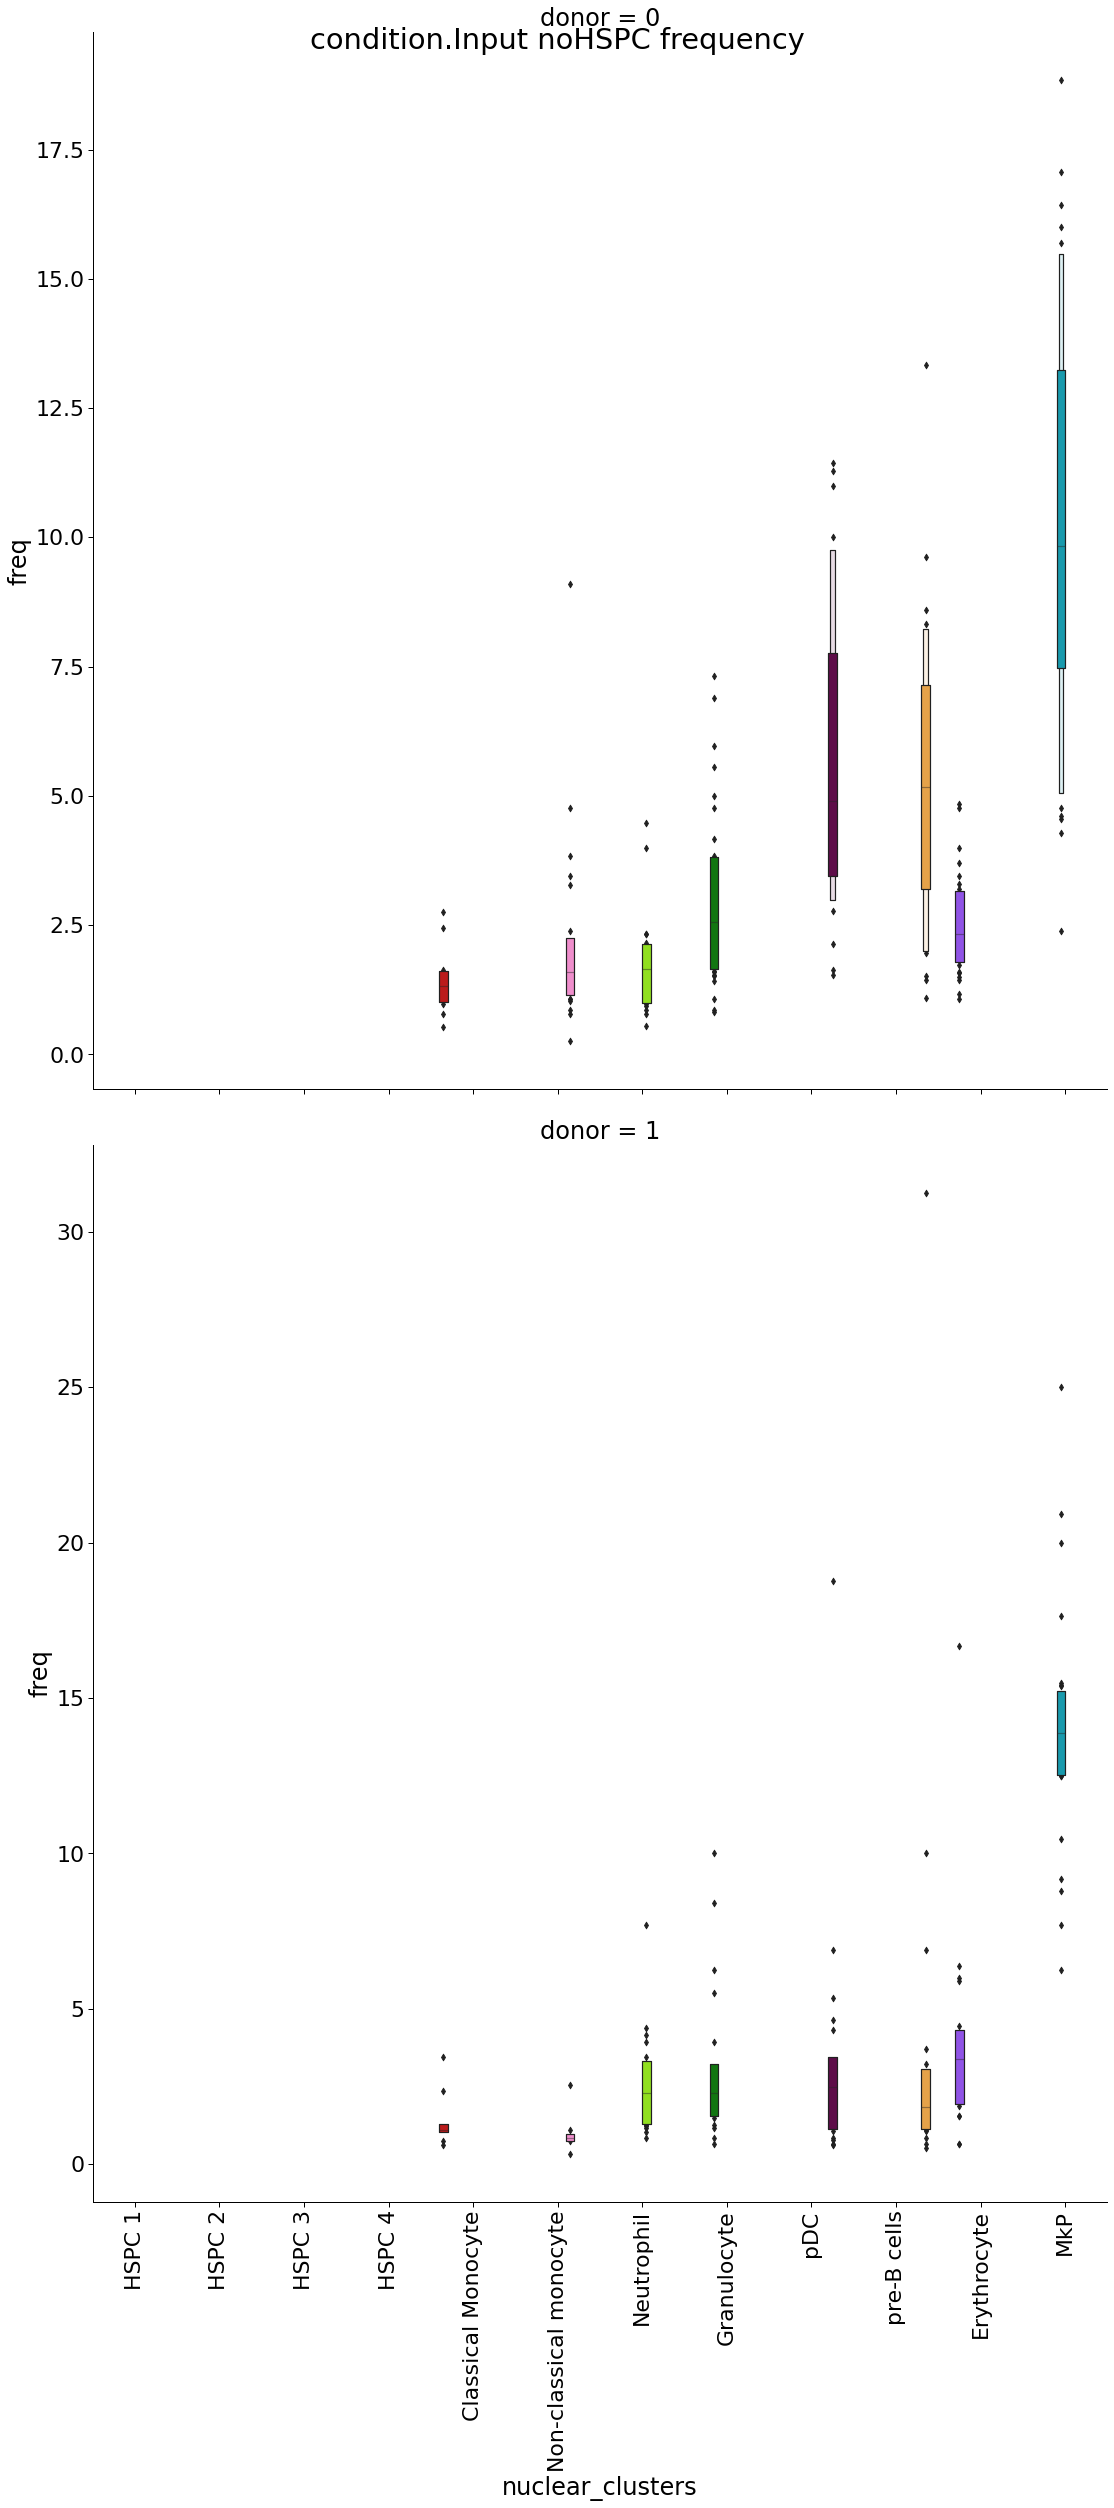

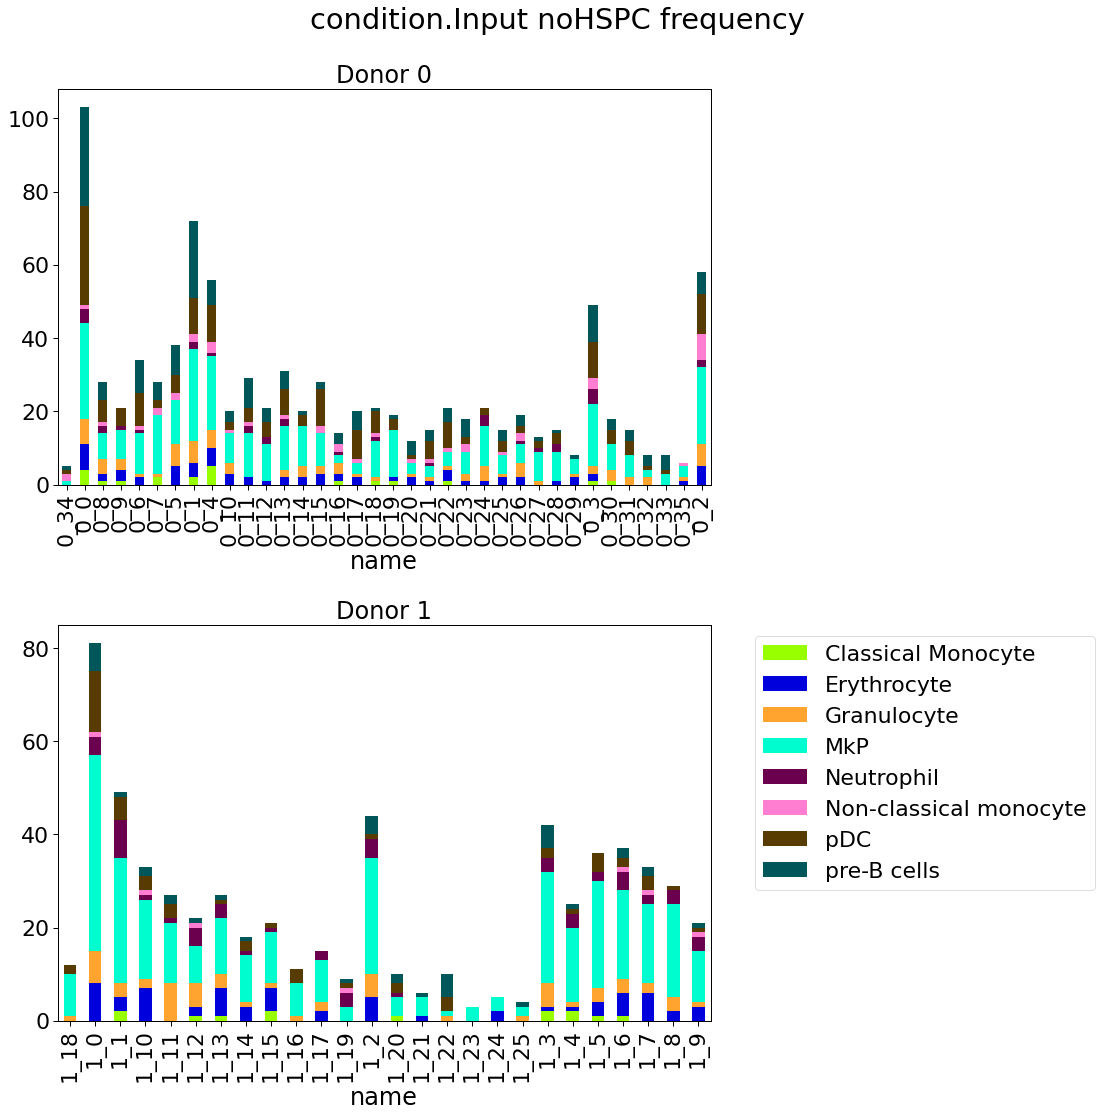

In [7]:
main(se_cells_meta, min_cell=min_cell)

## Plot donor-cluster barplots

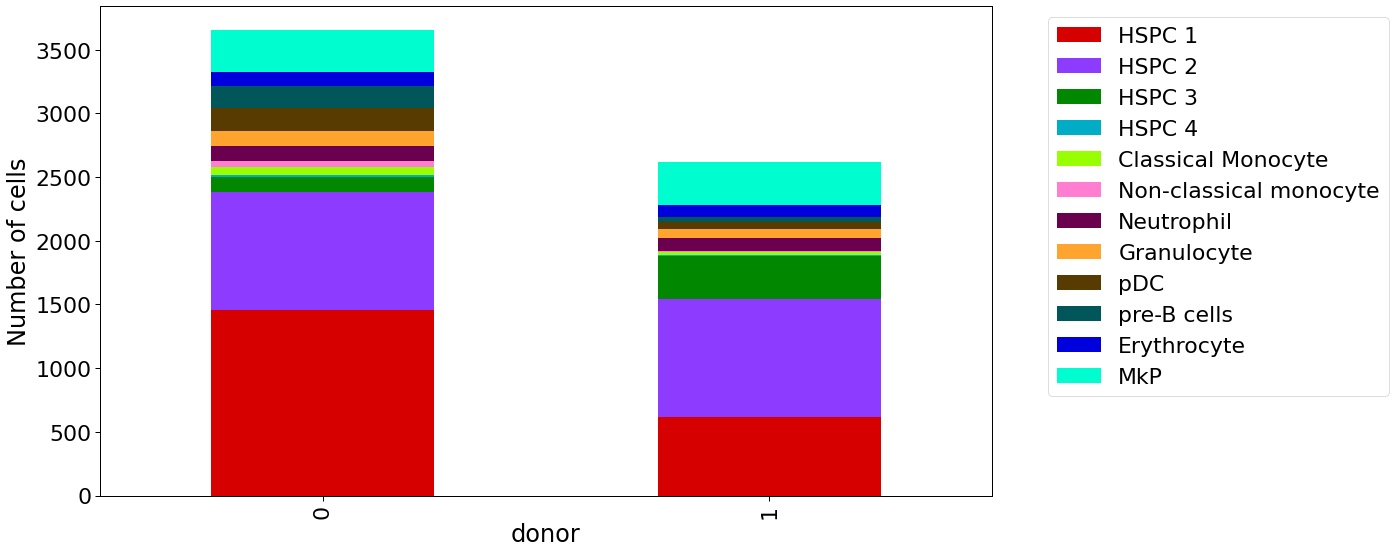

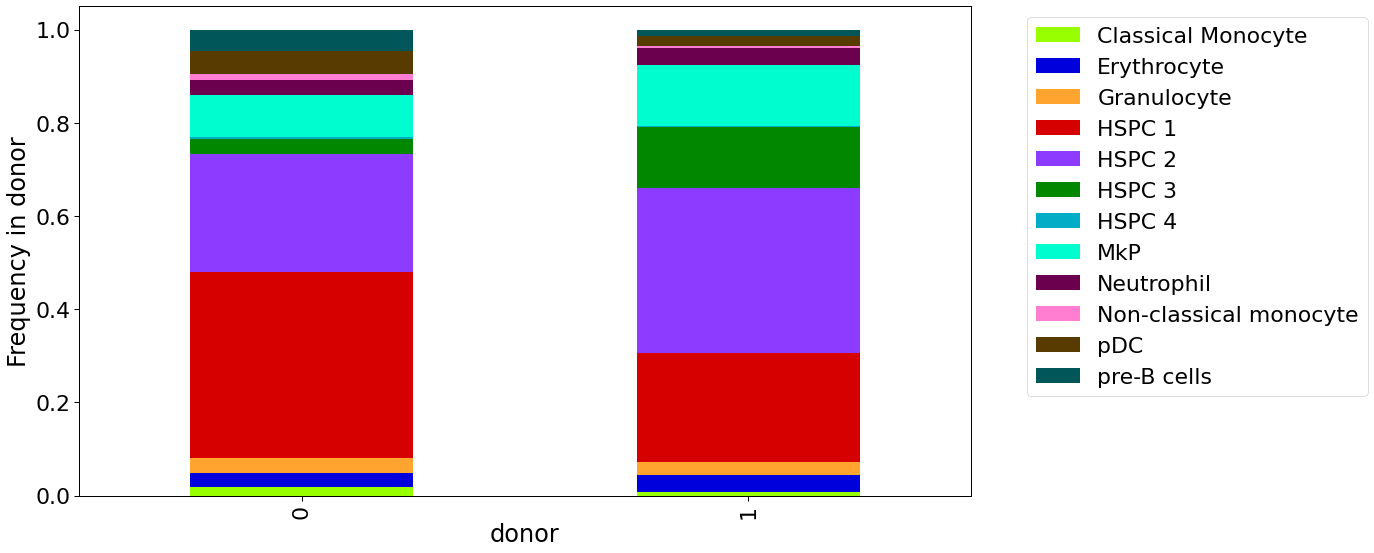

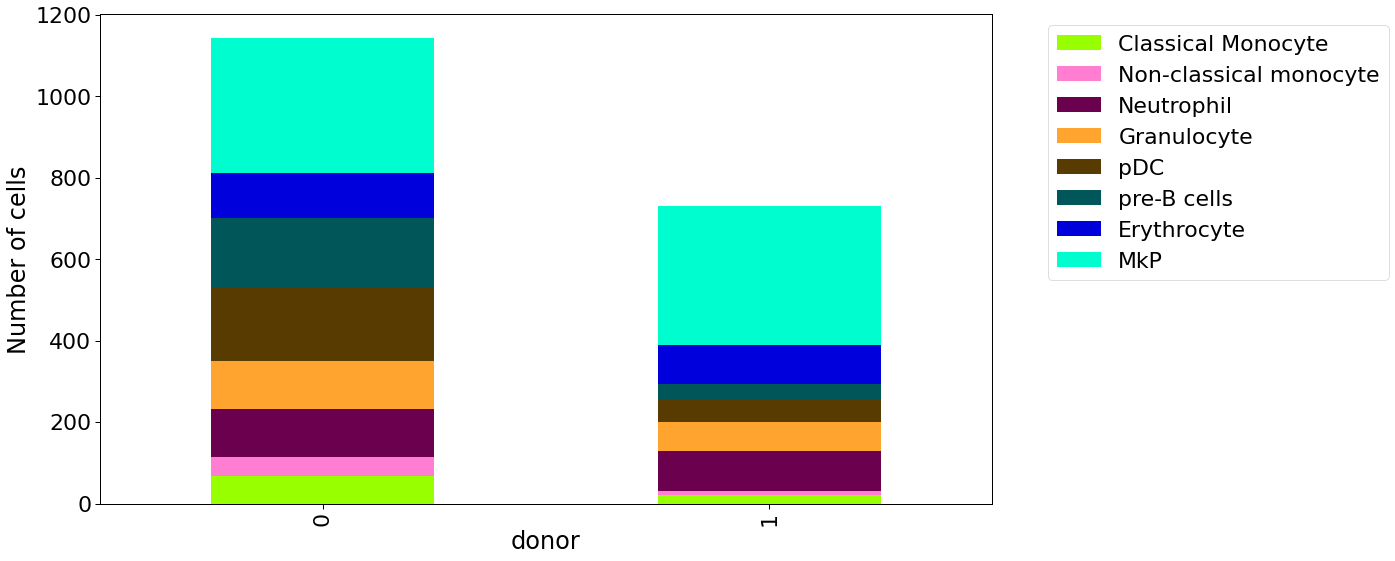

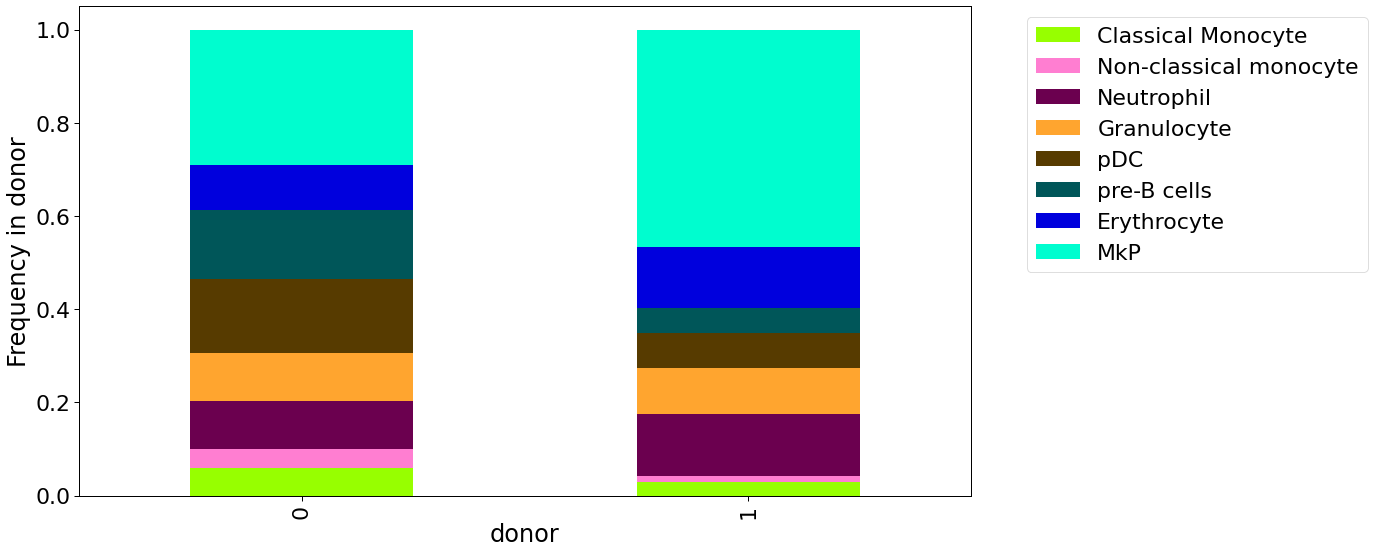

In [12]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
tmp

f, ax = plt.subplots(figsize=(16,9))
donor_counts = tmp.loc[:, [x for x in hue_order if x in tmp.columns]]
donor_proportion = tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose()
donor_proportion.to_csv(join(outdir, "donors.clust_proportion.csv"))
donor_counts.to_csv(join(outdir, "donors.clust_counts.csv"))

donor_counts.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set_ylabel("Number of cells")
plt.savefig(join(outdir, "all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_clones_barplot_clones.pdf"))

### Normalize to each donor
f, ax = plt.subplots(figsize=(16,9))
donor_proportion.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set_ylabel("Frequency in donor")
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.pdf"))


## Without HSPC
f, ax = plt.subplots(figsize=(16,9))
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
tmp = tmp.loc[:, [x for x in hue_order if x in tmp.columns and hspc_prefix not in x]]
donor_counts = tmp
donor_proportion = tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose()
donor_counts.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set_ylabel("Number of cells")

plt.savefig(join(outdir, "noHSPC.all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "noHSPC.all_clones_barplot_clones.pdf"))

### Normalize to each donor
f, ax = plt.subplots(figsize=(16,9))
donor_proportion.plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set_ylabel("Frequency in donor")

plt.savefig(join(outdir, "noHSPC.norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "noHSPC.norm_all_clones_barplot_clones.pdf"))




## Plot donor-cluster barplots for each condition

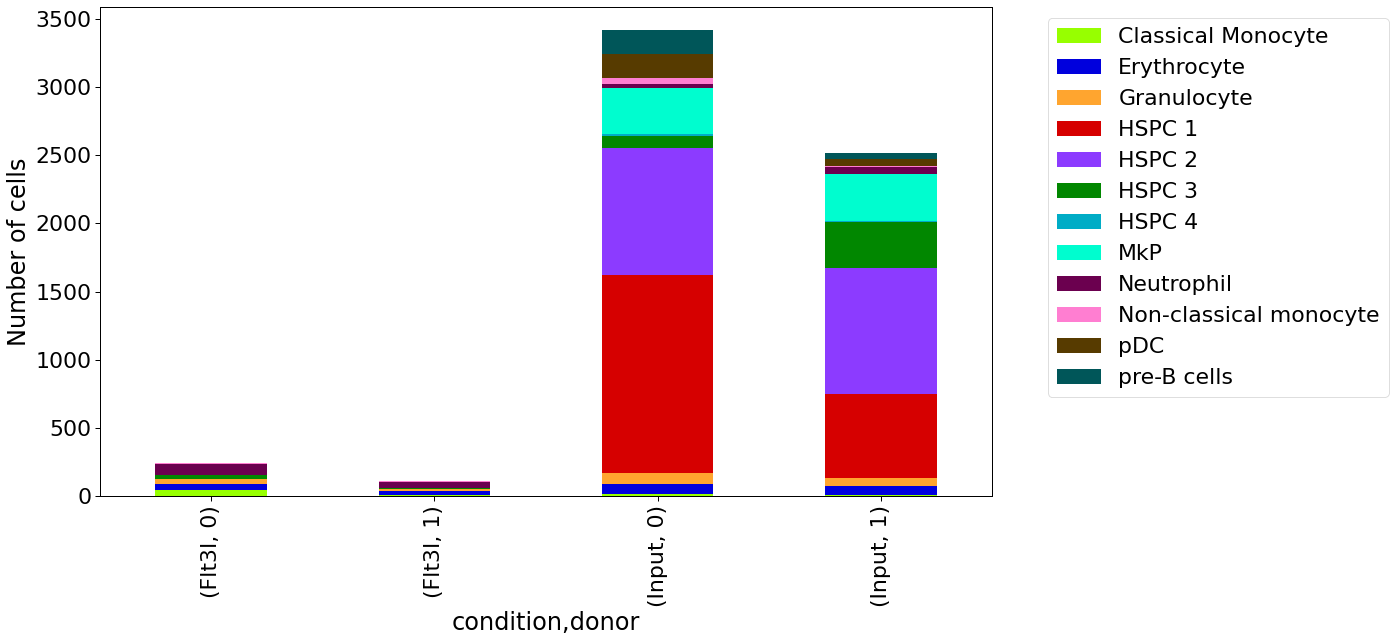

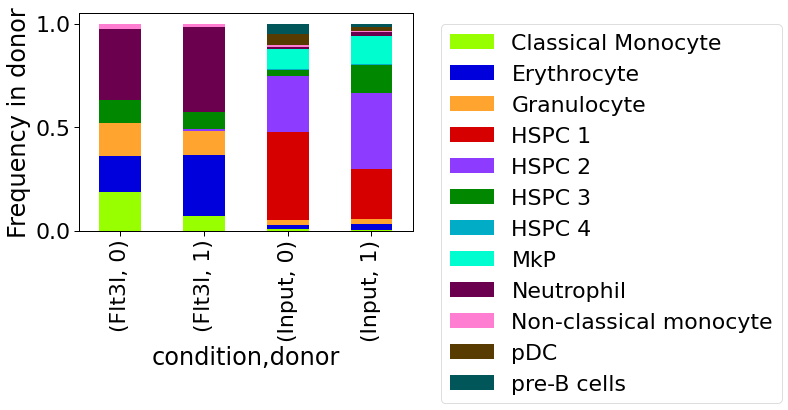

In [18]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor"]).size()
group_counts
f, ax = plt.subplots(figsize=(16,9))
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor"], values=0).plot.bar(stacked=True,
                                                                                                              color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set_ylabel("Number of cells")
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.pdf"))

### Normalize to each condition and donor
f, ax = plt.subplots(figsize=(16,9))
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition","donor"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
ax.set_ylabel("Frequency in donor")
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.pdf"))


noshpc_cells = se_cells_meta.loc[~(se_cells_meta["nuclear_clusters"].str.contains(hspc_prefix))]
group_counts = noshpc_cells.groupby(["nuclear_clusters", "condition", "donor"]).size()
group_counts
f, ax = plt.subplots(figsize=(16,9))
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor"], values=0).plot.bar(stacked=True,
                                                                                                              color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
ax.set_ylabel("Number of cells")
plt.savefig(join(outdir, "noHSPC_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "noHSPC_all_conditions_clones_barplot_clones.pdf"))

### Normalize to each condition and donor
f, ax = plt.subplots(figsize=(16,9))
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition","donor"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
ax.set_ylabel("Frequency in donor")
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "noHSPC_norm_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "noHSPC_norm_all_conditions_clones_barplot_clones.pdf"))


### Save raw counts to csv for each donor

In [6]:
# clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
# clone_counts["log2"] = np.log2(1+clone_counts["ncells"]).fillna(0)
# clone_counts
# for don, val in clone_counts.groupby("donor"):
#     donor_clone_counts = val.pivot(index="name", columns="nuclear_clusters", values="ncells").fillna(0)
#     donor_clone_counts.to_csv(join(outdir, f"donor{don}.clone_clust.csv"))

NameError: name 'clone_counts' is not defined

In [ ]:

# def main2(se_cells_meta):
#     cl_counts_l, cl_counts_w, cl_counts_w_log2 = init_cl_counts_l(se_cells_meta)
#     # remove clones < min_cell
#     cl_counts_w = cl_counts_w.loc[cl_counts_w["ncells"]>=min_cell]
#     clones_to_keep = cl_counts_w.index
#     cl_counts_l = cl_counts_l.loc[cl_counts_l["name"].isin(clones_to_keep)]
    
#     # 1. create plots on initial data: 
#     # 1a. create strpplot, boxen, barplot
#     strpplots(cl_counts_w,"log2_clone_cluster_scatter_diffY", y_col="log2")
#     boxen(cl_counts_w, name="log2_clone_cluster_boxen_diffY", y_col="log2")
#     run_plots(cl_counts_w, y_col="log2", name="log2_clone_cluster_diffY")
    
#     donor_clone_barplots(cl_counts_w,
#           name="clone_cluster_bar")
#     donor_clone_barplots(cl_counts_w_log2,
#           name="log2_clone_cluster_bar")

#     # 1b. create plots with noHSPC
#     noHSPC_l = cl_counts_l.loc[~(cl_counts_w["nuclear_clusters"].str.contains(hspc_prefix))]
#     noHSPC_w = pd.merge(cl_counts_w[["donor", "ncells"]],
#                         cl_counts_w.loc[:, ~(curr_donor_clones.columns.str.contains(hspc_prefix))],
#                        left_index=True, right_index=True)
    
#     strpplots(noHSPC_l, "NoHSPC_clone_cluster_scatter_diffY", y_col="ncells")
#     boxen(noHSPC_l, name="NoHSPC_clone_cluster_boxen_diffY", y_col="ncells")
#     donor_clone_barplots(noHSPC_w,
#           name="NoHSPC_clone_cluster_bar")    
    
#     # 2. normalize values within each clone
#     # 2a. all clusters
#     cl_norm_l, cl_norm_w = to_norm(cl_counts_l)
#     run_plots(cl_norm_l, y_col="ncells", name="norm_clone_cluster_scatter_diffY")
#     donor_clone_barplots(cl_counts_w,
#           name="norm_clone_cluster_bar")    
    
#     # 2b. noHSPC for norm
#     noHSPC_norm_l = cl_counts_l.loc[~(cl_counts_w["nuclear_clusters"].str.contains(hspc_prefix))]
#     noHSPC_norm_w = pd.merge(cl_counts_w[["donor", "ncells"]],
#                         cl_counts_w.loc[:, ~(curr_donor_clones.columns.str.contains(hspc_prefix))],
#                        left_index=True, right_index=True)
    
#     run_plots(noHSPC_norm_l, y_col="ncells", name="noHSPC_norm_clone_cluster_scatter_diffY")
#     donor_clone_barplots(noHSPC_norm_w,
#           name="noHSPC_norm_clone_cluster_bar")  
    
#     # 3. Check if more than one condition, if yes, split and run 
#     if len(se_cells_meta["condition"].unique())>1:
#         for cond, val in se_cells_meta.groupby("condition"):
#             plot_all_and_norm(val, prefix=f"condition.{cond}")
#     return 

In [ ]:
# clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
# clone_counts = clone_counts[~(clone_counts["name"]=="None")]
# clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
# clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, args=(clone_counts,),axis=1)),axis=1).fillna(0)
# clone_counts_df

# clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]

